# __Initial data reading__

## Import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Read the files

In [2]:
sales_data = pd.read_csv('train.csv')
stores_data = pd.read_csv('stores.csv')
features_data = pd.read_csv('features.csv')

## Check first few rows

In [3]:
sales_data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [5]:
stores_data.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
features_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

# __Exploratory Data analysis for Sales data__

## check for missing values

In [7]:
sales_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## Check for Datatypes

In [8]:
sales_data.dtypes
# date column is object and store column is int, we need to convert to date and categorical respectively

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

## Check for the shape and descriptive statistics

In [9]:
sales_data.shape

(421570, 5)

In [10]:
sales_data.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [11]:
sales_data.describe()
# there are negative values in weekly sales

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [12]:
# we need to filter negative data to check whether we can drop them completly

In [13]:
sales_data_check = sales_data.loc[sales_data['Weekly_Sales']<=0]
sales_data_check.shape

(1358, 5)

In [14]:
sales_data_check['Weekly_Sales'].describe()

count    1358.000000
mean      -64.920147
std       225.877919
min     -4988.940000
25%       -38.000000
50%       -12.000000
75%        -3.855000
max         0.000000
Name: Weekly_Sales, dtype: float64

In [15]:
print(f"{(sales_data_check.shape[0]/sales_data.shape[0])*100} %")

0.3221291837654482 %


In [16]:
# As we can see only 0.3% of the data is negative we can drop them.

In [17]:
sales_data_2 = sales_data.loc[sales_data['Weekly_Sales']>0]

In [18]:
sales_data_2.shape

(420212, 5)

## Converting the datatypes

In [19]:
sales_data_2['Store'] = sales_data_2['Store'].astype(str)
sales_data_2['Dept'] = sales_data_2['Dept'].astype(str)
sales_data_2['IsHoliday'] = sales_data_2['IsHoliday']*1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [20]:
sales_data_2.dtypes

Store            object
Dept             object
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object

# __Exploratory Data analysis for stores and features data__

## Function for initial data analysis

In [21]:
def get_basic_statistics(df):
    print('Shape of dataframe is ' + str(df.shape))
    print("\n")
    print('Below are the datatypes of columns in dataframe')
    print(df.dtypes.sort_values())
    print("Below are the missing value of each column")
    print(df.isna().sum().sort_values())
    print("Below are the number of unique values take by each column")
    print(df.nunique().sort_values())
    print('Basic statistics for numeric variables')
    print(df.describe())
    print("First five records")
    print(df.head())
    

In [22]:
get_basic_statistics(features_data)

Shape of dataframe is (8190, 12)


Below are the datatypes of columns in dataframe
IsHoliday          bool
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Date             object
dtype: object
Below are the missing value of each column
Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64
Below are the number of unique values take by each column
IsHoliday          2
Store             45
Date             182
Unemployment     404
Fuel_Price      1011
CPI             2505
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown1       4023
MarkDown5       4045
Temperature     41

In [23]:
get_basic_statistics(stores_data)

Shape of dataframe is (45, 3)


Below are the datatypes of columns in dataframe
Store     int64
Size      int64
Type     object
dtype: object
Below are the missing value of each column
Store    0
Type     0
Size     0
dtype: int64
Below are the number of unique values take by each column
Type      3
Size     40
Store    45
dtype: int64
Basic statistics for numeric variables
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
First five records
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [24]:
stores_data['Store'] = stores_data['Store'].astype(str)

# __Data preprocessing__

In [25]:
features_data_2 = features_data.drop(['IsHoliday'],axis=1) # drop unwanted column

In [26]:
features_data_2['Unemployment'].fillna(features_data_2['Unemployment'].mean(),inplace=True) # fill missing values
features_data_2['CPI'].fillna(features_data_2['CPI'].mean(),inplace=True) # fill missing value using mean

In [27]:
features_data_2.fillna(0,inplace=True) # fill missing value using 0

In [28]:
features_data_2['Store'] = features_data_2['Store'].astype(str) # change the datatype


In [29]:
stores_data.groupby('Type').agg({'Size':'mean'}) 

Size
Type               
A     177247.727273
B     101190.705882
C      40541.666667

## Merging Data

In [30]:
# Stores unique keys = Store
# Features data unique keys = Store + Date
# Sales data unique keys = Store + Dept + Date

In [31]:
sales_data_2

Store Dept        Date  Weekly_Sales  IsHoliday
0          1    1  2010-02-05      24924.50          0
1          1    1  2010-02-12      46039.49          1
2          1    1  2010-02-19      41595.55          0
3          1    1  2010-02-26      19403.54          0
4          1    1  2010-03-05      21827.90          0
...      ...  ...         ...           ...        ...
421565    45   98  2012-09-28        508.37          0
421566    45   98  2012-10-05        628.10          0
421567    45   98  2012-10-12       1061.02          0
421568    45   98  2012-10-19        760.01          0
421569    45   98  2012-10-26       1076.80          0

[420212 rows x 5 columns]

In [32]:
features_data_2.groupby(['Store','Date']).size().shape[0] - features_data_2.shape[0] # helps understand if the merge is correct

0

In [33]:
sales_data.groupby(['Store','Dept','Date']).size().shape[0] - sales_data.shape[0] # helps understand if the merge is correct

0

In [34]:
sales_features_data = pd.merge(sales_data_2,features_data_2,on = ['Store','Date'],how = 'inner')
sales_features_data.shape

(420212, 14)

In [268]:
sales_features_data.head()

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0     1    1  2010-02-05      24924.50          0        42.31       2.572   
1     1    2  2010-02-05      50605.27          0        42.31       2.572   
2     1    3  2010-02-05      13740.12          0        42.31       2.572   
3     1    4  2010-02-05      39954.04          0        42.31       2.572   
4     1    5  2010-02-05      32229.38          0        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

In [37]:
sales_data_2.shape

(420212, 5)

In [38]:
combined_data = pd.merge(sales_features_data,stores_data,on = 'Store',how = 'inner')
combined_data.shape

(420212, 16)

In [39]:
combined_data['Date2'] = pd.to_datetime(combined_data['Date'],format = '%Y-%m-%d') # convert to datetime format

In [40]:
combined_data['Date2'].describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  420212
unique                    143
top       2011-12-23 00:00:00
freq                     3018
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date2, dtype: object

In [41]:
unique_dates = pd.DataFrame(combined_data['Date2'].unique(),columns=['date'])


## Sort the dataframe

In [42]:
unique_dates.sort_values('date',inplace = True)

In [43]:
unique_dates

date
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
..         ...
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26

[143 rows x 1 columns]

## split the data into 70:30

In [44]:
splitter = round(unique_dates.shape[0]*0.7) # splits into 70:30
splitter

100

In [45]:
split_date = unique_dates.iloc[99]['date'] # since there are 143 unique values 99 gives us around 70 % split
split_date

Timestamp('2011-12-30 00:00:00')

In [46]:
combined_data_train = combined_data.loc[combined_data['Date2']<= split_date] # Training data
combined_data_test = combined_data.loc[combined_data['Date2'] > split_date]  # Test data

In [47]:
combined_data_train.shape[0]/combined_data.shape[0] # gives the approximation of the split

0.6977525629920136

In [48]:
combined_data_train.sample()

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
45946     5   91  2011-12-23       1401.67          0        50.33   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
45946       3.112     225.21       0.15     427.57        0.0    1443.04   

              CPI  Unemployment Type   Size      Date2  
45946  219.938725           6.3    B  34875 2011-12-23

In [49]:
print(combined_data_test.columns.to_list())
print(combined_data_train.columns.to_list())

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Date2']
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Date2']


## Univariate Analysis

### _Categorical variables_

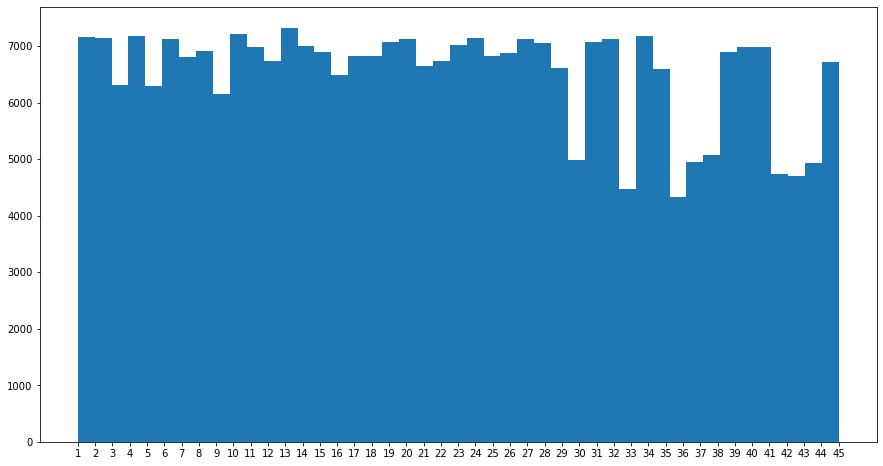

In [50]:
# plot a histogram for store
plt.figure(figsize=(15,8))
plt.hist(list(combined_data_train['Store']),bins=combined_data['Store'].nunique())
plt.show()
# min value is around 4500 and max value is between 7000 and 8000, 
# also not much variation is observed between stores

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


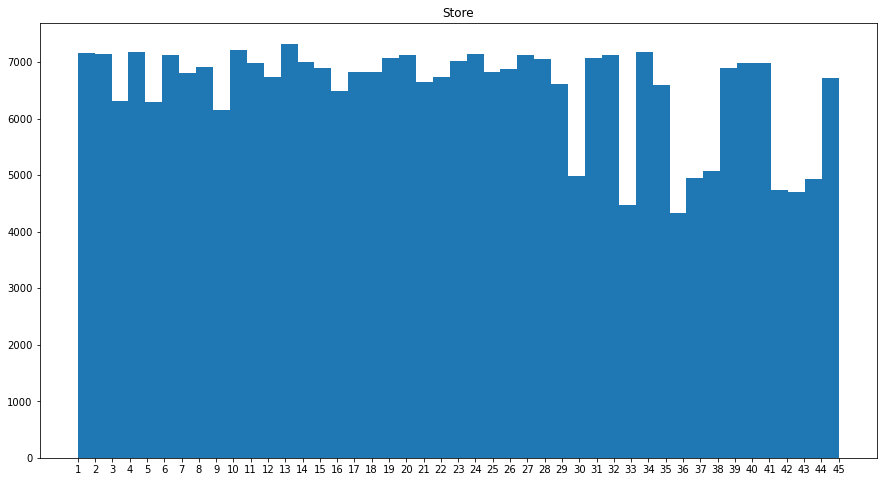

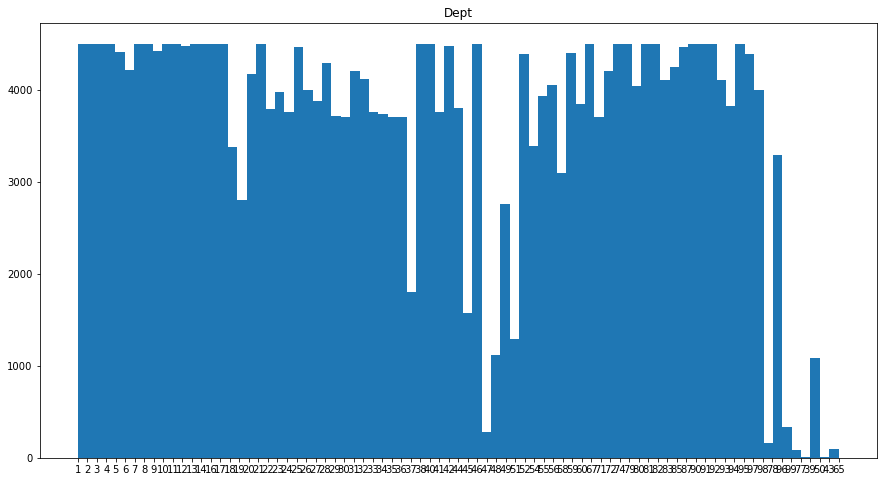

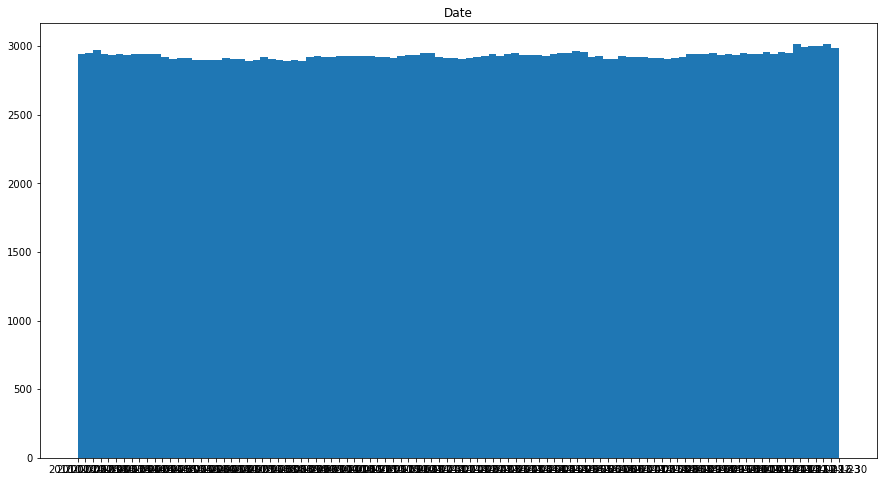

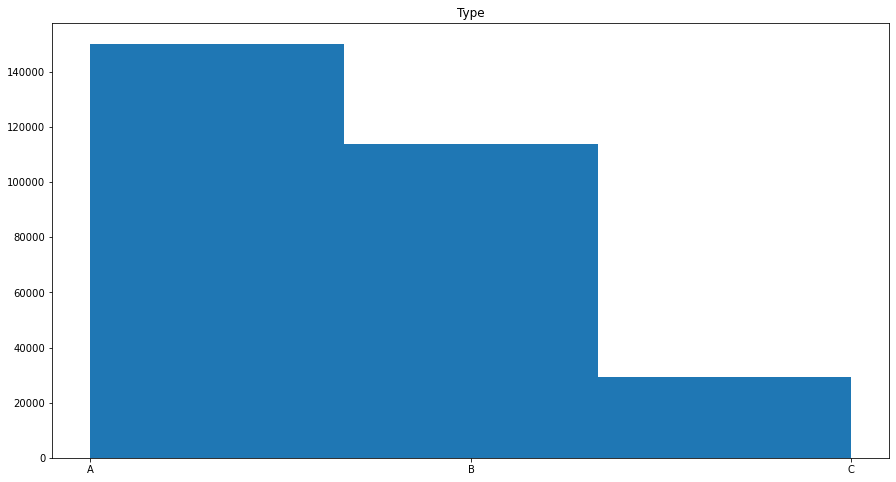

In [51]:
cat_columns = combined_data_train.select_dtypes(np.object).columns.tolist()
# univariate analysis of categorical variables
for var in cat_columns:
    plt.figure(figsize=(15,8))
    plt.hist(list(combined_data_train[var]),bins = combined_data_train[var].nunique())
    plt.title(var)
    plt.show()
# we have sufficient data

### _Numerical variables_

In [52]:
num_col = combined_data_train.select_dtypes(np.number).columns.to_list() # gives only numerical columns
mark_columns = [x for x in num_col if 'Mark' in x] # Columns containing 
print(f"The markdown columns are: {mark_columns}")
print("\n------------------")
nonmark_columns = list(set(num_col).difference(set(mark_columns)))
print(f" The non markdown columns are: {nonmark_columns}")


The markdown columns are: ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

------------------
 The non markdown columns are: ['Size', 'Fuel_Price', 'IsHoliday', 'Unemployment', 'Weekly_Sales', 'Temperature', 'CPI']


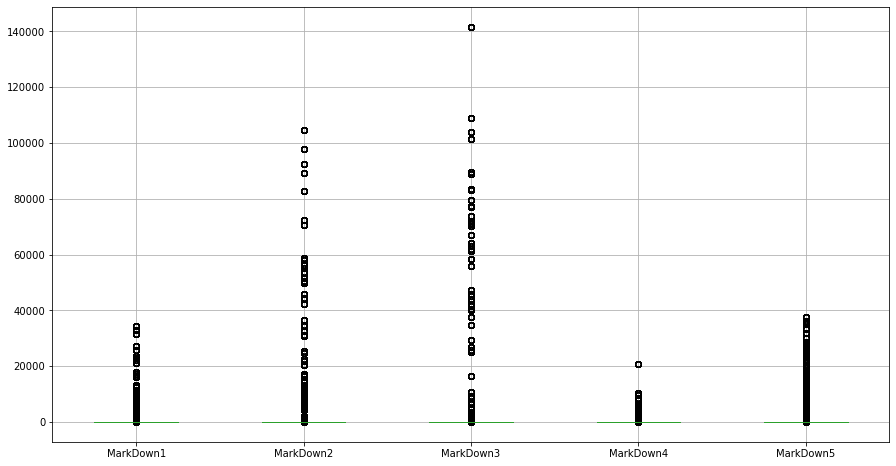

In [53]:
combined_data_train.boxplot(column = mark_columns,figsize=(15,8))
plt.show()


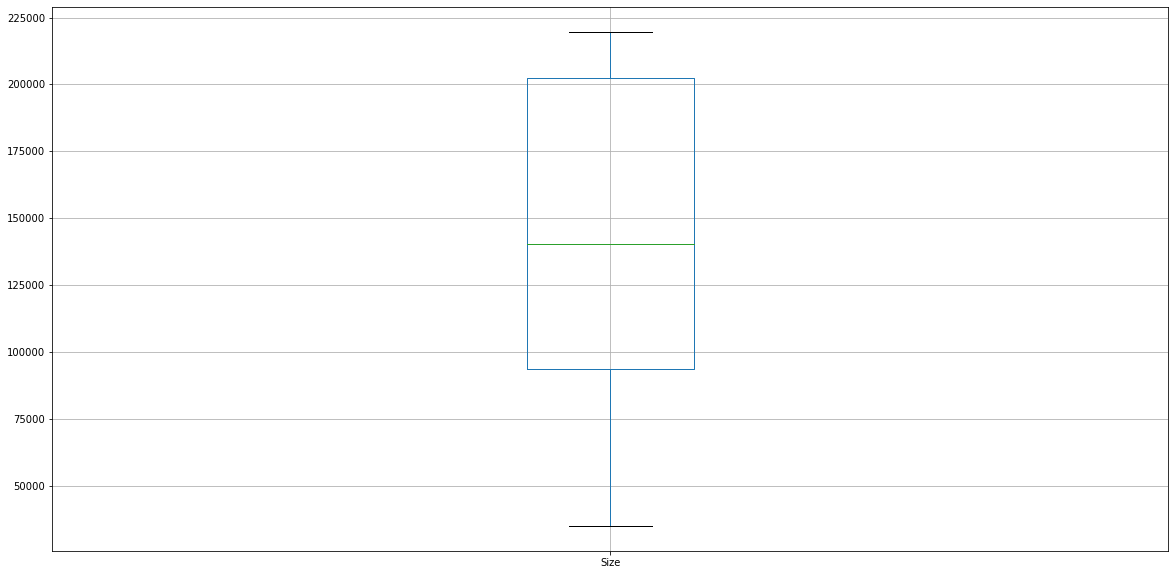

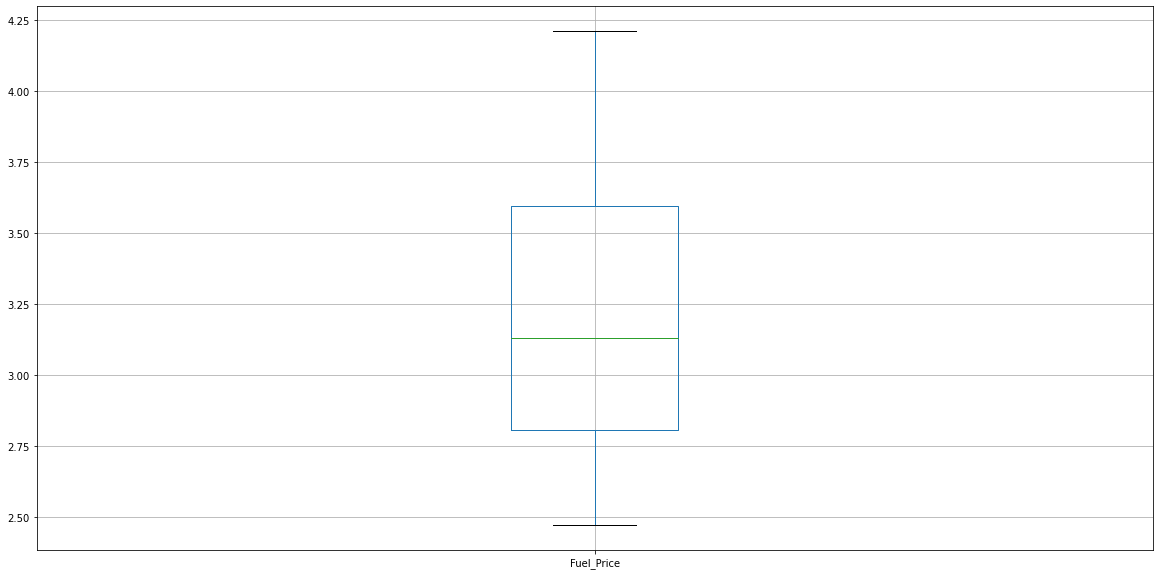

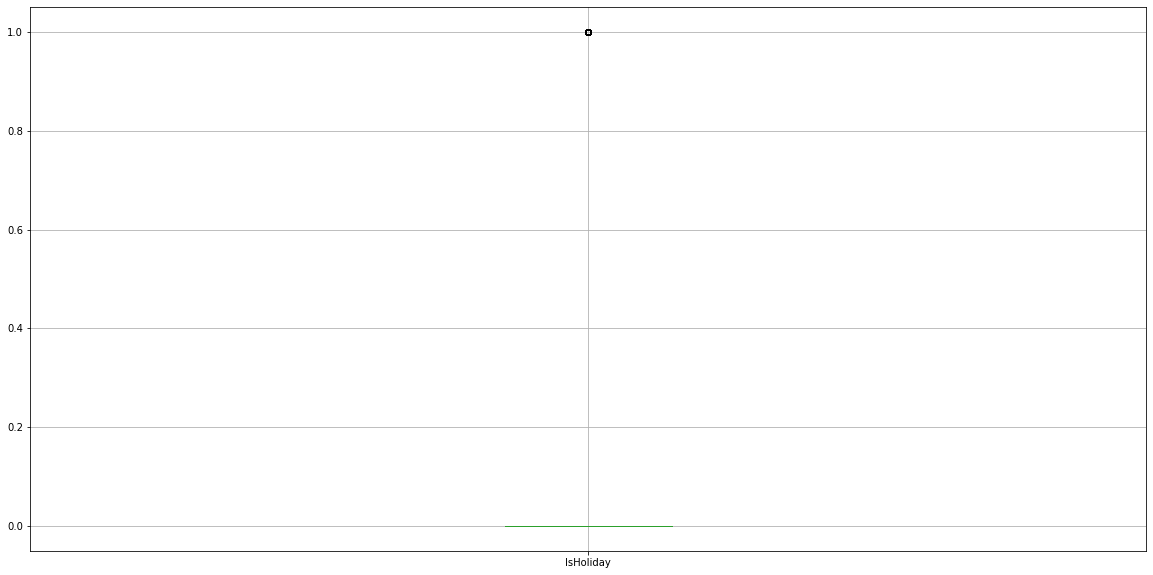

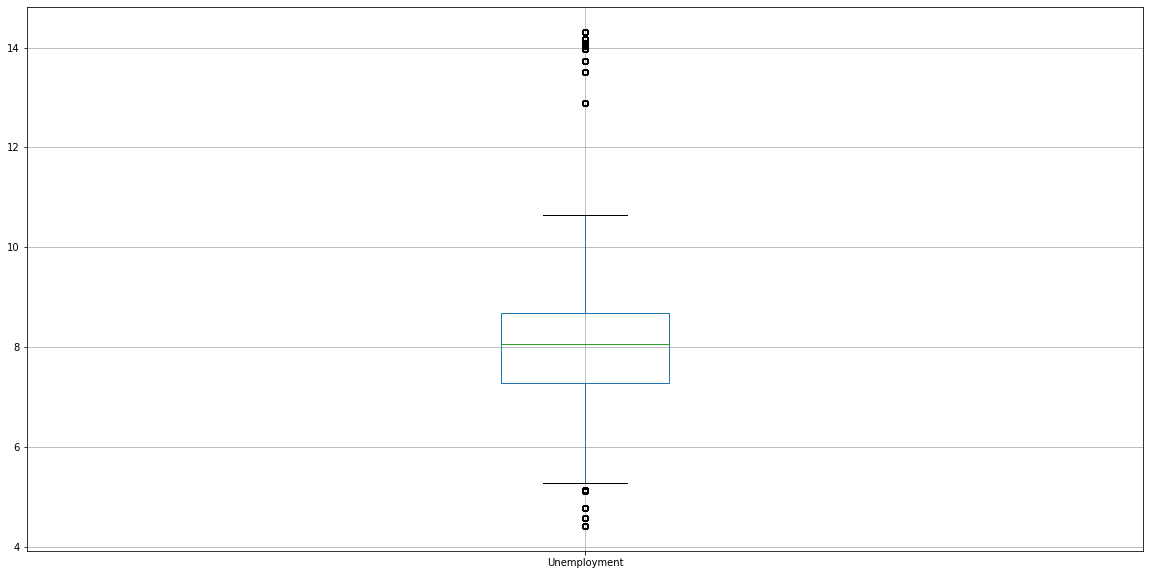

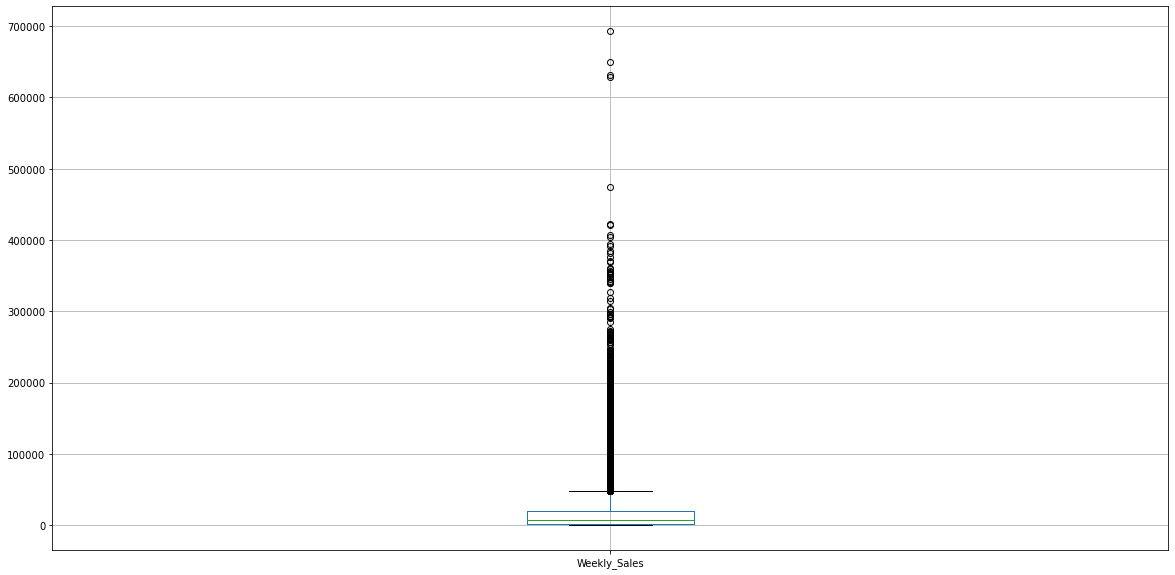

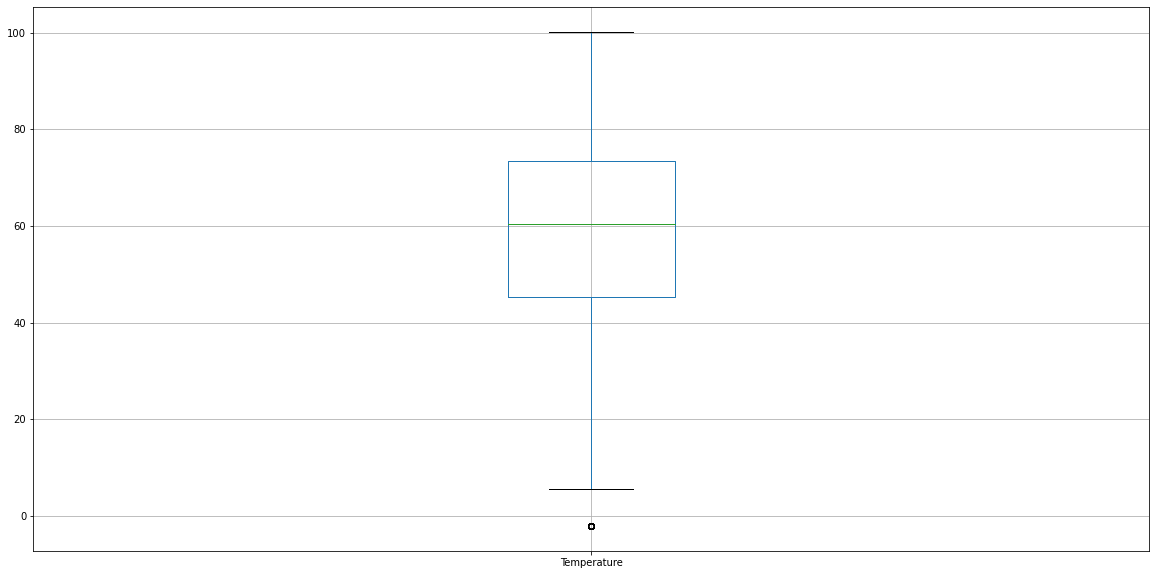

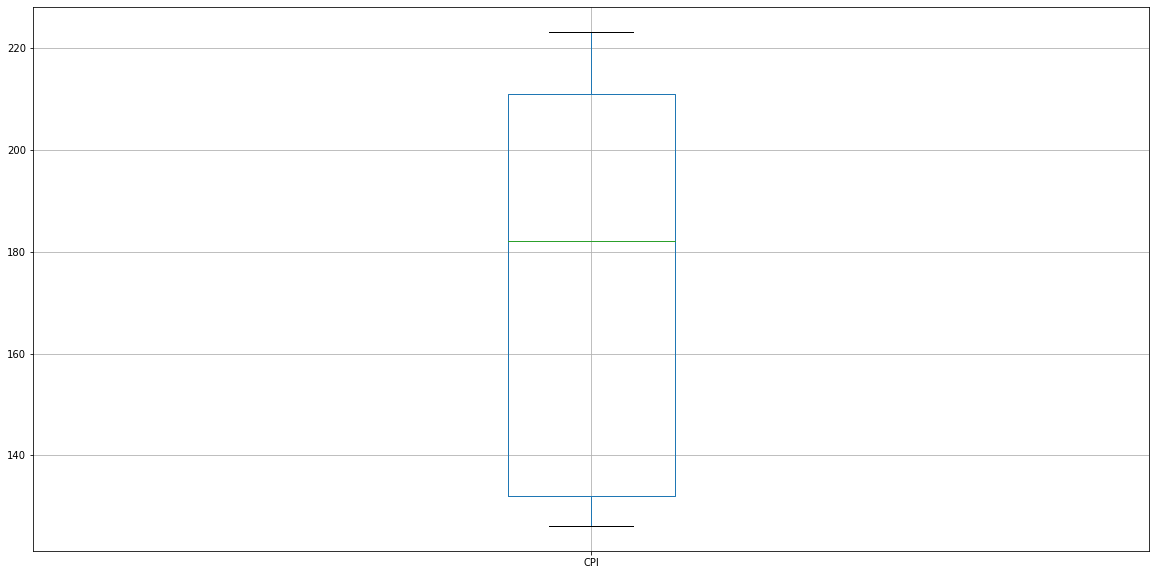

In [54]:
# for non markdown columns
for var in nonmark_columns:
    combined_data_train.boxplot(column= var,figsize=(20,10))
    plt.show()
    
# weekly sales has a lot of variations others look normal

## Bivariate analysis

In [55]:
# create a list of numerical variables to understand the correlation
train_num = combined_data_train[num_col]
train_num = train_num.drop(['Weekly_Sales'],axis = 1)
train_num.head()

IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0          0        42.31       2.572        0.0        0.0        0.0   
1          0        42.31       2.572        0.0        0.0        0.0   
2          0        42.31       2.572        0.0        0.0        0.0   
3          0        42.31       2.572        0.0        0.0        0.0   
4          0        42.31       2.572        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment    Size  
0        0.0        0.0  211.096358         8.106  151315  
1        0.0        0.0  211.096358         8.106  151315  
2        0.0        0.0  211.096358         8.106  151315  
3        0.0        0.0  211.096358         8.106  151315  
4        0.0        0.0  211.096358         8.106  151315

In [56]:
corr_values = train_num.corr().unstack().reset_index()
corr_values

level_0       level_1         0
0    IsHoliday     IsHoliday  1.000000
1    IsHoliday   Temperature -0.178936
2    IsHoliday    Fuel_Price -0.060499
3    IsHoliday     MarkDown1  0.034691
4    IsHoliday     MarkDown2  0.272442
..         ...           ...       ...
116       Size     MarkDown4  0.077153
117       Size     MarkDown5  0.067597
118       Size           CPI -0.005275
119       Size  Unemployment -0.085202
120       Size          Size  1.000000

[121 rows x 3 columns]

In [57]:
corr_values_unique = corr_values[corr_values['level_0']>corr_values['level_1']] # helps remove duplicate values
print(corr_values.shape)
print(corr_values_unique.shape)

(121, 3)
(55, 3)


In [58]:
corr_values_unique.columns = ['var1','var2','corr_value']
corr_values_unique.head()

var1        var2  corr_value
2     IsHoliday  Fuel_Price   -0.060499
8     IsHoliday         CPI    0.003058
11  Temperature   IsHoliday   -0.178936
13  Temperature  Fuel_Price    0.112741
14  Temperature   MarkDown1   -0.142848

In [59]:
corr_values_unique['absolute'] = corr_values_unique['corr_value'].abs()
corr_values_unique.sort_values(by = 'absolute',ascending=False,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
corr_values_unique.head()

var1       var2  corr_value  absolute
69      MarkDown4  MarkDown1    0.764146  0.764146
83      MarkDown5  MarkDown4    0.673759  0.673759
80      MarkDown5  MarkDown1    0.573937  0.573937
47      MarkDown2  MarkDown1    0.364552  0.364552
107  Unemployment        CPI   -0.298205  0.298205

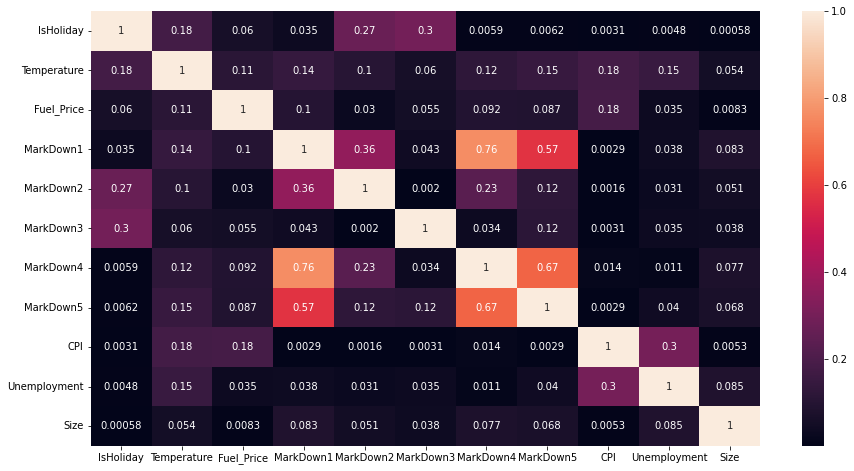

In [61]:
# create a heatmap
plt.figure(figsize=(15,8))
vg_corr = train_num.corr().abs()
sns.heatmap(vg_corr,xticklabels=vg_corr.columns.values,yticklabels=vg_corr.columns.values,annot=True)
plt.show()

<Figure size 1500x800 with 0 Axes>

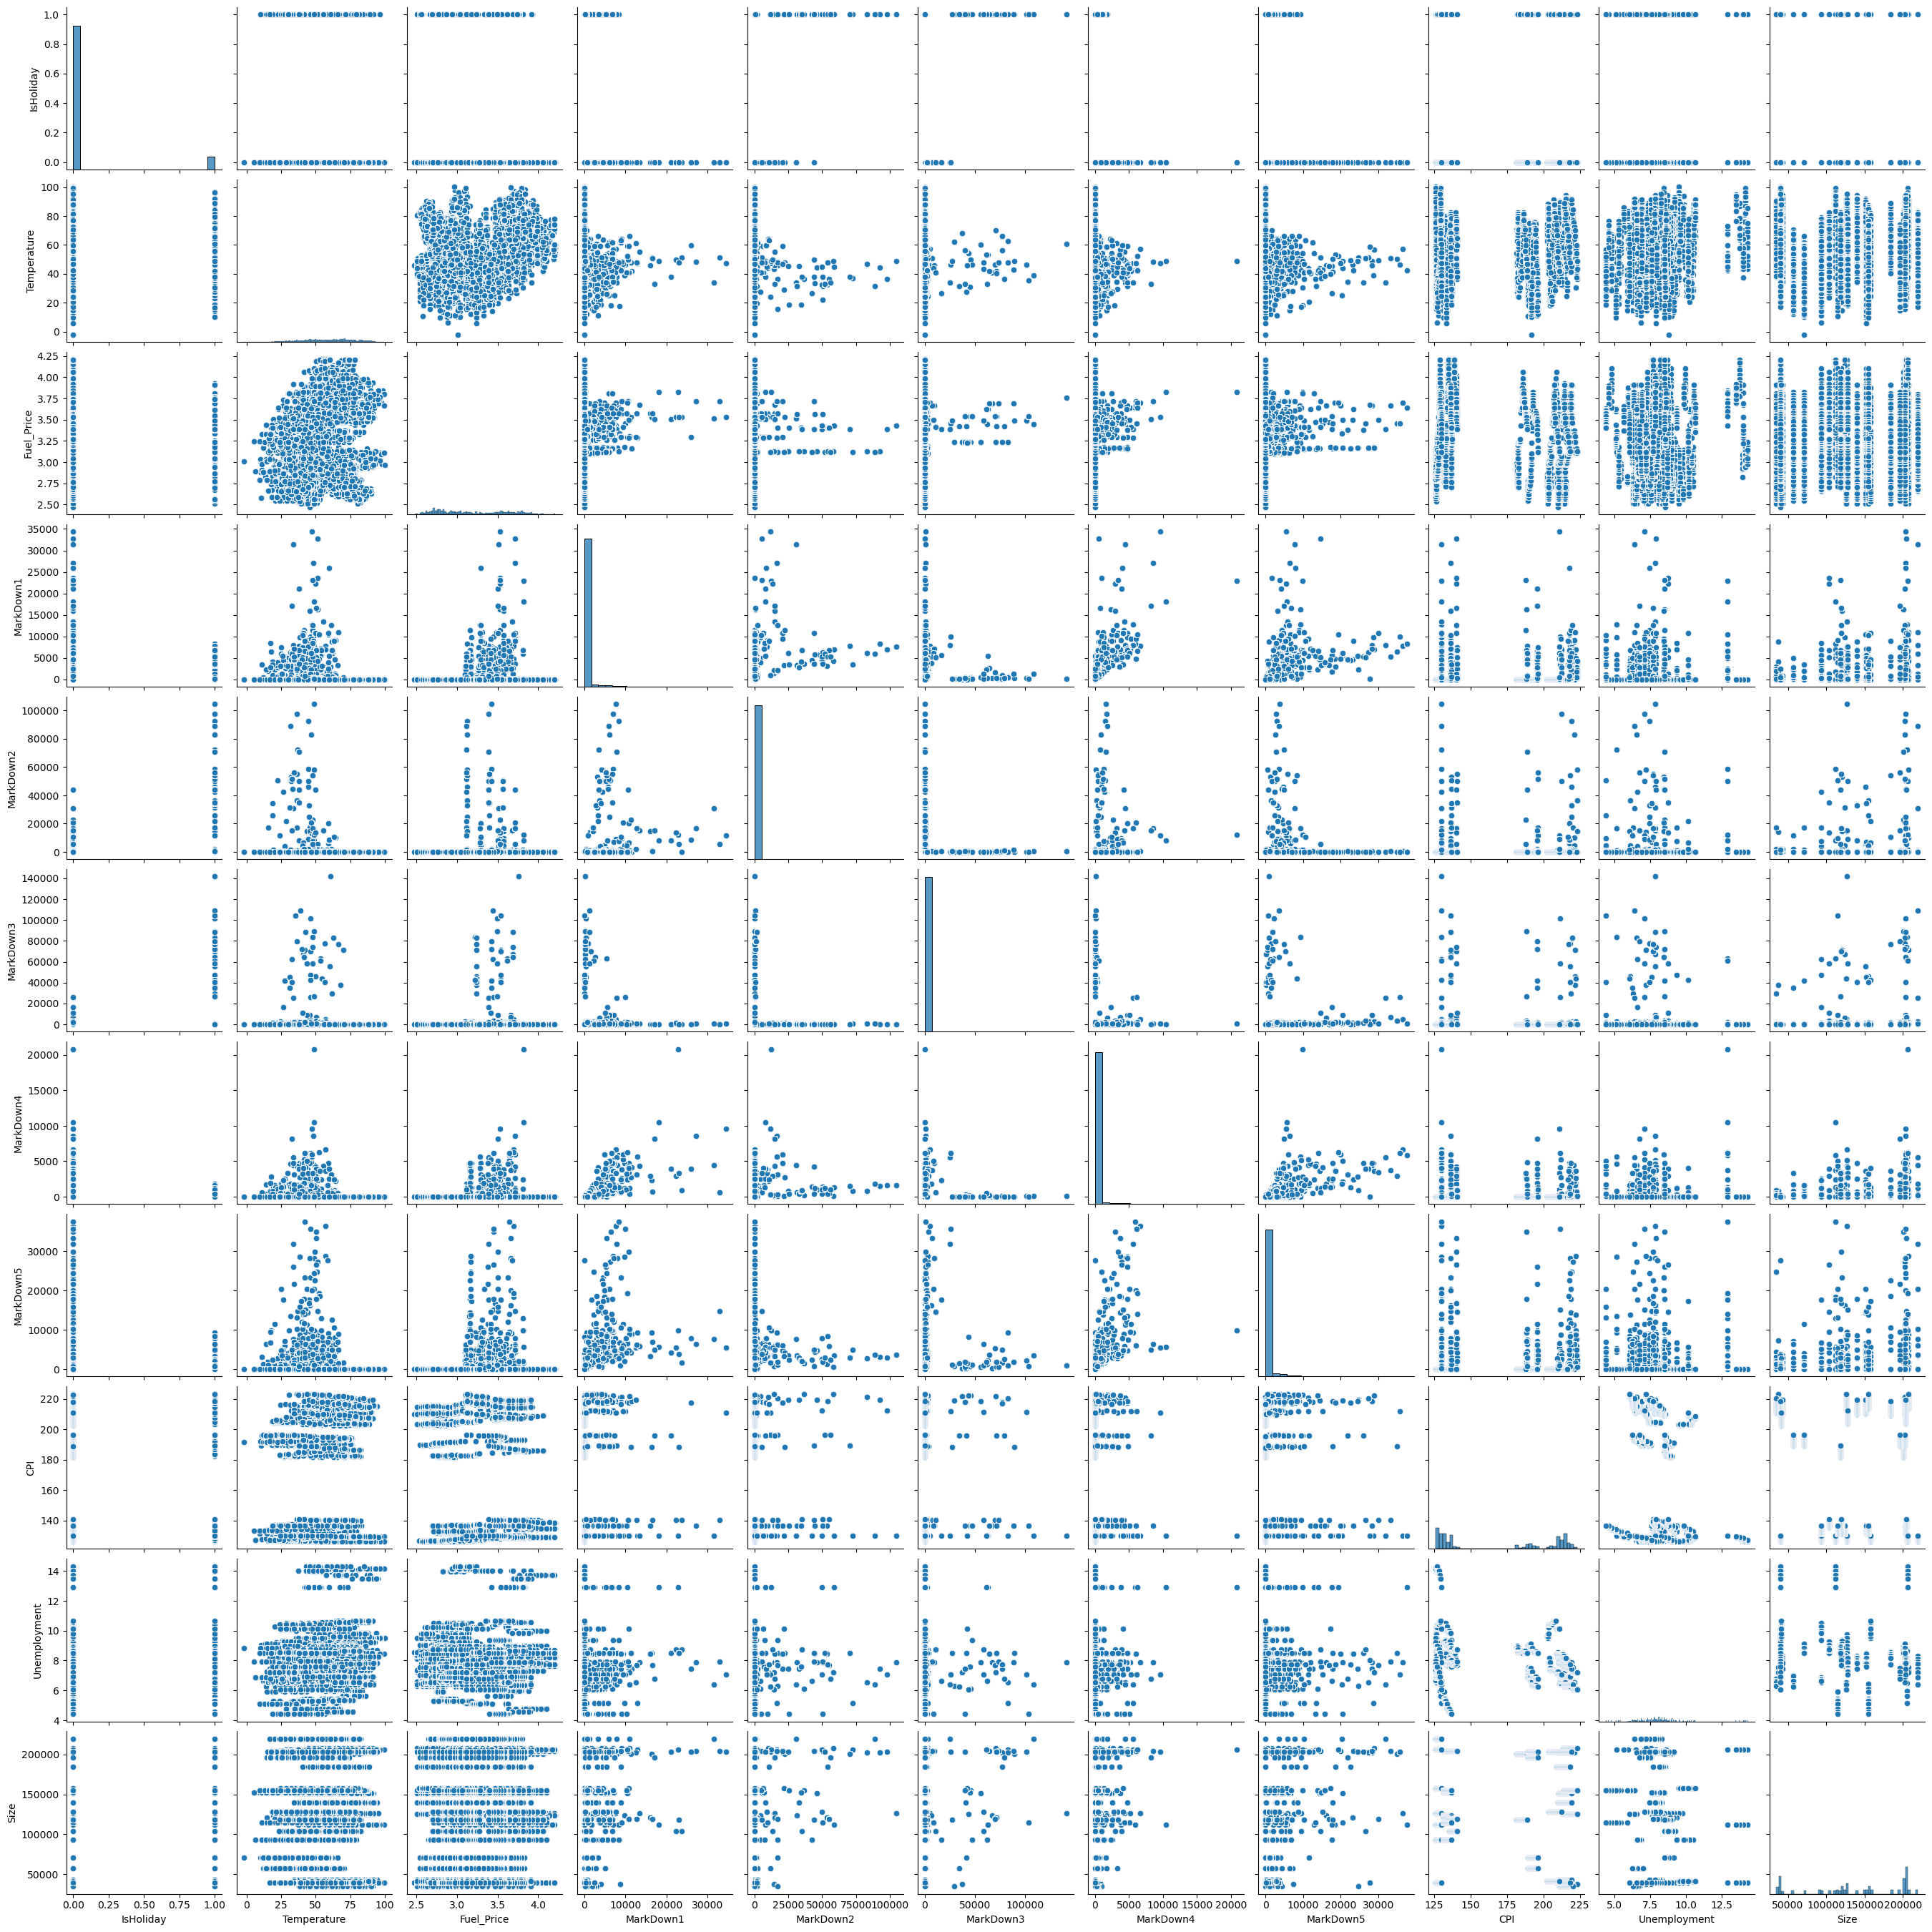

In [248]:
plt.figure(figsize = (15,8))
sns.pairplot(train_num)
plt.show()


## Dependent variable trends

In [63]:
combined_data_train.head()

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0     1    1  2010-02-05      24924.50          0        42.31       2.572   
1     1    2  2010-02-05      50605.27          0        42.31       2.572   
2     1    3  2010-02-05      13740.12          0        42.31       2.572   
3     1    4  2010-02-05      39954.04          0        42.31       2.572   
4     1    5  2010-02-05      32229.38          0        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size      Date2  
0         8.106    A  151315 2010-02-05  
1         8.106    A  151315 2010-02-05  
2         8.106    A  151315 2010-02-05  
3         8.106    A  151315 2010-02-05  
4         8.106    A  151315 2010-02-05

In [64]:
agg_store_sum = combined_data_train.groupby(['Store','Date'], as_index=False).agg({'Weekly_Sales':'sum'})
agg_store_mean = combined_data_train.groupby(['Store'], as_index=False).agg({'Weekly_Sales':'mean'})

In [65]:
agg_store_sum.head() # gives the storewise sales per date

Store        Date  Weekly_Sales
0     1  2010-02-05    1643690.90
1     1  2010-02-12    1641957.44
2     1  2010-02-19    1612831.17
3     1  2010-02-26    1409727.59
4     1  2010-03-05    1554806.68

In [66]:
agg_store_mean.head() # gives the storewise mean of weekly sales

Store  Weekly_Sales
0     1  21545.888896
1    10  26837.869405
2    11  19430.444191
3    12  14987.447047
4    13  27281.592335

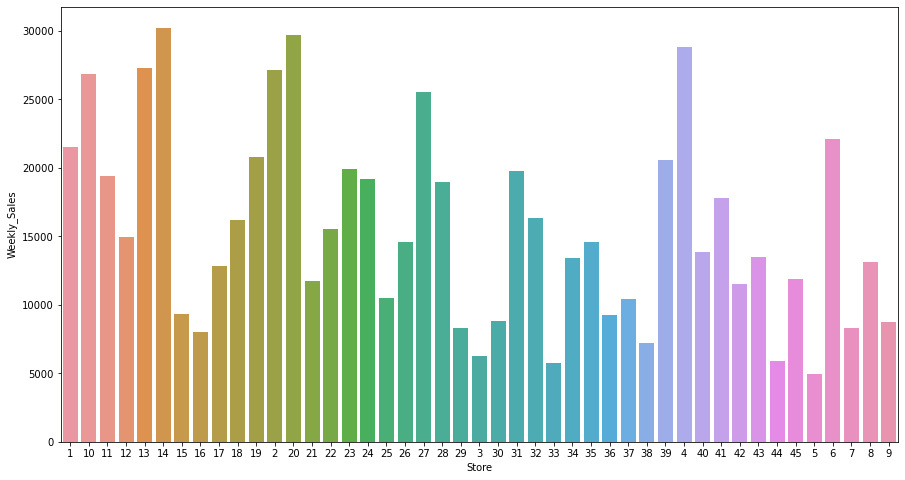

In [67]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store', y = 'Weekly_Sales',data = agg_store_mean)
plt.show()

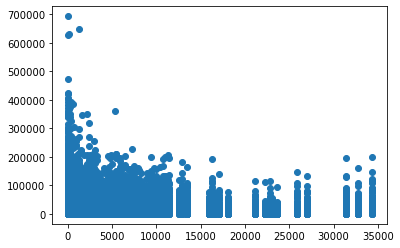

In [68]:
plt.scatter(x = combined_data_train['MarkDown1'],y = combined_data_train['Weekly_Sales'])

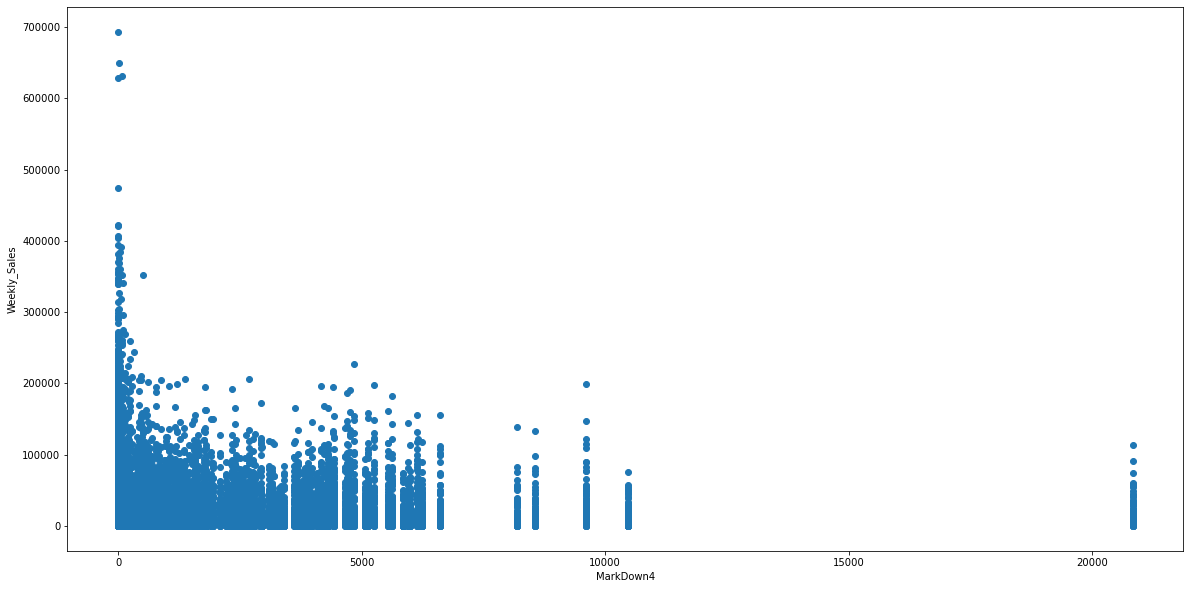

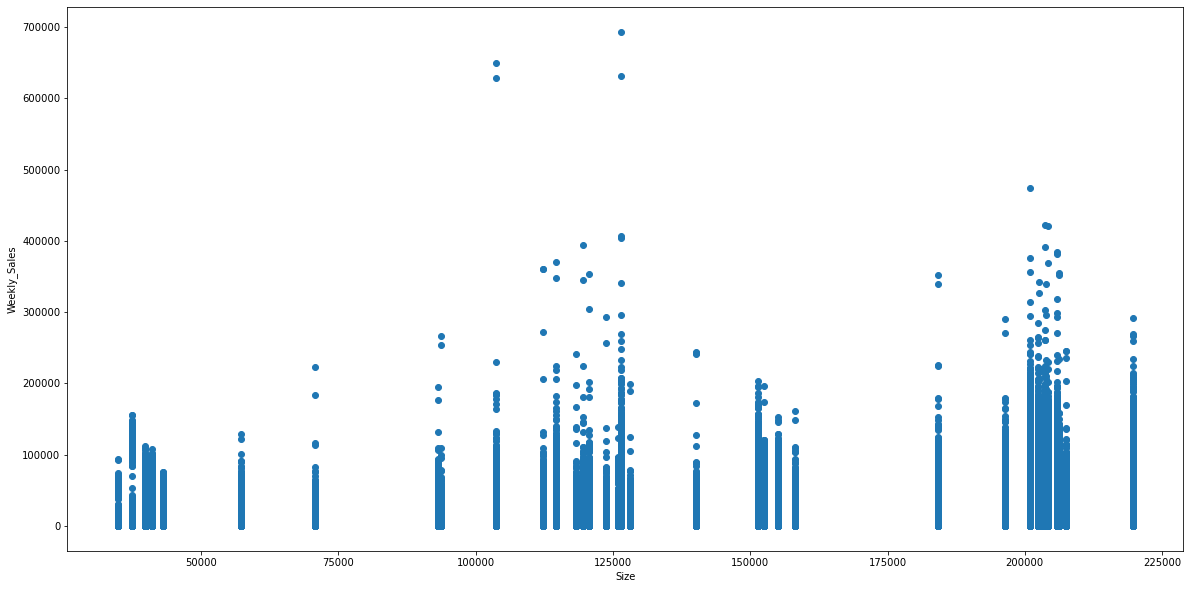

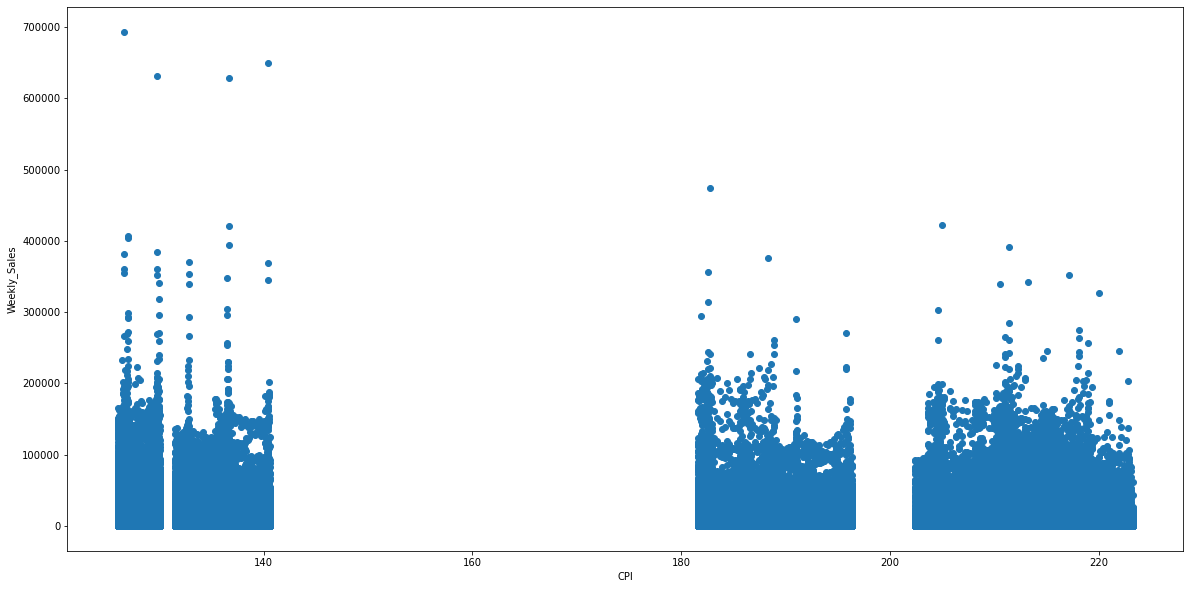

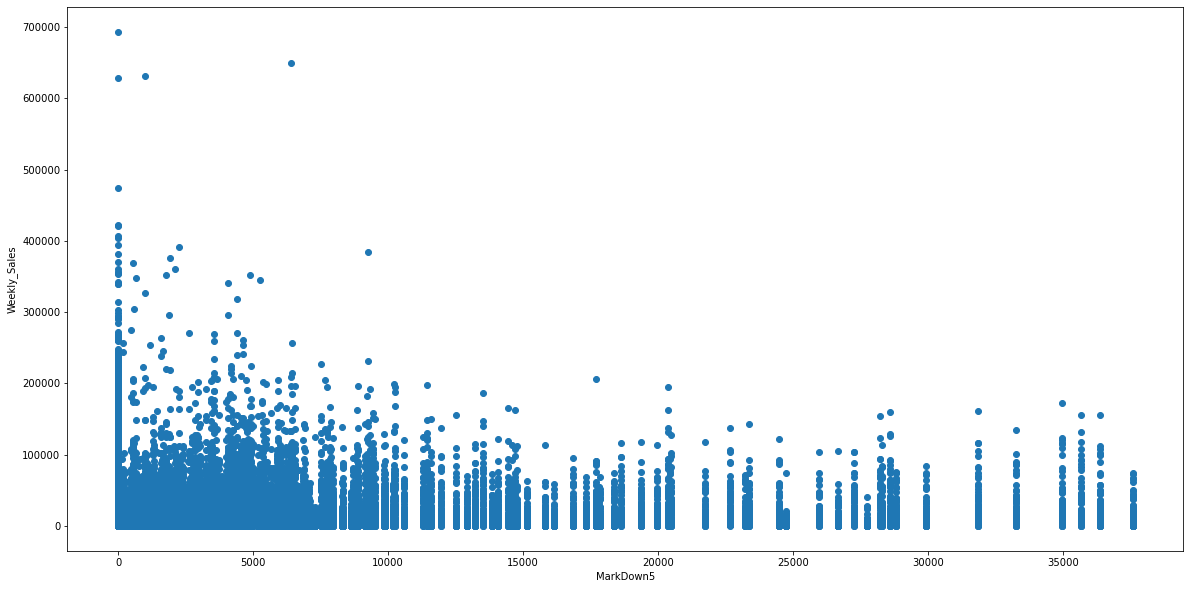

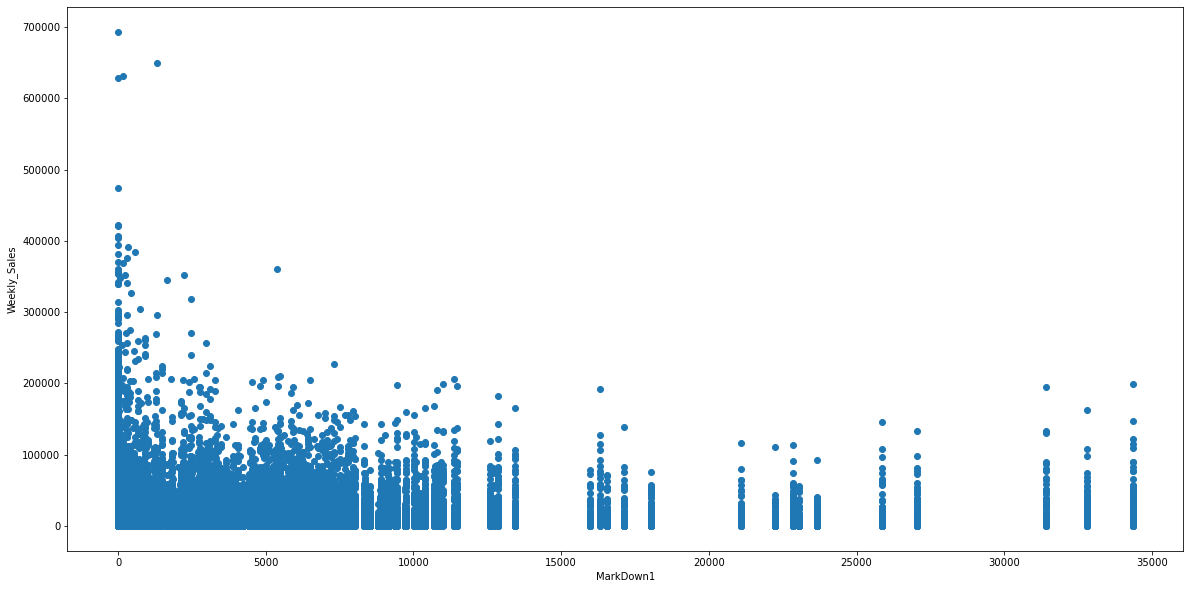

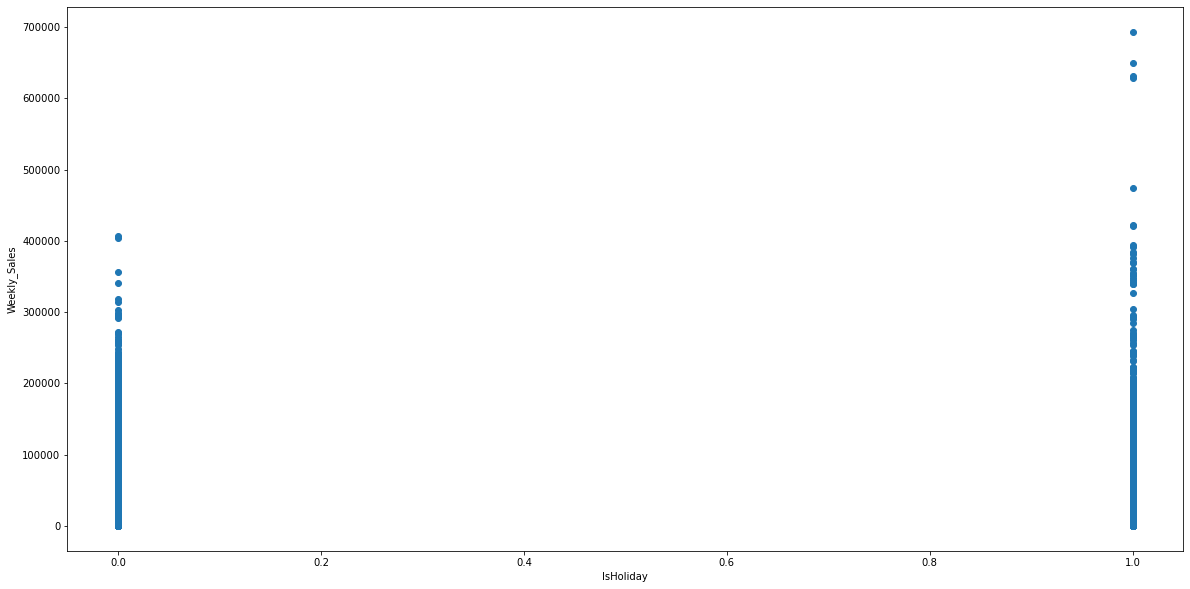

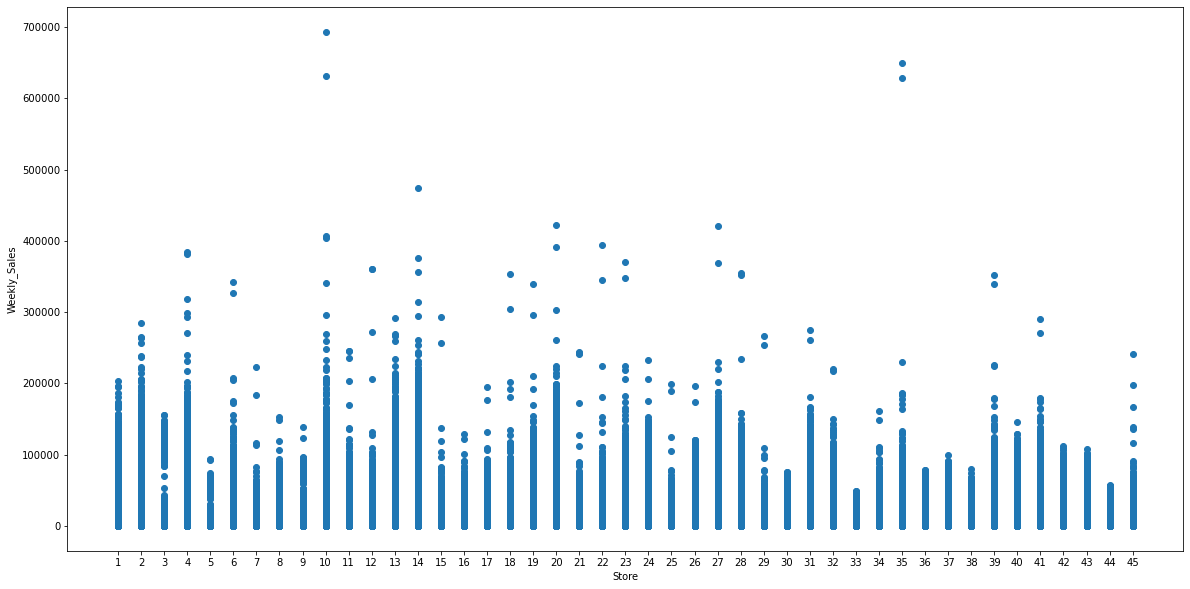

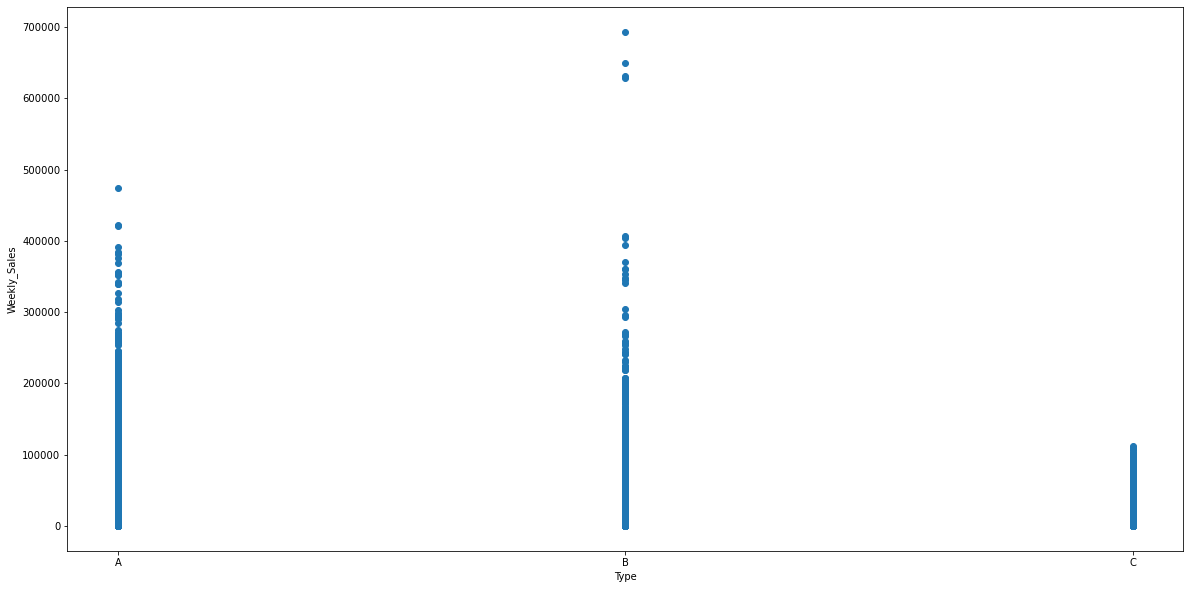

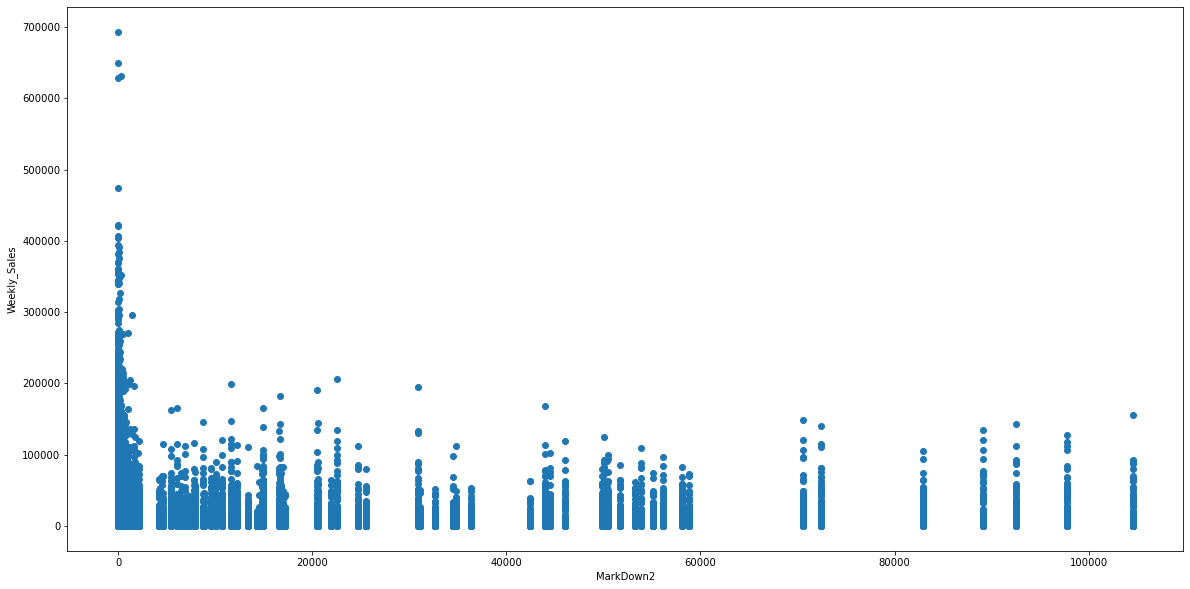

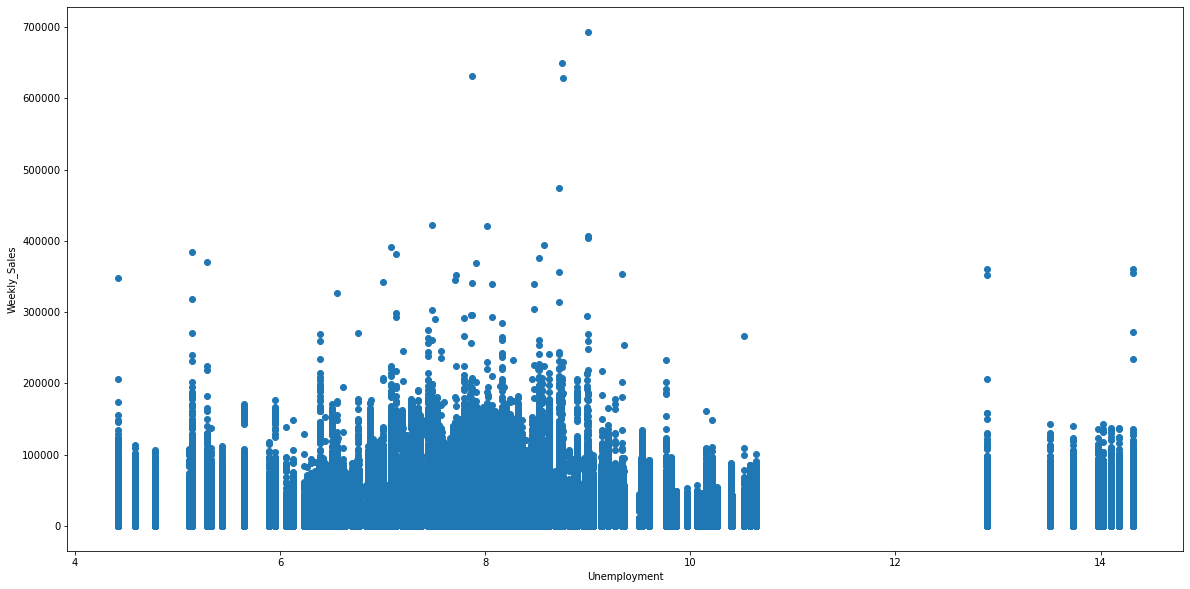

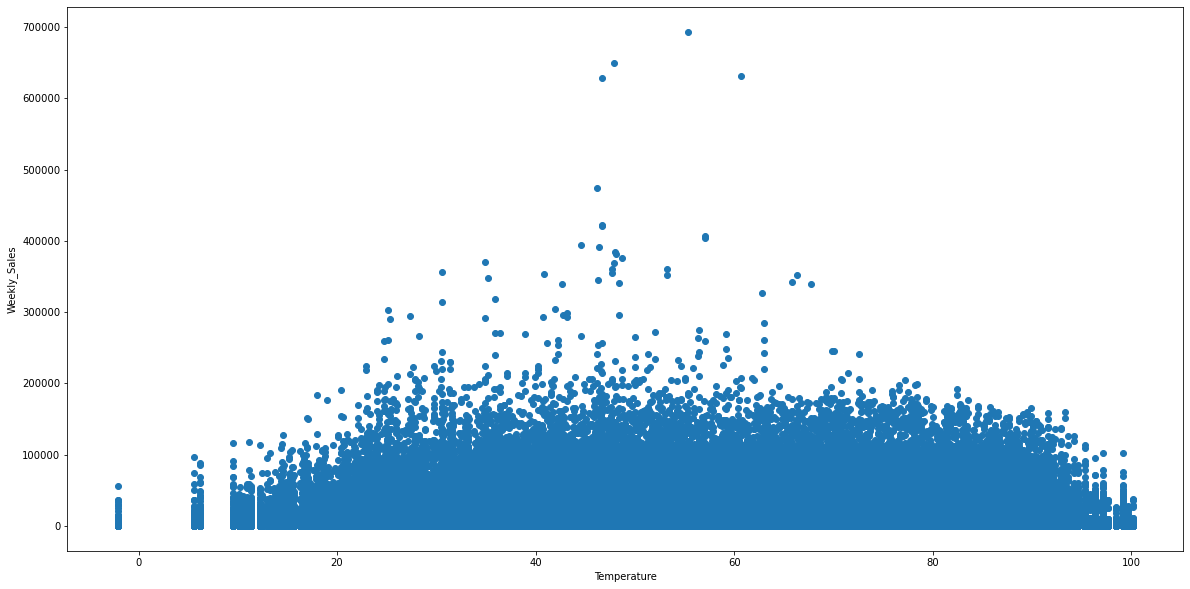

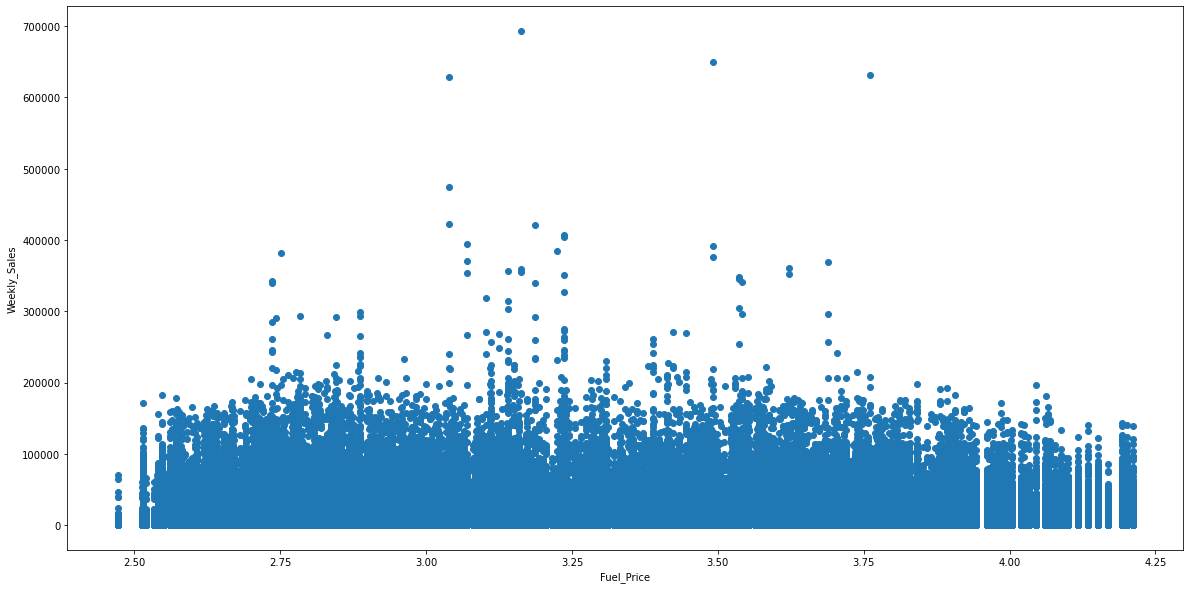

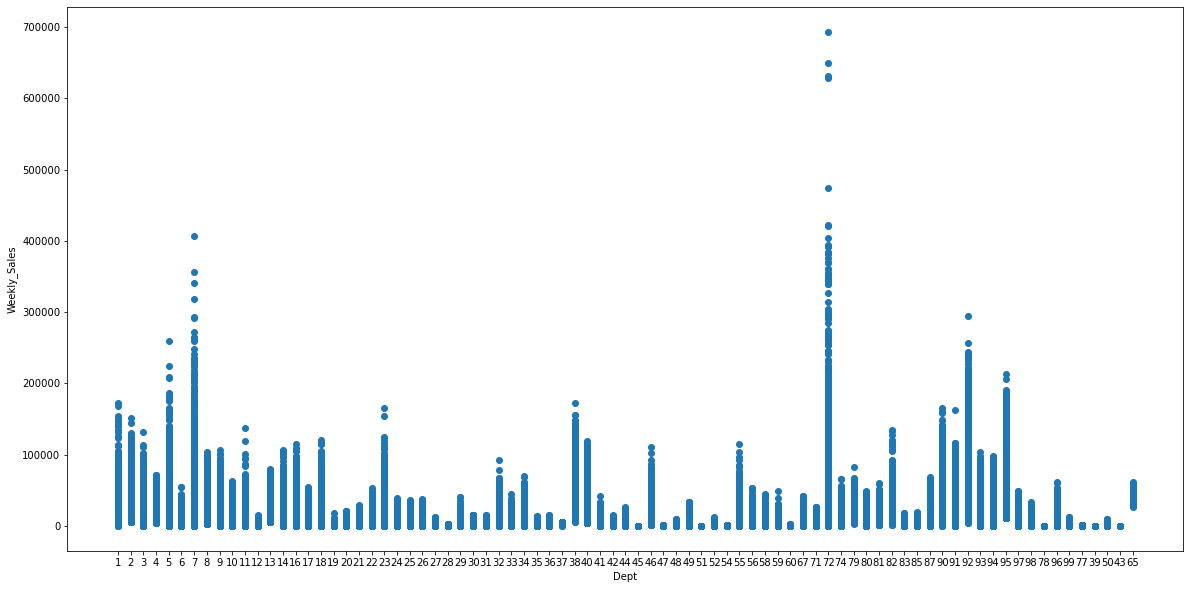

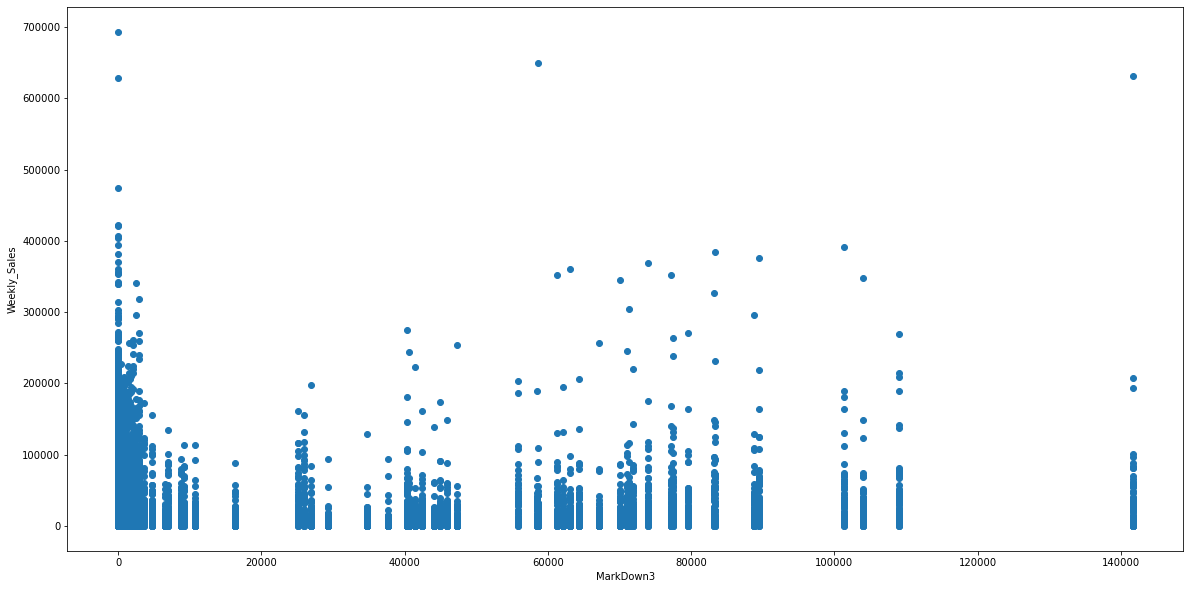

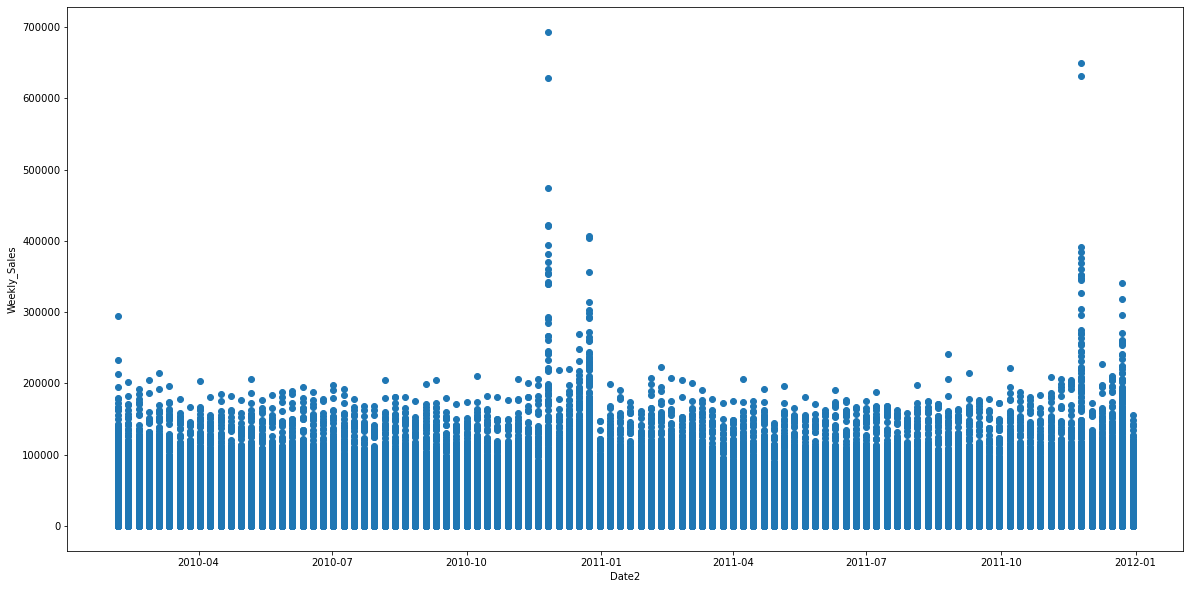

In [69]:
# checking trend of predictors with dependent variable
var_list = [x for x in combined_data_train.columns]
columns_to_drop = ['Weekly_Sales','Date']
var_list = list(set(var_list).difference(set(columns_to_drop)))
for varname in var_list:
    plt.figure(figsize = (20,10))
    plt.scatter(combined_data_train[varname],combined_data_train['Weekly_Sales'])
    plt.xlabel(varname)
    plt.ylabel('Weekly_Sales')
    plt.show()
    

## Date Trends

In [70]:
date_wise_sales = combined_data_train.groupby('Date',as_index=False).agg({'Weekly_Sales':'sum'})
date_wise_sales['Weekly_Sales'].mean()

47371515.068899974

In [71]:
combined_data_train['week_number'] = combined_data_train['Date2'].dt.week
combined_data_train['year_number'] = combined_data_train['Date2'].dt.year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [72]:
combined_data_train.head()

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0     1    1  2010-02-05      24924.50          0        42.31       2.572   
1     1    2  2010-02-05      50605.27          0        42.31       2.572   
2     1    3  2010-02-05      13740.12          0        42.31       2.572   
3     1    4  2010-02-05      39954.04          0        42.31       2.572   
4     1    5  2010-02-05      32229.38          0        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size      Date2  week_number  year_number  
0         8.106    A  151315 2010-02-05            5         2010  
1         8.106    A  151315 2010-02-05            5         2010  
2         8.106    A  151315 2010-02-05            5         2010  
3         8.106    A  151315 2010-02-05            5         2010  
4         8.106    A  151315 2010-02-05            5         2010

In [73]:
date_wise = combined_data_train.groupby(['Date','IsHoliday','week_number','year_number'],as_index=False).agg({'Weekly_Sales':'sum'})
date_wise.loc[date_wise['IsHoliday'] == 1].sort_values(by = 'Weekly_Sales',ascending = False)
# around thanksgiving there is highest sales

Date  IsHoliday  week_number  year_number  Weekly_Sales
94  2011-11-25          1           47         2011   66593835.85
42  2010-11-26          1           47         2010   65821216.26
1   2010-02-12          1            6         2010   48336800.10
53  2011-02-11          1            6         2011   47336816.90
83  2011-09-09          1           36         2011   46763760.42
99  2011-12-30          1           52         2011   46044300.91
31  2010-09-10          1           36         2010   45635418.66
47  2010-12-31          1           52         2010   40434740.42

In [74]:
# check for highest sales
date_wise.sort_values(by = 'Weekly_Sales',ascending=False)

Date  IsHoliday  week_number  year_number  Weekly_Sales
46  2010-12-24          0           51         2010   80931586.20
98  2011-12-23          0           51         2011   76999773.57
94  2011-11-25          1           47         2011   66593835.85
42  2010-11-26          1           47         2010   65821216.26
45  2010-12-17          0           50         2010   61821317.85
..         ...        ...          ...          ...           ...
33  2010-09-24          0           38         2010   41359671.97
49  2011-01-14          0            2         2011   40673850.98
50  2011-01-21          0            3         2011   40654860.31
47  2010-12-31          1           52         2010   40434740.42
51  2011-01-28          0            4         2011   39600376.50

[100 rows x 5 columns]

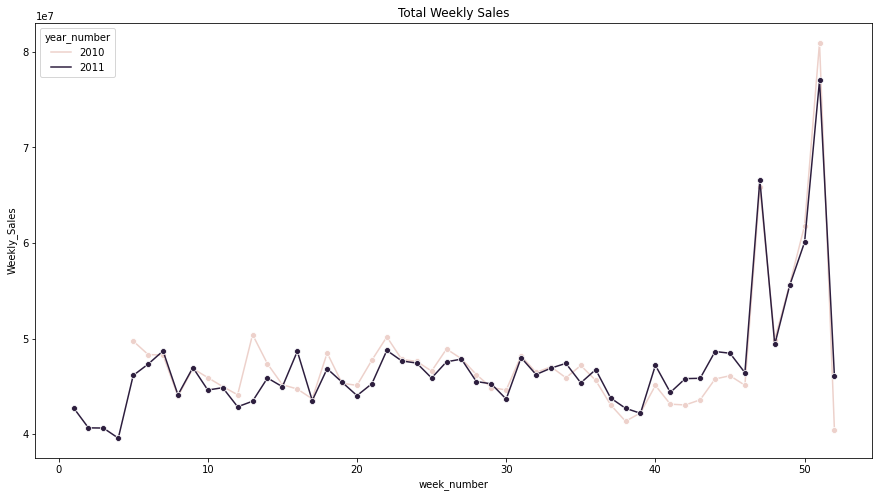

In [75]:
# checking weekly sales of different years
another_agg = combined_data_train.groupby(['week_number','year_number','IsHoliday'],as_index=False).agg({'Weekly_Sales':'sum'})
plt.figure(figsize = (15,8))
plt.title('Total Weekly Sales')
sns.lineplot(x = "week_number",y= 'Weekly_Sales',hue='year_number',data = another_agg,marker = 'o')
plt.show()

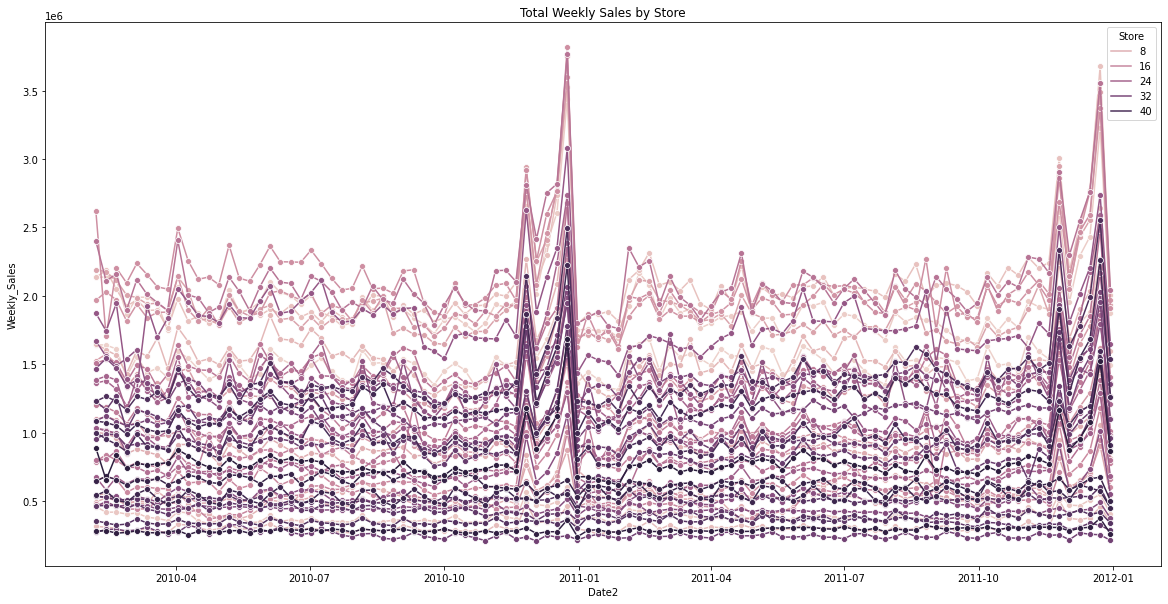

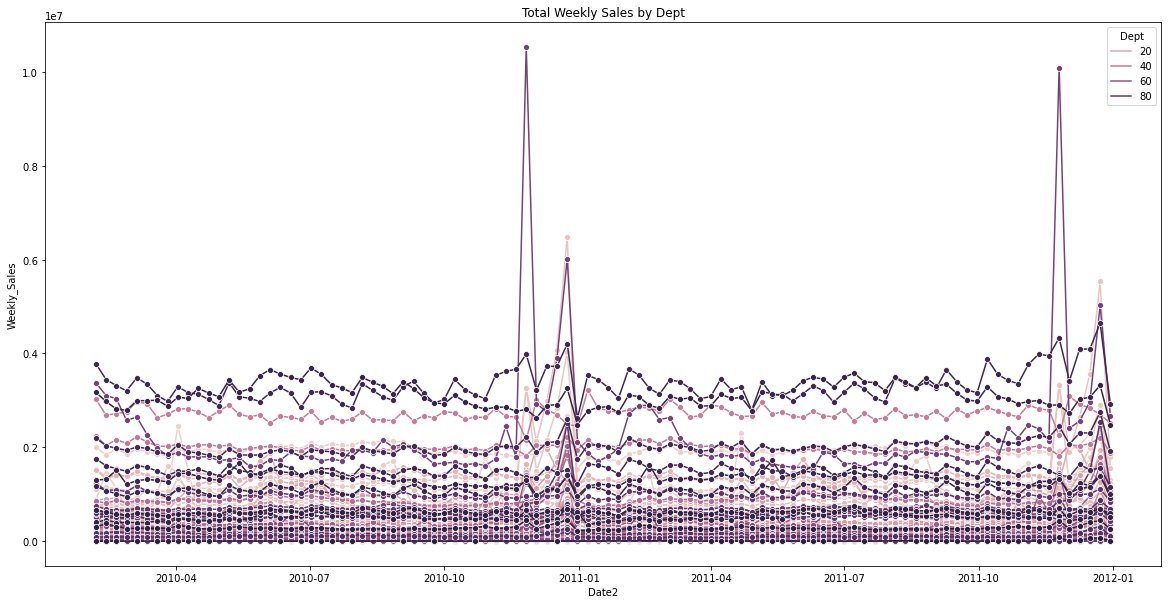

In [76]:
# checking total weekly sales of different stores
for var in ['Store','Dept']:
    agg_temp = combined_data_train.groupby(['Date2',var],as_index=False).agg({'Weekly_Sales':'sum'})
    plt.figure(figsize=(20,10))
    plt.title("Total Weekly Sales by " + var)
    agg_temp[var] = pd.to_numeric(agg_temp[var]) # hue variable has to be numerical
    sns.lineplot(x = 'Date2',y = 'Weekly_Sales',hue = var,data = agg_temp,marker = 'o')

# __Feature creation__

In [77]:
conditions = [combined_data_train['IsHoliday'] == 0,combined_data_train['week_number'] == 52,
              combined_data_train['week_number'] == 47,combined_data_train['week_number'] == 36, 
              combined_data_train['week_number'] == 6]
choices = ['no_holiday','christmas','thanksgiving','labor_day','super_bowl']
combined_data_train['holiday_type'] = np.select(conditions,choices,default=np.nan)
combined_data_train['holiday_type'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


no_holiday      269595
thanksgiving      5946
christmas         5909
super_bowl        5879
labor_day         5875
Name: holiday_type, dtype: int64

In [78]:
def season_variables(df):
    df['week_number'] = df['Date2'].dt.week  # get the week from the date
    df['year_number'] = df['Date2'].dt.year  # get the year from the date
    conditions = [df['IsHoliday'] == 0,df['week_number'] == 52,
                  df['week_number'] == 47,df['week_number'] == 36, df['week_number'] == 6] # get holiday weeks
    choices = ['no_holiday','christmas','thanksgiving','labor_day','super_bowl']
    df['holiday_type'] = np.select(conditions,choices,default=np.nan)
    df['holiday_type'].value_counts()
    christmas_df = pd.DataFrame(df[df['holiday_type'] == 'christmas']['Date2'].unique())
    christmas_df.columns = ['christmas_week']
    christmas_df['minus1'] = christmas_df['christmas_week'] - pd.to_timedelta(7,unit = 'd')
    christmas_df['minus2'] = christmas_df['christmas_week'] - pd.to_timedelta(14,unit = 'd')
    christmas_df['minus3'] = christmas_df['christmas_week'] - pd.to_timedelta(21,unit = 'd')
    # creating all the 5 binary variables
    df['christmas_week'] = np.where(df['Date2'].isin(list(christmas_df['christmas_week'])),1,0)
    df['christmas_minus1'] = np.where(df['Date2'].isin(list(christmas_df['minus1'])),1,0)
    df['christmas_minus2'] = np.where(df['Date2'].isin(list(christmas_df['minus2'])),1,0)
    df['christmas_minus3'] = np.where(df['Date2'].isin(list(christmas_df['minus3'])),1,0)
    df['thanksgiving_week'] = np.where(df['holiday_type'] == 'thanksgiving',1,0)
    print(df['christmas_week'].value_counts())
    print(df['christmas_minus1'].value_counts())
    print(df['christmas_minus2'].value_counts())
    print(df['christmas_minus3'].value_counts())
    print(df['thanksgiving_week'].value_counts())
    return df

In [79]:
import warnings
warnings.filterwarnings("ignore")
season_variables(combined_data_train)


0    287295
1      5909
Name: christmas_week, dtype: int64
0    287234
1      5970
Name: christmas_minus1, dtype: int64
0    287251
1      5953
Name: christmas_minus2, dtype: int64
0    287266
1      5938
Name: christmas_minus3, dtype: int64
0    287258
1      5946
Name: thanksgiving_week, dtype: int64


Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2010-02-05      24924.50          0        42.31   
1          1    2  2010-02-05      50605.27          0        42.31   
2          1    3  2010-02-05      13740.12          0        42.31   
3          1    4  2010-02-05      39954.04          0        42.31   
4          1    5  2010-02-05      32229.38          0        42.31   
...      ...  ...         ...           ...        ...          ...   
417309    45   93  2011-12-30       1426.52          1        37.79   
417310    45   94  2011-12-30       2979.03          1        37.79   
417311    45   95  2011-12-30      42084.36          1        37.79   
417312    45   97  2011-12-30       5569.82          1        37.79   
417313    45   98  2011-12-30        553.21          1        37.79   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...    Size      Date2  \
0            2.572       0.00       0.00       0.00  ...  151315 2010-02-05   
1            2.572       0.00       0.00       0.00  ...  151315 2010-02-05   
2            2.572       0.00       0.00       0.00  ...  151315 2010-02-05   
3            2.572       0.00       0.00       0.00  ...  151315 2010-02-05   
4            2.572       0.00       0.00       0.00  ...  151315 2010-02-05   
...            ...        ...        ...        ...  ...     ...        ...   
417309       3.389    3604.35   43941.56     287.45  ...  118221 2011-12-30   
417310       3.389    3604.35   43941.56     287.45  ...  118221 2011-12-30   
417311       3.389    3604.35   43941.56     287.45  ...  118221 2011-12-30   
417312       3.389    3604.35   43941.56     287.45  ...  118221 2011-12-30   
417313       3.389    3604.35   43941.56     287.45  ...  118221 2011-12-30   

        week_number  year_number holiday_type  christmas_week  \
0                 5         2010   no_holiday               0   
1                 5         2010   no_holiday               0   
2                 5         2010   no_holiday               0   
3                 5         2010   no_holiday               0   
4                 5         2010   no_holiday               0   
...             ...          ...          ...             ...   
417309           52         2011    christmas               1   
417310           52         2011    christmas               1   
417311           52         2011    christmas               1   
417312           52         2011    christmas               1   
417313           52         2011    christmas               1   

       christmas_minus1  christmas_minus2  christmas_minus3 thanksgiving_week  
0                     0                 0                 0                 0  
1                     0                 0                 0                 0  
2                     0                 0                 0                 0  
3                     0                 0                 0                 0  
4                     0                 0                 0                 0  
...                 ...               ...               ...               ...  
417309                0                 0                 0                 0  
417310                0                 0                 0                 0  
417311                0                 0                 0                 0  
417312                0                 0                 0                 0  
417313                0                 0                 0                 0  

[293204 rows x 25 columns]

In [80]:
warnings.filterwarnings("ignore")
season_variables(combined_data_test)

0    127008
Name: christmas_week, dtype: int64
0    127008
Name: christmas_minus1, dtype: int64
0    127008
Name: christmas_minus2, dtype: int64
0    127008
Name: christmas_minus3, dtype: int64
0    127008
Name: thanksgiving_week, dtype: int64


Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
7157       1    1  2012-01-06      16567.69          0        49.01   
7158       1    2  2012-01-06      44481.38          0        49.01   
7159       1    3  2012-01-06      13926.04          0        49.01   
7160       1    4  2012-01-06      40925.76          0        49.01   
7161       1    5  2012-01-06      23105.81          0        49.01   
...      ...  ...         ...           ...        ...          ...   
420207    45   93  2012-10-26       2487.80          0        58.85   
420208    45   94  2012-10-26       5203.31          0        58.85   
420209    45   95  2012-10-26      56017.47          0        58.85   
420210    45   97  2012-10-26       6817.48          0        58.85   
420211    45   98  2012-10-26       1076.80          0        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...    Size      Date2  \
7157         3.157    6277.39   21813.16      143.1  ...  151315 2012-01-06   
7158         3.157    6277.39   21813.16      143.1  ...  151315 2012-01-06   
7159         3.157    6277.39   21813.16      143.1  ...  151315 2012-01-06   
7160         3.157    6277.39   21813.16      143.1  ...  151315 2012-01-06   
7161         3.157    6277.39   21813.16      143.1  ...  151315 2012-01-06   
...            ...        ...        ...        ...  ...     ...        ...   
420207       3.882    4018.91      58.08      100.0  ...  118221 2012-10-26   
420208       3.882    4018.91      58.08      100.0  ...  118221 2012-10-26   
420209       3.882    4018.91      58.08      100.0  ...  118221 2012-10-26   
420210       3.882    4018.91      58.08      100.0  ...  118221 2012-10-26   
420211       3.882    4018.91      58.08      100.0  ...  118221 2012-10-26   

        week_number  year_number holiday_type  christmas_week  \
7157              1         2012   no_holiday               0   
7158              1         2012   no_holiday               0   
7159              1         2012   no_holiday               0   
7160              1         2012   no_holiday               0   
7161              1         2012   no_holiday               0   
...             ...          ...          ...             ...   
420207           43         2012   no_holiday               0   
420208           43         2012   no_holiday               0   
420209           43         2012   no_holiday               0   
420210           43         2012   no_holiday               0   
420211           43         2012   no_holiday               0   

       christmas_minus1  christmas_minus2  christmas_minus3 thanksgiving_week  
7157                  0                 0                 0                 0  
7158                  0                 0                 0                 0  
7159                  0                 0                 0                 0  
7160                  0                 0                 0                 0  
7161                  0                 0                 0                 0  
...                 ...               ...               ...               ...  
420207                0                 0                 0                 0  
420208                0                 0                 0                 0  
420209                0                 0                 0                 0  
420210                0                 0                 0                 0  
420211                0                 0                 0                 0  

[127008 rows x 25 columns]

In [81]:
store_dept_median = combined_data_train.groupby(['Store','Dept'],as_index=False).agg({'Weekly_Sales':['median']})
print(store_dept_median.shape)
store_dept_median.columns = ['_'.join(x) for x in store_dept_median.columns.ravel()]
store_dept_median.columns = ['Store','Dept','Weekly_Sales_median']
print(store_dept_median.head())

(3292, 3)
  Store Dept  Weekly_Sales_median
0     1    1            18988.700
1     1   10            30870.720
2     1   11            23574.725
3     1   12            10607.065
4     1   13            37848.040


In [82]:
print(combined_data_train.shape)
combined_data_train2 = pd.merge(combined_data_train,store_dept_median,on=['Store','Dept'],how = 'left')
print(combined_data_train2.shape)
print(combined_data_test.shape)
combined_data_test2 = pd.merge(combined_data_test,store_dept_median,on=['Store','Dept'],how = 'left')
print(combined_data_test2.shape)

(293204, 25)
(293204, 26)
(127008, 25)
(127008, 26)


In [83]:
combined_data_test2['Weekly_Sales_median'].fillna(combined_data_test2['Weekly_Sales_median'].mean(),inplace = True)

# __Modeling__

## Prediction based on Store, Dept, and Week

In [117]:
#Prediction based on Store, Dept and Week
simple_prediction = combined_data_train.groupby(['Store', 'Dept', 'week_number'], as_index=False).agg({'Weekly_Sales' :  ['mean', 'count' ]})
print(simple_prediction.shape)
simple_prediction.columns = ["_".join(x) for x in simple_prediction.columns.ravel()]
simple_prediction = simple_prediction.drop(['Weekly_Sales_count'], axis=1)
simple_prediction.columns = ['Store', 'Dept', 'week_number', 'Sales_prediction']
simple_prediction['prediction_type'] = 1
simple_prediction.head()

(155979, 5)


Store Dept  week_number  Sales_prediction  prediction_type
0     1    1            1          15984.24                1
1     1    1            2          17359.70                1
2     1    1            3          17341.47                1
3     1    1            4          18461.18                1
4     1    1            5          23295.13                1

In [119]:
pd.merge(combined_data_test, simple_prediction, on = ['Store', 'Dept', 'week_number']).shape

(124366, 27)

In [120]:
#Prediction based on Dept..since previous prediction will miss required combinations..
#this is being done to provide approximation for sales in a dept irrespective of size 
moresimple_prediction = combined_data_train.groupby(['Dept'], as_index=False).agg({'Weekly_Sales' :  ['mean', 'count' ]})
print(moresimple_prediction.shape)
moresimple_prediction.columns = ["_".join(x) for x in moresimple_prediction.columns.ravel()]
print(moresimple_prediction['Weekly_Sales_count'].describe())
moresimple_prediction = moresimple_prediction.drop(['Weekly_Sales_count'], axis=1)
moresimple_prediction.columns = ['Dept', 'Sales_prediction']
moresimple_prediction['prediction_type'] = 2
moresimple_prediction.head()

(81, 3)
count      81.000000
mean     3619.802469
std      1331.333180
min         6.000000
25%      3705.000000
50%      4115.000000
75%      4500.000000
max      4500.000000
Name: Weekly_Sales_count, dtype: float64


Dept  Sales_prediction  prediction_type
0    1      19598.410840                2
1   10      18246.069967                2
2   11      14668.411385                2
3   12       4151.166962                2
4   13      30624.612680                2

In [121]:
#making sure there is no more than one entry for this combo
def score_direct(df_to_score, pred_df1, pred_df2):
    """
    We will use the 2 set of predictions made to estimate sales on the test data 
    """
    df_to_score['week_number'] =  df_to_score['Date2'].dt.week
    df_input = df_to_score[['Store', 'Dept', 'Date2',  'week_number']]
    print(df_input.shape)
    #checking if there is only 1 entry per combination being used to predict (i.e. Store, Dept, Week Number)
    print( df_input.groupby(['Store', 'Dept', 'week_number']).size().shape )
    #Using prediction1 and separate out combinations that remain unscored
    df_scored = pd.merge(df_input, pred_df1, on= ['Store', 'Dept', 'week_number'], how='left')
    df_present = df_scored[ pd.isnull(df_scored['prediction_type']) ==False ]
    df_missed =  df_scored[ pd.isnull(df_scored['prediction_type']) ]
    df_missed = df_missed.drop(['Sales_prediction', 'prediction_type'], axis=1)
    #using prediction2 to score the unscored test data
    df_missed_scored = pd.merge(df_missed, pred_df2, on= ['Dept'], how='left')
    print(df_missed_scored['prediction_type'].isna().sum())    
    #getting the scored test data in single DF
    df_full_scored = pd.concat( [df_present, df_missed_scored ] , axis=0)
    print(df_full_scored.shape)
    print(df_full_scored['prediction_type'].value_counts() )
    return df_full_scored

In [122]:
test_full_scored = score_direct(combined_data_test, simple_prediction, moresimple_prediction)

(127008, 4)
(127008,)
0
(127008, 6)
1.0    124366
2.0      2642
Name: prediction_type, dtype: int64


## Prediction 2 - Random Forest Regression

In [123]:
#doing one of the categorical variables 
cat_columns = ['Type']
combined_data_train2 = pd.concat([combined_data_train2, pd.get_dummies(combined_data_train2[cat_columns], drop_first=True)], axis=1)
combined_data_test2 = pd.concat([combined_data_test2, pd.get_dummies(combined_data_test2[cat_columns], drop_first=True)], axis=1)

In [124]:
columnstodrop = ['Type' , 'Store', 'Dept', 'Date', 'Date2', 'Weekly_Sales', 'holiday_type', 'week_number', 'year_number']
X_train = combined_data_train2.drop(columnstodrop, axis = 1 )
X_test = combined_data_test2.drop(columnstodrop, axis = 1 )
print(X_train.shape)
print(X_test.shape)

(293204, 19)
(127008, 19)


In [125]:
#MarkDown4, 5  found to be over 60% correlated to other markdown variables
X_train = X_train.drop(['MarkDown4', 'MarkDown5'], axis = 1 )
X_test = X_test.drop(['MarkDown4', 'MarkDown5'], axis = 1 )

In [126]:
Y_train = combined_data_train2['Weekly_Sales']
Y_test = combined_data_test2['Weekly_Sales']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [178]:
# RFR with hyper-parameter tuning
import time
aa = time.time()
rfr = RandomForestRegressor(random_state=42,  n_jobs = -1, max_depth = 5)#criterion = 'mse',
param_grid = { 
'n_estimators': [50, 100, 200]
}
CV_rfr = GridSearchCV(estimator = rfr, param_grid=param_grid, cv= 3)
model = CV_rfr.fit(X_train, Y_train)
rfr_best = CV_rfr.best_estimator_
print(rfr_best)
print(time.time() - aa)

RandomForestRegressor(max_depth=5, n_estimators=200, n_jobs=-1, random_state=42)
147.68567276000977


In [179]:
y_pred = model.predict(X_test)

In [217]:
data = pd.DataFrame({'Actual':Y_test.round(0),'Predicted':y_pred.round(0)})

combined_data_test_index = combined_data_test.reset_index()
data['Date'] = combined_data_test_index.Date
data.head()


Actual  Predicted        Date
0  16568.0    20273.0  2012-01-06
1  44481.0    47649.0  2012-01-06
2  13926.0    10897.0  2012-01-06
3  40926.0    38981.0  2012-01-06
4  23106.0    20933.0  2012-01-06

<AxesSubplot:>

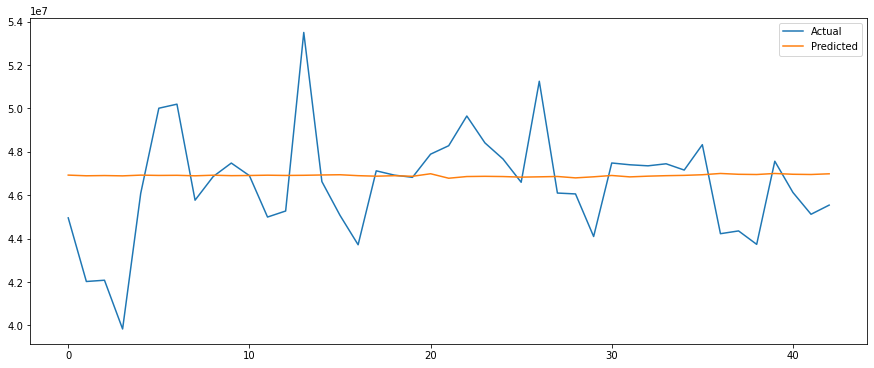

In [227]:
data.groupby('Date').agg({'Actual':np.sum,'Predicted':np.sum}).reset_index()[['Actual','Predicted']].plot()


In [132]:
def get_FI(modelname, dfname):
    importance_list = pd.DataFrame(modelname.feature_importances_, columns=['importance'])
    varnames_list = pd.DataFrame(dfname.columns.tolist(), columns=['feature'])
    feature_importance = pd.concat([varnames_list, importance_list], axis=1)
    feature_importance = feature_importance.reindex(varnames_list.index)
    feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)
    feature_importance['cum_importance'] = feature_importance['importance'].cumsum()
    return feature_importance

In [133]:
get_FI(rfr_best, X_train)

feature    importance  cum_importance
14  Weekly_Sales_median  9.887667e-01        0.988767
10     christmas_minus1  6.642961e-03        0.995410
5             MarkDown3  2.713246e-03        0.998123
13    thanksgiving_week  1.440787e-03        0.999564
8                  Size  2.606776e-04        0.999824
15               Type_B  7.955870e-05        0.999904
7          Unemployment  6.226944e-05        0.999966
1           Temperature  1.766254e-05        0.999984
3             MarkDown1  1.042452e-05        0.999994
6                   CPI  5.580825e-06        1.000000
9        christmas_week  1.781774e-07        1.000000
12     christmas_minus3  0.000000e+00        1.000000
0             IsHoliday  0.000000e+00        1.000000
11     christmas_minus2  0.000000e+00        1.000000
4             MarkDown2  0.000000e+00        1.000000
2            Fuel_Price  0.000000e+00        1.000000
16               Type_C  0.000000e+00        1.000000

## __Arima__

In [84]:
#Taking a example randomly to showcase ARIMA
particular_data = sales_data_2.loc[(sales_data_2['Store'] == '13') & (sales_data_2['Dept'] == '17'), \
                                          ['Date', 'Weekly_Sales']   ]
particular_data['Date'] =  pd.to_datetime(particular_data['Date'])
particular_data.index = particular_data.Date
particular_data = particular_data.drop('Date', axis=1)
particular_data.head()

Weekly_Sales
Date                    
2010-02-05      22419.66
2010-02-12      21524.01
2010-02-19      23997.80
2010-02-26      22936.01
2010-03-05      21831.50

In [85]:
particular_data_train, particular_data_test  = particular_data[particular_data.index <= split_date],  particular_data[particular_data.index > split_date]
print(particular_data_train.shape)
print(particular_data_test.shape)

(100, 1)
(43, 1)


In [251]:
particular_data_2 = sales_data_2.loc[:,['Date', 'Weekly_Sales']   ]
particular_data_2['Date'] =  pd.to_datetime(particular_data_2['Date'])
particular_data_2.index = particular_data_2.Date
particular_data_2 = particular_data_2.drop('Date', axis=1)
particular_data_2.head()

Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-12      46039.49
2010-02-19      41595.55
2010-02-26      19403.54
2010-03-05      21827.90

In [256]:
particular_data_2 = sales_data_2.loc[:,['Date', 'Weekly_Sales']   ]
particular_data_2['Date'] =  pd.to_datetime(particular_data_2['Date'])
particular_data_2.head()

Date  Weekly_Sales
0 2010-02-05      24924.50
1 2010-02-12      46039.49
2 2010-02-19      41595.55
3 2010-02-26      19403.54
4 2010-03-05      21827.90

### _Trend and seasonality plot_

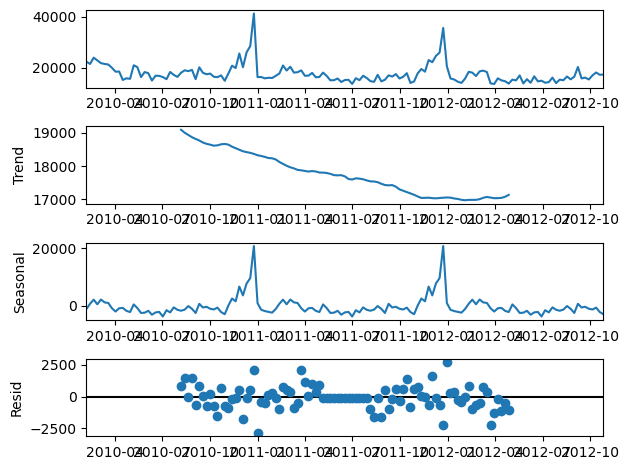

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(particular_data, model='additive')
fig = result.plot()

### _ACF plot_

In [87]:
from pandas.plotting import autocorrelation_plot

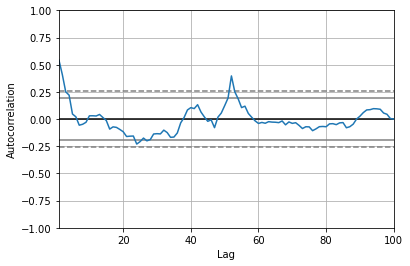

In [88]:
autocorrelation_plot(particular_data_train)
plt.show()

### _Running arima model_

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69094D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   9.691D+00
  F =   9.6909385010175217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                   99
Model:                 ARIMA(0, 1, 0

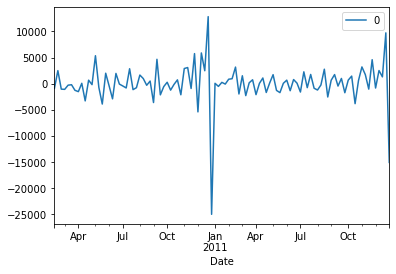

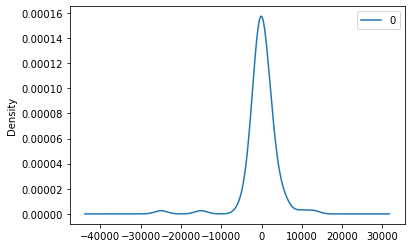

                  0
count  9.900000e+01
mean  -1.286154e-13
std    3.932679e+03
min   -2.496582e+04
25%   -1.112091e+03
50%    5.920929e+01
75%    1.480379e+03
max    1.281118e+04


In [89]:
#Running ARIMA model
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(particular_data_train, order=(0,1,0))
model_fit = model.fit(disp=1)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [114]:
from pmdarima import auto_arima
auto_model = auto_arima(particular_data_train, start_p=1, d=0, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=False,
                           D=None, trace=True,
                           error_action='ignore'
                           )#suppress_warnings=True
auto_model.fit(particular_data_train)
print(auto_model)
test_arima = auto_model.predict(n_periods= len(particular_data_test))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1926.145, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2255.538, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1944.558, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2192.542, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1927.869, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1928.393, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2083.681, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1928.596, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1917.784, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1931.343, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1918.348, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1918.023, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1919.181, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : 

In [243]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -954.030
Date:                Sun, 20 Mar 2022   AIC                           1916.061
Time:                        01:06:08   BIC                           1926.481
Sample:                             0   HQIC                          1920.278
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6443.4690   1592.718      4.046      0.000    3321.798    9565.140
ar.L1          0.4230      0.046      9.142      0.000       0.332       0.514
ar.L2          0.2328      0.073      3.206      0.001       0.090       0.375
sigma2       1.14e+07      0.988   1.15e+07      0.000    1.14e+07    1.14e+07
===================================================================================
Ljung-Box (Q):                       18.14   Jarque-Bera (JB):               370.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.04e+22. Standard errors may be unstable.
"""

In [ ]:
prediction = pd.DataFrame(auto_model.predict(n_periods = 20), index=test.index)
prediction.columns = ['predicted sales']
prediction

In [ ]:
, start_p=0,
D=1, start_Q=0, max_P=5, max_D=5,
max_Q=5, m=12, seasonal=True,
error action='warn', trace = True,
supress warnings=True, stepwise = True,

In [234]:
auto_model_seasonal = auto_arima(particular_data_train, start_p=1, d=0, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, max_Q=3,seasonal=True,
                           D=None, trace=True,
                           error_action='ignore'
                           )
auto_model_seasonal.fit(particular_data_train)
print(auto_model_seasonal)
test_arima = auto_model_seasonal.predict(n_periods= len(particular_data_test))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1917.784, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1951.325, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1918.348, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1931.343, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2255.538, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1918.023, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1919.181, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1923.564, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1916.061, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1918.013, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1920.008, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.615 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept


In [233]:
test_arima

array([23464.96730026, 21166.92577283, 20860.21083459, 20195.44880749,
       19842.84260525, 19538.92119241, 19328.26846158, 19168.40350058,
       19051.73646131, 18965.16657655, 18901.38511106, 18854.250365  ,
       18819.46277641, 18793.77372235, 18774.80801155, 18760.80459437,
       18750.4655551 , 18742.8318681 , 18737.195685  , 18733.03430574,
       18729.96182706, 18727.69331691, 18726.01840311, 18724.7817604 ,
       18723.86870736, 18723.19457097, 18722.69683441, 18722.32933952,
       18722.05800623, 18721.85767215, 18721.70975905, 18721.60055007,
       18721.51991756, 18721.46038399, 18721.41642845, 18721.38397466,
       18721.36001298, 18721.3423213 , 18721.32925897, 18721.31961463,
       18721.3124939 , 18721.30723644, 18721.30335469])

In [134]:
sales_data_train = combined_data_train[['Store', 'Dept', 'Date2', 'Weekly_Sales']]
sales_data_test = combined_data_test[['Store', 'Dept', 'Date2', 'Weekly_Sales']]

In [137]:
sales_data_train.head()
sales_data_train.columns

Index(['Store', 'Dept', 'Date2', 'Weekly_Sales'], dtype='object')

In [ ]:
sales_data_2.head()

In [138]:
#checking the number of records for each store, dept combination
temper = sales_data_train.groupby(['Store', 'Dept'], as_index=False).agg({'Date2': 'count' })
temper = temper.rename(columns= {'Date2' : 'counter'})
temper.head()
temper2 = temper.groupby(['counter'], as_index=False).agg({'Store': 'count' })
temper2.sample(5)

counter  Store
25       26      5
36       37      3
51       53      1
8         9     11
26       27      6

In [139]:
temper.shape

(3292, 3)

In [140]:
from sklearn.metrics import mean_absolute_error

### _Create a function for every store department combination_

In [141]:
def arima_modeler(df_train, df_test):
    """
    Now we will create a function to create these models after hyper-parameter tuning for all the combinations of Store and Dept
    in the data    
    """
    combos_train = df_train.groupby(['Store', 'Dept'], as_index=False).agg({'Date2' : {'min', 'max', 'count'} })
    print(combos_train.shape)
    combos_test = df_test.groupby(['Store', 'Dept'], as_index=False).agg({'Date2' :  'count' })
    combos_test = combos_test[['Store', 'Dept']]
    print(combos_test.shape)
    combos_common = pd.merge(combos_train, combos_test, on = ['Store', 'Dept'])
    print(combos_common.shape)
    combos_common.columns = ["_".join(x) for x in combos_common.columns.ravel()]
    combos_common = combos_common.rename(columns = {'Store_' : 'Store', 'Dept_' : 'Dept'})
    combos_common['total_weeks'] = (combos_common['Date2_max'] - combos_common['Date2_min']).astype('timedelta64[D]')/7 + 1
    combos_common['date_gap'] = combos_common['total_weeks'] - combos_common['Date2_count']
    combos_common_nogap = combos_common.loc[combos_common['date_gap'] ==0 ]
    print(combos_common_nogap.shape)
    combos_common_nogap = combos_common_nogap.loc[combos_common_nogap['Date2_max'] == split_date ]
    combos_common_nogap = combos_common_nogap.loc[combos_common_nogap['Date2_count'] == 100 ]
    combos_common_nogap = combos_common_nogap.sort_values(by=['Store', 'Dept'])
    combos_common_nogap.reset_index(inplace=True)
    print(combos_common_nogap.shape)
    print(combos_common_nogap.head(10))
    
    sales_data_train_nogap = pd.merge(df_train, combos_common_nogap[['Store', 'Dept']], on =  ['Store', 'Dept'] )
    print(sales_data_train_nogap.shape)
    sales_data_test_nogap = pd.merge(df_test, combos_common_nogap[['Store', 'Dept']], on =  ['Store', 'Dept'] )
    print(sales_data_test_nogap.shape)#The remaining data cant be predicted

    sales_data_train_nogap = sales_data_train_nogap.sort_values(by=['Store', 'Dept', 'Date2'])
    sales_data_test_nogap = sales_data_test_nogap.sort_values(by=['Store', 'Dept', 'Date2'])
#     sales_data_test_nogap = sales_data_test_nogap[0:10000]
    
    #creating a DF that will store all the model outputs
    all_scores = pd.DataFrame(columns = ['score'])

    for i in range(len(combos_common_nogap)):#
        print(i)
        store_id = combos_common_nogap.loc[i]['Store']
        dept_id = combos_common_nogap.loc[i]['Dept']    
        print("Now the model for Store " + store_id + " and Dept " + dept_id + " will be created")
        particular_data_train = sales_data_train_nogap.loc[(sales_data_train_nogap['Store'] == store_id) & (sales_data_train_nogap['Dept'] == dept_id), \
                                              ['Date2', 'Weekly_Sales']   ]
        print(particular_data_train.shape)
        particular_data_test = sales_data_test_nogap.loc[(sales_data_test_nogap['Store'] == store_id) & (sales_data_test_nogap['Dept'] == dept_id), \
                                                  ['Date2', 'Weekly_Sales']   ]#, 'Weekly_Sales'
        print(particular_data_test.shape)
        #The date is required as index for ARIMA models
        particular_data_train.index = particular_data_train.Date2
        particular_data_test.index = particular_data_test.Date2

        particular_data_train = particular_data_train.drop('Date2', axis=1)
        particular_data_test = particular_data_test.drop('Date2', axis=1)
        
        #Hyper Parameter tuning
        auto_model = auto_arima(particular_data_train, start_p=1, d=0, start_q=1,max_p=3, max_q=3, start_P=0, trace=True)
        auto_model.fit(particular_data_train)
        print(auto_model)
        test_arima = auto_model.predict(n_periods=len(particular_data_test))
        test_arima_df  = pd.DataFrame(test_arima, columns = ['score'] )
        #appending the new scores along with the scores already obtained
        all_scores = pd.concat([all_scores, test_arima_df], axis=0)
        all_scores = all_scores.reset_index()
        all_scores = all_scores.drop(['index'], axis=1)
        print(mean_absolute_error(particular_data_test, test_arima))
    
    #getting the model scores and actuals in one file for comparison
    sales_data_test2 = sales_data_test_nogap.reset_index()
    sales_data_test2 = sales_data_test2.drop(['index'], axis=1)
    print(sales_data_test2.head())
    test_data_scored = pd.concat([sales_data_test2, all_scores], axis=1)
    return test_data_scored

In [142]:
partialtest_scored_arima = arima_modeler(sales_data_train, sales_data_test)

(3292, 5)
(3196, 2)
(3165, 5)
(2704, 7)
(2654, 8)
   index Store Dept  Date2_count  Date2_max  Date2_min  total_weeks  date_gap
0      0     1    1          100 2011-12-30 2010-02-05        100.0       0.0
1      1     1   10          100 2011-12-30 2010-02-05        100.0       0.0
2      2     1   11          100 2011-12-30 2010-02-05        100.0       0.0
3      3     1   12          100 2011-12-30 2010-02-05        100.0       0.0
4      4     1   13          100 2011-12-30 2010-02-05        100.0       0.0
5      5     1   14          100 2011-12-30 2010-02-05        100.0       0.0
6      6     1   16          100 2011-12-30 2010-02-05        100.0       0.0
7      7     1   17          100 2011-12-30 2010-02-05        100.0       0.0
8      9     1   19          100 2011-12-30 2010-02-05        100.0       0.0
9     10     1    2          100 2011-12-30 2010-02-05        100.0       0.0
(265400, 4)
(114020, 4)
0
Now the model for Store 1 and Dept 1 will be created
(100, 2)
(43,

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1432.549, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1434.437, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1436.443, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.620 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
324.990622447586
9
Now the model for Store 1 and Dept 2 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1929.759, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1926.856, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1927.540, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1927.776, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2433.251, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.071 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
2249.84735116279
10
Now the model for Store 1 and Dept 20

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1266.929, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1268.857, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1263.676, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1269.229, Time=0.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1266.469, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1270.849, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1265.960, Time=0.14 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 2.096 seconds
 ARIMA(3,0,2)(0,0,0)[0] intercept
274.0509899964189
19
Now the model for Store 1 and Dept 29 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1740.954, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1780.757, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1739.545, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1754.599, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]     

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1459.703, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1876.242, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1454.512, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1456.386, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1456.504, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1458.359, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.299 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
309.6785532923567
29
Now the model for Store 1 and Dept 38 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2188.538, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2194.301, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2186.650, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2187.951, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]          

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2144.423, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2146.329, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2153.386, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.406 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
6252.601609028933
38
Now the model for Store 1 and Dept 52 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1573.210, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1594.516, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1574.794, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1582.708, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1860.174, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1572.848, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1570.942, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1572.733, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] inte

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1643.284, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1667.201, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.334 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
761.5792960440849
48
Now the model for Store 1 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2322.653, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2322.314, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2321.414, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2322.016, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2468.916, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2322.354, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2323.881, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2364.333, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.153 seconds
 ARIMA(1,0,0)(0,0

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2046.000, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2044.523, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2349.253, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.146 seconds
 ARIMA(1,0,1)(0,0,0)[0]          
5688.0665658664875
58
Now the model for Store 1 and Dept 9 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2064.052, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2094.731, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2062.624, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2072.242, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2338.465, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2064.082, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : 

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2272.390, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2315.115, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2275.948, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2275.207, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2445.095, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2272.981, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2273.847, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2272.963, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2270.935, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2272.890, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2274.902, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2295.284, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.300 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
14252.23969898313
68
Now the model fo

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1528.989, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.413 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
422.97705556724725
76
Now the model for Store 10 and Dept 2 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2094.364, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2094.133, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2092.459, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2093.289, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2609.837, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2093.217, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2095.107, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.182 seconds
 ARIMA(1,0,0)(0,0,0)[0] in

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1403.486, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1548.253, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1405.932, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1480.714, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1751.012, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1404.715, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1404.397, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1453.760, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1402.791, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1404.645, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1406.542, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.655 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
747.995776313897
86
Now the model for Store 10 and Dept 29 will be created
(100, 2)
(43, 2)
Performing

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1736.839, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.291 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1980.0626625110501
94
Now the model for Store 10 and Dept 36 will be created
(100, 2)
(42, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1696.729, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1876.512, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1694.959, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1789.160, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1973.221, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1696.712, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1698.738, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1695.919, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.219 seconds
 ARIMA(1,0,0)(0,0,0)

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1665.702, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1658.761, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1650.058, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1648.822, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.600 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
1408.9483944050662
104
Now the model for Store 10 and Dept 49 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1855.343, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1875.774, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1859.479, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1866.494, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2262.901, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1853.884, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1853.236, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] i

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2084.211, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.129 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3981.6292025649095
113
Now the model for Store 10 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1958.897, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2004.783, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1966.367, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1955.084, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2204.011, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1955.811, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1957.436, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2096.765, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.235 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
3639.0913867561667
114
Now the model for Store

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2121.810, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2159.595, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2119.781, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2129.891, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2325.044, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2121.745, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2123.810, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2139.147, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.145 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2696.7485908592384
123
Now the model for Store 10 and Dept 83 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1182.289, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1261.076, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(1,0,0)(0,0,0)[0] intercept
3739.279344008415
132
Now the model for Store 10 and Dept 96 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1665.847, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1713.694, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1668.603, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1686.602, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2138.632, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1667.600, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1664.953, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1671.582, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1665.916, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1666.649, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1673.661, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1665.640, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             :

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1831.139, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1867.474, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1829.413, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1841.145, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2191.462, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1830.791, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1832.768, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1853.177, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.201 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1678.9845955891337
142
Now the model for Store 11 and Dept 2 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1964.631, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1983.622, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1964.124, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] in

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1342.947, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1397.772, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1670.302, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1343.743, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1344.388, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1351.957, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.557 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
254.76355754771387
152
Now the model for Store 11 and Dept 29 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1839.747, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1867.081, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1837.584, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1845.684, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2123.808, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1475.793, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1477.731, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.359 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
461.3327028369839
162
Now the model for Store 11 and Dept 38 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2089.930, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2088.797, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2087.904, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2087.862, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2530.537, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2090.846, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2093.383, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2463.902, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1606.111, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1852.896, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1563.308, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1563.643, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1598.697, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1571.538, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1562.451, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1565.280, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.948 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
361.38374377430506
172
Now the model for Store 11 and Dept 55 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2037.142, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2069.709, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2037.779, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2357.876, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2400.884, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.141 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
11299.142519139243
181
Now the model for Store 11 and Dept 74 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1882.678, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1909.330, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1882.048, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1892.005, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2299.060, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1880.922, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1882.645, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1882.947, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1884.101, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]  

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1935.983, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1937.899, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1937.963, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1939.901, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.347 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3183.742060026992
191
Now the model for Store 11 and Dept 90 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1920.489, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1932.598, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1920.370, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1924.612, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2444.501, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1920.643, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] interce

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1805.739, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2244.013, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1774.709, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1775.088, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1803.622, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1777.383, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1772.717, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1771.569, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1770.100, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1768.489, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.641 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
2591.1439423364723
202
Now the model for Store 12 and Dept 11 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] interc

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1933.909, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.358 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
5681.690093631332
210
Now the model for Store 12 and Dept 20 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1656.509, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1713.524, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1659.824, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1684.347, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2042.574, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1656.939, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1658.410, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1671.636, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1655.407, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1655.742, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] in

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1789.902, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1790.365, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1803.353, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1790.233, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1791.312, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.468 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
1072.4969208528423
220
Now the model for Store 12 and Dept 3 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2081.165, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2190.774, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2099.431, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2108.710, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2282.754, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] interce

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1773.484, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1770.112, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2322.991, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1771.191, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1773.511, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2200.236, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.346 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
1542.3839175247567
230
Now the model for Store 12 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1835.379, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1931.949, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1843.265, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1888.575, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2439.289, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] i

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1735.494, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1537.111, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1537.101, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1582.769, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1535.926, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1530.190, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1531.595, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1529.624, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1531.003, Time=0.05 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1531.323, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1531.223, Time=0.10 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 1.548 seconds
 ARIMA(2,0,3)(0,0,0)[0] intercept
815.6282394243331
239
Now the model for Store 12 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] in

Now the model for Store 12 and Dept 8 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1804.423, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1821.033, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1805.911, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1811.676, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2415.459, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1804.827, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1804.738, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1808.669, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1803.689, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1803.186, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1805.182, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.661 seconds
 ARIMA(3,0,0)(0,0,0)[0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1576.892, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1578.004, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.670 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
770.9506484897139
257
Now the model for Store 12 and Dept 92 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1812.699, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1839.899, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1812.748, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1823.595, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2303.237, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1814.333, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1814.645, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1815.014, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1812.842, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0] in

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1636.116, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1634.658, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1665.620, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1635.105, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1632.844, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1655.678, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1637.360, Time=0.08 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 1.008 seconds
 ARIMA(1,0,3)(0,0,0)[0] intercept
932.1516811396003
266
Now the model for Store 13 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1873.962, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1889.794, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1875.401, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] interce

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1982.011, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1982.751, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1977.178, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1978.729, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1980.615, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1993.062, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.274 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2604.3526465644263
275
Now the model for Store 13 and Dept 23 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2119.095, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2145.558, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2117.620, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2126.970, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2363.620, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] i

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1580.199, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1568.466, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1570.374, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1572.387, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.366 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
517.7085291963369
284
Now the model for Store 13 and Dept 31 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1772.198, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1821.060, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1771.548, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1782.445, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1968.881, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1771.819, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] interce

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1879.606, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1878.765, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1879.925, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1881.285, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.342 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3330.738695007081
293
Now the model for Store 13 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1916.352, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1946.432, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1918.731, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1931.462, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2535.008, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1914.223, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] interce

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1562.557, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.289 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
474.30288066295526
302
Now the model for Store 13 and Dept 52 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1688.059, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1710.652, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1692.219, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1701.779, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1989.998, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1680.621, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1678.930, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1680.668, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1682.116, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1839.641, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1845.133, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2130.307, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1837.943, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1840.890, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1839.993, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1841.911, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.380 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1409.6979521373594
312
Now the model for Store 13 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2379.971, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2386.090, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2381.037, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] interc

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1822.177, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1814.444, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1838.312, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1815.924, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1817.312, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1838.979, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1815.627, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.116 seconds
 ARIMA(1,0,2)(0,0,0)[0] intercept
2184.4353055216216
322
Now the model for Store 13 and Dept 9 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2100.025, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2224.453, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2103.775, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] interce

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1706.121, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1706.443, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1705.805, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1706.729, Time=0.05 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1709.935, Time=0.13 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.100 seconds
 ARIMA(2,0,2)(0,0,0)[0] intercept
1220.5496943341948
330
Now the model for Store 13 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1844.710, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1880.830, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1851.092, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1866.979, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2327.664, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] interc

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2151.359, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2147.468, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2149.442, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2149.461, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2355.692, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2150.919, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.270 seconds
 ARIMA(1,0,0)(0,0,0)[0]          
25601.34493931104
339
Now the model for Store 14 and Dept 17 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1965.779, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1981.226, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1967.523, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1973.577, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2310.319, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] in

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1657.016, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1657.453, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1659.945, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1655.021, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1657.010, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1659.016, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1666.589, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.365 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
719.7380466100236
349
Now the model for Store 14 and Dept 28 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1420.051, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1536.679, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1421.483, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1482.456, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]   

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1758.802, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1885.329, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1758.055, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1807.755, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1968.445, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1759.059, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1760.702, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1760.862, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.255 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2047.852067176766
359
Now the model for Store 14 and Dept 38 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2101.688, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2098.499, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1539.044, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1550.834, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.404 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
405.7696387058776
369
Now the model for Store 14 and Dept 52 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1582.180, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1629.532, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1587.453, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1607.017, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1853.895, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1582.178, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1580.033, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1582.186, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1584.005, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]   

 ARIMA(2,0,0)(0,0,0)[0] intercept
2276.0584540123546
379
Now the model for Store 14 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2480.244, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2486.167, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2480.977, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2483.106, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2622.108, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2480.701, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2482.021, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2483.789, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2480.121, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2478.785, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2480.024, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2490.252, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1841.800, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1867.659, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1847.533, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1856.754, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2239.365, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1840.536, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1839.312, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1840.403, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1842.319, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2042.9052806762297
389
Now the model for Store 14 and Dept 9 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1975.306, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] interce

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2069.711, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2065.312, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2230.137, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2065.373, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2067.015, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2162.413, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.132 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
4521.62855546364
399
Now the model for Store 15 and Dept 10 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1804.782, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1843.103, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1802.991, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1813.367, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2162.471, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] int

 ARIMA(1,0,0)(0,0,0)[0] intercept
2455.6286655172503
408
Now the model for Store 15 and Dept 20 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1593.433, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1608.736, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1595.371, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1600.153, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1970.804, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1593.310, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1592.519, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1591.267, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1593.160, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.523 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
598.3937494320878
409
Now the model for Store 15 and Dept 21 w

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1978.238, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2175.700, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1914.891, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1912.854, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1914.859, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1916.887, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1922.657, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.291 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
5272.106761294555
419
Now the model for Store 15 and Dept 30 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1544.883, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1605.894, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1551.448, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1578.953, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]   

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1801.027, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1799.687, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1800.672, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2353.943, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1798.857, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1800.679, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1800.677, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1802.559, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.580 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1130.8531797811331
429
Now the model for Store 15 and Dept 41 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1600.750, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1670.512, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1988.017, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1990.280, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.304 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
4638.641151956529
438
Now the model for Store 15 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1467.272, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1528.194, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1465.328, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1483.842, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1581.959, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1467.290, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1469.282, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1471.923, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.283 seconds
 ARIMA(1,0,0)(0

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1237.177, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1321.769, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1246.734, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1286.346, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1500.571, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1237.311, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1237.963, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1261.609, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1235.295, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1237.312, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1239.295, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1241.109, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.744 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
175.96566683345688
450
Now the model for Store

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1547.247, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1548.365, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1558.623, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.250 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1205.708730429539
459
Now the model for Store 15 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1519.783, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1594.490, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1518.388, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1538.515, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1832.454, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1519.999, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1522.314, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1531.334, Time=0.01 sec

Best model:  ARIMA(1,0,0)

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1773.303, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1758.206, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1756.926, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1757.646, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1755.181, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1762.900, Time=0.04 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1753.605, Time=0.24 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1754.134, Time=0.19 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0] intercept
Total fit time: 1.155 seconds
 ARIMA(3,0,3)(0,0,0)[0] intercept
5139.091706597144
468
Now the model for Store 16 and Dept 19 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1450.444, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1515.864, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1449.503, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] in

 ARIMA(1,0,1)(0,0,0)[0] intercept
726.6891813295424
477
Now the model for Store 16 and Dept 27 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1379.167, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1393.342, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1378.213, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1382.998, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1621.659, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1378.350, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1380.369, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1410.272, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.215 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
114.63346845528828
478
Now the model for Store 16 and Dept 28 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1234.570, 

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1383.254, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1384.562, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1384.484, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1385.619, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1382.933, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1393.579, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1384.867, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1393.636, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1380.750, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1385.790, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1384.110, Time=0.15 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 1.824 seconds
 ARIMA(2,0,3)(0,0,0)[0] intercept
468.0574279347254
487
Now the model for Store 16 and Dept 36 will be created
(100, 2)
(43, 2)
Performi

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1484.701, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1516.148, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1495.626, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1505.210, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1783.103, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1487.945, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1489.734, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1495.106, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1486.091, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1486.050, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1488.560, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.583 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
516.6746190401609
497
Now the model for Store 16 and Dept 55 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] in

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1734.285, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1729.372, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1728.821, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1730.833, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.407 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
1527.5327768942427
506
Now the model for Store 16 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1486.026, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1613.192, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1484.476, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1550.555, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1935.633, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1485.656, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] interc

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1169.312, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1220.100, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1167.797, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1186.301, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1294.238, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1169.294, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1171.294, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1177.740, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.363 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
62.0249226740137
516
Now the model for Store 16 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1414.990, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1524.558, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1413.361, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] int

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1833.021, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1835.042, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.271 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2107.0099605782393
525
Now the model for Store 17 and Dept 19 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1817.277, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1832.713, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1815.266, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1816.985, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1997.884, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1817.210, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1819.255, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1842.810, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0

 ARIMA(2,0,0)(0,0,0)[0] intercept
251.21701871165072
535
Now the model for Store 17 and Dept 28 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1431.485, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1510.800, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1440.333, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1474.510, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1740.451, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1433.212, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1434.077, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1451.696, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1431.394, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1433.100, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1435.108, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1438.526, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1530.708, Time=0.14 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.141 seconds
 ARIMA(1,0,2)(0,0,0)[0] intercept
332.7087458711614
544
Now the model for Store 17 and Dept 36 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1724.848, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1797.867, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1722.906, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1752.054, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1877.918, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1724.809, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1726.848, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1729.449, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.163 seconds
 ARIMA(1,0,0)(0,0,0)

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1999.605, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2003.887, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.269 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
5293.18371867375
554
Now the model for Store 17 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1360.162, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1430.317, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1361.214, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1390.111, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1620.750, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1362.261, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1362.375, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1372.724, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1360.293, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] int

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1300.076, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1300.003, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1314.159, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.197, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1301.556, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1305.425, Time=0.08 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.099 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
166.57355838980206
565
Now the model for Store 17 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1810.913, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1837.252, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1811.768, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1822.683, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2168.601, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] i

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1771.481, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.787 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
3015.4041622046243
573
Now the model for Store 17 and Dept 92 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2129.371, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2136.272, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2128.750, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2131.472, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2450.624, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2128.925, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2130.653, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2170.052, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.253 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
13507.126496372308
574
Now the model for Store

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2049.360, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2065.796, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.298 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
4904.128674953518
583
Now the model for Store 18 and Dept 16 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2025.751, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2186.127, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2024.142, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2106.822, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2273.570, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2025.867, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2027.139, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2025.273, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.235 seconds
 ARIMA(1,0,0)(0

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1881.956, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1883.972, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1915.234, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.171 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2153.4027575094733
593
Now the model for Store 18 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1876.206, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1892.436, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1876.442, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1880.898, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2157.217, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1877.558, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1878.230, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1880.290, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1947.534, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1998.338, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1953.189, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1977.483, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2281.048, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1948.395, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1948.476, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1960.648, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1947.434, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1948.373, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1949.894, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1958.447, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.493 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3315.014528888601
603
Now the model for Store 18 and Dept 35 will be created
(100, 2)
(43, 2)
Per

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1995.940, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2015.998, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.207 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3680.7239591024295
612
Now the model for Store 18 and Dept 49 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1864.006, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1886.480, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1865.063, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1873.095, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2152.195, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1863.907, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1862.200, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1861.448, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1863.114, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]  

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1895.015, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1930.550, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1895.178, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1897.641, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2114.253, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1895.733, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1896.763, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1894.607, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1896.828, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1898.088, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1982.029, Time=0.07 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.550 seconds
 ARIMA(0,0,2)(0,0,0)[0] intercept
2687.18435442994
621
Now the model for Store 18 and Dept 7 will be created
(100, 2)
(43, 2)
Performing 

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1606.518, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1608.531, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1631.858, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.370 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
399.250464349327
630
Now the model for Store 18 and Dept 87 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1871.860, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1882.334, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1872.266, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1875.820, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2247.441, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1872.909, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1872.649, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1875.758, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] int

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1658.628, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1779.232, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1658.488, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1708.054, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2046.497, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1659.851, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1665.327, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.495 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
841.3415705139671
640
Now the model for Store 19 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1859.574, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1922.767, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1862.796, Ti


Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.130 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1479.8121013306309
650
Now the model for Store 19 and Dept 25 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1855.261, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1895.974, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1853.163, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1869.039, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2192.095, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1855.149, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1855.157, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1875.392, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.270 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2341.5210829622974
651
Now the model for Store 19 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwi

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1830.087, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1855.293, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.271 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1514.1020478943478
660
Now the model for Store 19 and Dept 34 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1909.976, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1937.140, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1909.438, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1920.073, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2242.746, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1910.212, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1911.662, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1937.276, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.186 seconds
 ARIMA(1,0,0)(

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1711.015, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1711.041, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1713.041, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.272 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
866.0313343703715
670
Now the model for Store 19 and Dept 46 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1939.412, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1955.237, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1938.053, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1937.891, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2276.095, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1939.537, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1941.370, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]        

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1315.011, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1559.006, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1311.316, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1311.222, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1313.187, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1313.783, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1338.878, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.489 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
94.92290873906785
680
Now the model for Store 19 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1988.349, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2017.756, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1993.627, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1986.038, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]   

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2185.390, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2199.774, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.135 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3846.1516067440925
690
Now the model for Store 19 and Dept 83 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1681.614, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1701.204, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1679.609, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1683.239, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1970.731, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1681.619, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1683.604, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1708.902, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.223 seconds
 ARIMA(1,0,0)(

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1948.009, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1943.972, Time=0.14 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 1.582 seconds
 ARIMA(3,0,2)(0,0,0)[0]          
3749.6631845489997
699
Now the model for Store 19 and Dept 95 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2099.137, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2119.799, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2098.121, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2105.075, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2586.814, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2099.392, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2100.867, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2197.044, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2359.623, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2065.381, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2065.471, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2179.586, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2063.347, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2065.359, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2067.351, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2063.309, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2067.078, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2065.297, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2065.340, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2063.783, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2067.317, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.447 seconds

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1908.213, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1918.339, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1906.844, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1911.073, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2224.157, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1906.920, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1908.618, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1945.051, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.207 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2186.0226994139316
719
Now the model for Store 2 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1854.958, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1889.019, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1894.209, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1908.202, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.258 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
2251.1465847480595
728
Now the model for Store 2 and Dept 34 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1884.909, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1925.391, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1885.851, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1905.038, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2246.529, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1876.863, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1880.632, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1878.408, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1878.390, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] in

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1705.183, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1707.179, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1719.371, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.183 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1304.345237166692
738
Now the model for Store 2 and Dept 46 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2044.451, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2089.125, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2043.029, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2053.446, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2354.841, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2044.202, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2046.317, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2062.388, Time=0.01 sec

Best model:  ARIMA(1,0,0)(

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1996.297, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2020.624, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.128 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2877.7483085568538
747
Now the model for Store 2 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1975.913, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2011.763, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1983.870, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1971.007, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2187.444, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1973.249, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1974.866, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2089.933, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.230 seconds
 ARIMA(0,0,1)(0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1642.199, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1666.062, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.285 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
719.8290389064924
758
Now the model for Store 2 and Dept 85 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1667.490, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1702.839, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1665.508, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1674.329, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1951.849, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1667.504, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1669.674, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1689.033, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.210 seconds
 ARIMA(1,0,0)(0,

 ARIMA(1,0,0)(0,0,0)[0] intercept
4399.189760618538
768
Now the model for Store 2 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1897.247, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1895.641, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1896.337, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1895.643, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2408.001, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.070 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
2111.927690697671
769
Now the model for Store 2 and Dept 98 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1848.713, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1859.945, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1846.666, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1848.392, Tim

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2006.031, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1974.819, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1988.768, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2263.802, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1973.141, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1971.104, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1973.106, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1975.127, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.386 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3074.146356293477
778
Now the model for Store 20 and Dept 2 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2071.644, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2069.800, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1398.745, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1680.002, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1351.154, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1350.850, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1351.139, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1348.801, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1348.194, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1369.348, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1349.174, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1353.584, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1350.846, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1359.750, Time=0.05 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.347 seconds
 ARIMA(1,0,2)(0,0,0)[0] intercept
266.2503435581383
788
Now the model for Store 20 and Dept 29 will be created
(100, 2)
(43, 2)
Per

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1527.536, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1946.630, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1508.372, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1508.723, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1517.948, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1507.158, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1508.401, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1510.188, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.505 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
304.9992328774792
798
Now the model for Store 20 and Dept 38 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2095.364, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2095.072, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1568.852, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1566.870, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1569.941, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1570.795, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.694 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
556.6658641346127
808
Now the model for Store 20 and Dept 52 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1631.222, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1682.318, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1629.849, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1650.242, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1918.011, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1630.715, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] interce

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1850.413, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1895.615, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1851.116, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1871.629, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2112.767, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1849.339, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1848.772, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1851.039, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.902 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3332.4502502512214
818
Now the model for Store 20 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2468.100, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept  

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2111.699, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2117.800, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2109.882, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2111.603, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2415.506, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2111.800, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2113.606, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2150.263, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.138 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
11033.488596351026
828
Now the model for Store 20 and Dept 9 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2135.283, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2171.023, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2002.059, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2004.005, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2004.802, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2005.997, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2092.308, Time=0.07 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.295 seconds
 ARIMA(0,0,2)(0,0,0)[0] intercept
3856.685438442623
838
Now the model for Store 21 and Dept 10 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1762.964, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1827.948, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1768.968, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1796.133, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2210.126, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1762.823, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] in

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1643.971, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1684.743, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1647.562, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1663.462, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2011.758, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1643.201, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1641.629, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1641.417, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1643.243, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.306 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
712.9308368569373
848
Now the model for Store 21 and Dept 21 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1531.127, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] interce

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2032.046, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2045.762, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2036.017, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2032.307, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2037.076, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.472 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
7227.420577644584
858
Now the model for Store 21 and Dept 30 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1594.519, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1632.042, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1593.976, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1605.541, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1980.163, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1594.968, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] in

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1796.513, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1821.914, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1796.173, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1804.642, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1929.352, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1796.185, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1798.051, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1815.238, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.205 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1628.9264031049656
869
Now the model for Store 21 and Dept 42 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1565.370, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1577.022, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1564.454, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] i

507.90719079978675
878
Now the model for Store 21 and Dept 6 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1890.379, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1889.669, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1888.492, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1888.932, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2010.905, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1890.400, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1892.317, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1928.083, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.132 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2342.373266261444
879
Now the model for Store 21 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1839.675, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1160.365, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1250.549, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1166.369, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1206.731, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1398.743, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1161.722, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1161.700, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1181.204, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1163.078, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1163.684, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1163.400, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.775 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
84.1211025003379
889
Now the model for Store 21 and Dept 85 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] int

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1429.077, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1432.881, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1429.663, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1429.915, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.068 seconds
 ARIMA(1,0,2)(0,0,0)[0] intercept
166.9818494077862
898
Now the model for Store 22 and Dept 1 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2179.654, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2214.488, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2181.901, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2181.326, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2327.568, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2180.210, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercep

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2018.603, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.346 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2894.7650425901766
907
Now the model for Store 22 and Dept 20 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1670.813, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1698.156, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1674.187, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1684.213, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2049.883, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1670.971, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1671.186, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1677.402, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1669.769, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] interc

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1797.250, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1795.669, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.231 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
791.4643306815047
917
Now the model for Store 22 and Dept 3 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2004.406, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2135.845, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2006.326, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2080.894, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2228.510, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2003.310, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2001.954, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1999.716, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercep

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1870.809, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.401 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2490.344144432086
927
Now the model for Store 22 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1909.912, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1905.931, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1907.933, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1907.942, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2463.712, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.078 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
3054.8868488372
928
Now the model for Store 22 and Dept 41 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1540.13

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1758.528, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1757.101, Time=0.14 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.017 seconds
 ARIMA(2,0,2)(0,0,0)[0] intercept
1667.4749247139193
936
Now the model for Store 22 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1779.526, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1833.009, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1777.556, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1796.757, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1852.123, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1779.538, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1781.588, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1779.895, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.181 seconds
 ARIMA(1,0,0)(

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1392.699, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1487.648, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1407.855, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1445.647, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1740.220, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1394.630, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1394.605, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1432.861, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1399.940, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1396.738, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1396.282, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.680 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
220.3825001748293
947
Now the model for Store 22 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] in

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2024.609, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2041.018, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2029.095, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2035.298, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2453.120, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2020.755, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2019.796, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2020.828, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2022.365, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.325 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
4175.938670059792
956
Now the model for Store 22 and Dept 93 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   :

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2160.848, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2199.654, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2159.818, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2175.184, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2387.743, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2160.795, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2162.711, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2180.298, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.134 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3760.377786183921
965
Now the model for Store 23 and Dept 16 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2107.836, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2295.099, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1907.323, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1962.900, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1905.333, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1926.909, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2236.927, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1907.222, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1909.195, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1922.833, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.171 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2428.0190382404853
975
Now the model for Store 23 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1911.953, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1953.189, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1938.565, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1964.819, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2318.311, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1936.698, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1936.321, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1957.678, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1935.928, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1939.244, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.510 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
4484.432812521178
985
Now the model for Store 23 and Dept 35 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1695.502, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1741.159, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1912.094, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1956.494, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1913.616, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1930.465, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2311.127, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1912.941, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1913.680, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1924.642, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1911.160, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1912.056, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1910.961, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1912.337, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1911.905, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1920.941, Time=0.07 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 0.650 seconds

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2007.659, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2012.892, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2007.435, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2009.658, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2130.081, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2007.012, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2007.816, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2008.507, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2009.544, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2025.536, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.194 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3618.85038122734
1003
Now the model for Store 23 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1966.982, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] in

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1810.555, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1871.427, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1819.116, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1819.131, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2031.191, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1806.451, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1804.434, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1806.432, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1808.445, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1834.508, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.363 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1665.7369500467219
1013
Now the model for Store 23 and Dept 87 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] interc

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1701.437, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.406 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1776.3813049949263
1021
Now the model for Store 24 and Dept 1 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2118.573, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2143.874, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2121.862, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2116.652, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2285.564, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2117.702, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2119.277, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2219.769, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.149 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
5605.44546448667
1022
Now the model for Store 

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1658.420, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1660.172, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1661.844, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.359 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1025.7002059160475
1031
Now the model for Store 24 and Dept 21 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1697.396, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1705.959, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1695.475, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1698.319, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2037.289, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1697.010, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1698.880, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]      

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1961.149, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1965.387, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.142 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
5273.571293447297
1041
Now the model for Store 24 and Dept 30 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1589.337, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1709.745, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1594.105, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1648.479, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1977.218, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1590.938, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1589.748, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1628.861, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1592.112, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] i

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1846.821, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.539 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
2660.8127468676003
1051
Now the model for Store 24 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1863.775, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1860.557, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1861.880, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1862.018, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2426.537, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.070 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
3022.7278302325517
1052
Now the model for Store 24 and Dept 41 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1851.198, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2013.878, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1849.325, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1932.495, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2067.590, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1851.123, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1853.180, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1849.565, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.346 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3559.915656604243
1062
Now the model for Store 24 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1674.835, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1723.772, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1858.425, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.164 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1757.1969861461446
1072
Now the model for Store 24 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1805.960, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1824.350, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1805.205, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1811.448, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2308.505, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1806.474, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1807.522, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.198 seconds
 ARIMA(1,0,0)(0,0,0)[0]

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2015.463, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2012.149, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2010.871, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2013.775, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2009.340, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2009.089, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2010.530, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2012.157, Time=0.13 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 1.032 seconds
 ARIMA(2,0,3)(0,0,0)[0] intercept
5847.467158451127
1083
Now the model for Store 24 and Dept 95 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2110.643, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2160.908, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2110.577, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] i

1140.9116379485042
1092
Now the model for Store 25 and Dept 14 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1990.149, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2028.425, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1991.126, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2007.101, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2188.224, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1991.698, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1994.269, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1996.879, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1990.223, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1991.383, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1994.327, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.311 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
3545.335487422726
1093
N

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1741.670, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2065.148, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1730.115, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1731.949, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1751.349, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.221 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
857.6637809853627
1102
Now the model for Store 25 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1666.563, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1698.672, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1669.515, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1682.333, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1948.310, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1664.966, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] i

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1821.572, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1834.984, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1819.669, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1821.393, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1823.353, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1828.617, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.343 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2364.9593994991997
1112
Now the model for Store 25 and Dept 35 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1543.065, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1578.477, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1542.760, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1557.101, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1840.235, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] 

2154.524892769411
1122
Now the model for Store 25 and Dept 49 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1800.745, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1811.290, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1799.577, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1802.904, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2153.742, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1800.343, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1802.260, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1836.737, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.177 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1413.5411702707447
1123
Now the model for Store 25 and Dept 5 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2113.122, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1637.425, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1675.711, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.158 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
569.8202803450855
1132
Now the model for Store 25 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2317.044, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2320.049, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2316.709, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2318.217, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2447.423, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2316.601, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2316.809, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2317.869, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2318.243, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1962.039, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1974.312, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.146 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
4357.586220664443
1142
Now the model for Store 25 and Dept 90 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1658.048, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1701.497, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1657.491, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1666.588, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2160.328, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1658.805, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1659.526, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.350 seconds
 ARIMA(1,0,0)(0,0,0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1582.060, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1582.354, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1628.886, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1580.701, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1582.942, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1581.930, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.422 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
1379.9287557192893
1152
Now the model for Store 26 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1740.028, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1778.897, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1747.510, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1761.317, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2277.227, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] 

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1769.946, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1785.951, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.236 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1157.0305595345044
1161
Now the model for Store 26 and Dept 23 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1946.061, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1972.746, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1944.366, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1953.927, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2199.512, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1945.653, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1947.482, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1970.281, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.153 seconds
 ARIMA(1,0,0)

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1827.187, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1835.348, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1825.166, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1826.852, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1986.364, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1827.171, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1829.198, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1857.748, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.141 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
946.5123257860097
1172
Now the model for Store 26 and Dept 33 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1687.104, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1710.637, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1645.666, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1947.242, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1627.158, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1626.790, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1637.950, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1625.381, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1626.901, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1628.913, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.405 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
653.9127566044203
1182
Now the model for Store 26 and Dept 46 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1801.140, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1834.484, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1834.949, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1833.580, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2062.423, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1834.137, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1833.780, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1832.250, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1833.685, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1835.699, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1924.383, Time=0.05 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.478 seconds
 ARIMA(0,0,2)(0,0,0)[0] intercept
1869.8374783495512
1191
Now the model for Store 26 and Dept 7 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2135.003, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2180.783, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] i

 ARIMA(1,0,0)(0,0,0)[0] intercept
1818.0495081005827
1200
Now the model for Store 26 and Dept 83 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1618.467, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1659.108, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1620.820, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1637.267, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1897.307, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1618.705, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1619.653, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1624.296, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1616.674, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1618.673, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1620.695, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1628.206, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0

 ARIMA(2,0,0)(0,0,0)[0] intercept
7609.573741980678
1210
Now the model for Store 26 and Dept 96 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1900.482, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1986.299, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1898.493, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1932.334, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2254.792, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1900.479, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1902.106, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1911.035, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.206 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
4718.437098997202
1211
Now the model for Store 26 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1838.507,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2133.532, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2131.423, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.155 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
15692.47598909035
1220
Now the model for Store 27 and Dept 17 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1924.183, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1944.100, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1925.603, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1932.795, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2265.439, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1925.058, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1925.502, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1929.609, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1923.730, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] i

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1831.434, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1862.415, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1829.460, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1840.429, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2187.297, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1831.323, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1833.228, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1853.771, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.160 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1845.5442661969857
1229
Now the model for Store 27 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1857.436, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1891.779, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1932.172, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2007.151, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1934.064, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1974.827, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2271.703, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1933.983, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1934.034, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1946.595, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1932.862, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1937.745, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.404 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
3732.748204464912
1239
Now the model for Store 27 and Dept 35 will be created
(100, 2)
(43, 2)
Performing st

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2019.483, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2044.606, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2020.176, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2028.023, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2395.984, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2020.985, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2021.579, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2026.491, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2019.945, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2021.856, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2026.991, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.465 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
5255.263844332392
1249
Now the model for Store 27 and Dept 49 will be created
(100, 2)
(43, 2)
Performi

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2016.838, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2015.303, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2014.937, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2015.245, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2140.311, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2016.799, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2018.728, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2056.575, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.125 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
4320.8777823605315
1258
Now the model for Store 27 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1997.457, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2023.383, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2175.106, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2193.216, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.115 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3488.8395170530757
1268
Now the model for Store 27 and Dept 83 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1785.064, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1807.974, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1784.924, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1792.086, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2120.201, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1784.301, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1785.161, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1786.214, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1787.208, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] 

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2157.960, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.263 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
8719.354344704587
1278
Now the model for Store 27 and Dept 96 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1984.382, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2041.461, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1984.617, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2011.103, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2283.061, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1985.928, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1984.504, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1992.683, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1984.949, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] interc

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2009.056, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2018.901, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2008.981, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2012.194, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2248.676, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2008.825, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2008.025, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2009.626, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2010.090, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.228 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
3646.4853756614198
1287
Now the model for Store 28 and Dept 16 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1797.151, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] inter

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1914.202, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2113.419, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1910.048, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1912.049, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1935.540, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.155 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2217.2179763286904
1296
Now the model for Store 28 and Dept 25 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1831.457, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1833.503, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1829.949, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1831.531, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2220.196, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1829.921, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] 

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1884.376, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1910.649, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.143 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2109.285420330209
1305
Now the model for Store 28 and Dept 34 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1891.582, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1919.272, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1891.187, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1904.718, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2250.164, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1886.491, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1889.014, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1884.416, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0] interc

 ARIMA(2,0,0)(0,0,0)[0] intercept
580.6433291137611
1315
Now the model for Store 28 and Dept 46 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1901.321, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1921.481, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1899.620, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1906.100, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2276.637, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1900.736, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1902.595, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1931.612, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.145 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1828.7824747712732
1316
Now the model for Store 28 and Dept 49 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1816.217

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1880.114, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2065.832, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1881.177, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1883.395, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1982.528, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.313 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
2167.4086533271297
1325
Now the model for Store 28 and Dept 7 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2318.618, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2338.338, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2317.015, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2323.781, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2418.891, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2318.371, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] i

2306.938918934994
1334
Now the model for Store 28 and Dept 83 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1832.443, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1833.927, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1830.595, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2042.107, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1824.050, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1826.188, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1810.063, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1816.639, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1921.596, Time=0.13 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 0.554 seconds
 ARIMA(0,0,3)(0,0,0)[0] intercept
1949.3421593596336
1335
Now the model for Store 28 and Dept 85 will be created
(100, 2)
(43, 2)


(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2017.433, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2017.884, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2008.533, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2306.674, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2002.399, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2005.008, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1993.661, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1995.539, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 0.445 seconds
 ARIMA(0,0,3)(0,0,0)[0] intercept
4735.292132735281
1346
Now the model for Store 28 and Dept 98 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1889.004, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1895.276, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1887.266, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1889.020, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2312.609, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1888.381, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1890.367, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1931.598, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.250 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1558.3901666890251
1356
Now the model for Store 29 and Dept 20 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1602.742, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1613.749, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : A

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1309.388, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1326.576, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1319.518, Time=0.06 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 1.157 seconds
 ARIMA(1,0,3)(0,0,0)[0] intercept
202.81067046909354
1365
Now the model for Store 29 and Dept 29 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1721.716, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1739.029, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1720.201, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1726.225, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1985.522, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1721.348, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1723.375, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]      

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1675.489, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1677.444, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.210 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2074.973529930415
1375
Now the model for Store 29 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1778.691, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1779.196, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1777.836, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1778.933, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2333.806, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1774.837, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1776.776, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1776.818, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] interc

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1510.249, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1589.032, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1494.192, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1494.688, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1498.277, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.346 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
291.91340973788016
1385
Now the model for Store 29 and Dept 6 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1921.224, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1918.117, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1919.138, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1919.203, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1996.057, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.059 seconds
 ARIMA(0,0,0)(

125.76051694702389
1396
Now the model for Store 29 and Dept 85 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1596.088, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1657.498, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1606.317, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1605.948, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1821.404, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1590.378, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1588.347, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1590.370, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1592.375, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1620.208, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.294 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
570.4328614723563
1397
Now the model for Store 29 and Dept 87 will be created
(100, 2)
(43

 ARIMA(1,0,0)(0,0,0)[0] intercept
1877.2770825682314
1406
Now the model for Store 3 and Dept 10 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1690.320, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1741.740, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1702.991, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1720.838, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2127.209, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1688.224, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1689.860, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1688.465, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1689.333, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1688.225, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1686.568, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] inte

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.316 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3034.376873345748
1415
Now the model for Store 3 and Dept 20 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1481.691, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1483.630, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1479.846, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1480.813, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1752.059, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1481.297, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1483.300, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1526.322, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.188 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
694.0201273212398
1416
Now the model for Store 3 and

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1561.590, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1775.871, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1554.971, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1556.696, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1577.655, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.166 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
307.50248323862974
1425
Now the model for Store 3 and Dept 3 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1779.081, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1886.828, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1780.392, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1814.990, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2021.389, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1780.637, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] in

 ARIMA(2,0,0)(0,0,0)[0] intercept
1111.946277294801
1434
Now the model for Store 3 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1737.290, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1782.089, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1741.641, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1758.418, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2240.469, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1738.242, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1739.421, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1747.474, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1738.857, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1734.896, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1714.210, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1736.260, Time=0.05 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   :

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1751.228, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1786.457, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.124 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
587.0717987741564
1444
Now the model for Store 3 and Dept 60 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1051.514, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1047.643, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1048.898, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1048.217, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1282.195, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.101 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
34.950558139534884
1445
Now the model for Store 3 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1769.248, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1785.162, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.164 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1323.0837936122746
1454
Now the model for Store 3 and Dept 85 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1364.168, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1402.064, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1364.605, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1377.720, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1661.178, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1365.813, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1365.970, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1372.022, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1364.046, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] i

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2036.231, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.209 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
1750.262919572062
1463
Now the model for Store 30 and Dept 10 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1070.763, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1066.890, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1068.827, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1068.825, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1334.772, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.116 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
51.550855813953476
1464
Now the model for Store 30 and Dept 11 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1434.872, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : A

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1033.364, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1086.904, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1046.546, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1066.361, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1237.144, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1033.893, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1034.273, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1049.853, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1032.873, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1033.904, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1034.958, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1039.990, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.895 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
50.45489261035774
1472
Now the model for Store 30 and 

 ARIMA(0,0,1)(0,0,0)[0] intercept
521.980078689014
1481
Now the model for Store 30 and Dept 7 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1288.257, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1349.574, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1289.676, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1311.441, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1520.516, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1289.625, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1289.149, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1303.701, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1289.823, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1291.100, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1294.318, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.902 seconds
 ARIMA(1,0,1)(0,0,0)[0] int

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1260.102, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1253.624, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1249.559, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1248.546, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.959 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
82.95474363748413
1490
Now the model for Store 30 and Dept 90 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1864.848, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1864.797, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1863.095, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1863.870, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2374.408, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1863.704, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1864.934, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]  

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1628.248, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.196 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
312.1453844972131
1499
Now the model for Store 31 and Dept 1 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2015.914, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2047.063, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2020.207, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2014.230, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2254.321, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2014.816, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2016.549, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2155.807, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.174 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
3633.6022907850856
1500
Now the model for Store

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1712.099, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1689.267, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1698.181, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2039.860, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1685.547, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1686.072, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1685.208, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1683.286, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.376 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
846.6404166457319
1509
Now the model for Store 31 and Dept 21 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1599.061, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1606.994, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2015.585, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2086.152, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2020.297, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2026.544, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2182.337, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2018.065, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2016.316, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2024.854, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2016.448, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2018.238, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2029.165, Time=0.01 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.313 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
4102.232722791769
1519
Now the model for Store 31 and Dept 30 will be created
(100, 2)
(43, 2)
Performi

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1856.445, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1858.368, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.293 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1644.8809604214814
1529
Now the model for Store 31 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1866.482, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1895.443, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1873.237, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1884.691, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2473.270, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1860.891, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1859.559, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1860.439, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] inter

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1633.286, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1631.027, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.202 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
966.0209347359216
1539
Now the model for Store 31 and Dept 58 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1777.701, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1791.035, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1779.458, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1784.433, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1941.649, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1777.148, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1775.434, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1777.001, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1778.934, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]  

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1737.404, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1747.117, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2255.889, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1735.998, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1735.877, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1733.854, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1729.255, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1732.428, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 0.579 seconds
 ARIMA(0,0,3)(0,0,0)[0] intercept
789.8804578968442
1550
Now the model for Store 31 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1785.121, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1818.578, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2063.042, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2103.192, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.202 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
6029.137742010425
1560
Now the model for Store 31 and Dept 94 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1993.386, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2074.081, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2009.222, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2042.416, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2512.341, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1993.667, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1994.365, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2023.978, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1998.333, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] i

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1758.506, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.348 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1217.9765839380814
1570
Now the model for Store 32 and Dept 14 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2032.883, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2048.325, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2033.291, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2038.721, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2239.726, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2034.177, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2036.833, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2036.535, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2032.963, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] inter

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1968.856, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1976.656, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2257.472, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1968.589, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1970.571, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1970.595, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1972.580, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1983.141, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.277 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2219.7566023371865
1579
Now the model for Store 32 and Dept 24 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1746.006, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1771.984, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1745.933, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] 

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1618.836, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1664.948, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1617.022, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1634.022, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1842.944, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1618.476, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1615.241, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1618.563, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1618.486, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1620.240, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1619.246, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1618.751, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1624.065, Time=0.12 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.827 seconds
 ARIM

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1854.469, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1856.147, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1856.346, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1858.148, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.302 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3826.6615702293443
1597
Now the model for Store 32 and Dept 41 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1759.106, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1802.218, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1757.401, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1767.621, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1907.210, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1759.110, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] inter

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1698.413, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1704.879, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1698.061, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1700.551, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1837.955, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1696.986, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1699.003, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1698.963, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1700.944, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1714.260, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.235 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1067.903420409566
1607
Now the model for Store 32 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] interce

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1677.916, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1678.005, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1676.067, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1675.976, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2227.592, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1678.031, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1679.977, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.233 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
1600.214622643959
1618
Now the model for Store 32 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1657.144, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1674.995, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1658.237, T

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2128.531, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2161.600, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2138.732, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2151.734, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2587.920, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2119.682, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2120.636, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2121.115, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2114.358, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2128.469, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2116.035, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2115.499, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2120.124, Time=0.08 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2113.024, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1116.255, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.871 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
57.790005241113136
1636
Now the model for Store 33 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1517.165, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1528.967, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1515.383, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1514.544, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2046.627, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1516.316, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1516.665, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.257 seconds
 ARIMA(0,0,1)(0,0,0)[0]

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1579.455, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1579.882, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1577.928, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1578.835, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2023.498, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1578.799, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1580.798, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.143 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
678.896571832326
1646
Now the model for Store 33 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1527.048, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1617.938, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   :

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1591.531, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2101.922, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1589.927, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1593.378, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.268 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
696.6015917987849
1656
Now the model for Store 33 and Dept 82 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1471.494, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1518.072, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1471.502, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1490.058, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1887.800, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1473.417, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] interc

 ARIMA(1,0,0)(0,0,0)[0] intercept
1862.6633692533817
1665
Now the model for Store 33 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1583.480, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1598.151, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1592.201, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1580.443, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2002.308, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1581.824, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1583.925, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.397 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
609.1874715095041
1666
Now the model for Store 33 and Dept 98 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1685.709, Tim

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1914.420, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1914.448, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.398 seconds
 ARIMA(1,0,0)(0,0,0)[0]          
14632.282306403104
1674
Now the model for Store 34 and Dept 17 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1719.112, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1755.187, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1721.883, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1733.265, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2054.223, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1720.620, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1721.171, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept 

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1437.127, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1631.985, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1387.899, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1392.316, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1389.876, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1389.846, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1395.114, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1393.303, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1391.838, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1394.154, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.024 seconds
 ARIMA(2,0,1)(0,0,0)[0] intercept
242.0722613779663
1684
Now the model for Store 34 and Dept 28 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1172.787, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] i

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1522.365, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1542.422, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1701.944, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1524.393, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1523.510, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1529.470, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.295 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
395.5434846109472
1694
Now the model for Store 34 and Dept 37 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1417.709, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1449.179, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1426.497, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1436.071, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1824.995, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] i

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1437.674, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1718.429, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1434.303, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1434.995, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1438.513, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1433.727, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1435.270, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1441.156, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.524 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
229.73383535764646
1704
Now the model for Store 34 and Dept 55 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1985.039, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2032.549, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1986.076, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] 

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1617.427, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1616.849, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1620.975, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1612.174, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1619.426, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1614.140, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1614.353, Time=0.05 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 0.775 seconds
 ARIMA(1,0,3)(0,0,0)[0] intercept
492.4675685699675
1712
Now the model for Store 34 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2277.842, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2281.246, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2278.558, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] interc

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1816.211, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1556.677, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1558.728, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1582.036, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.202 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
496.53457511793647
1721
Now the model for Store 34 and Dept 87 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1681.299, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1718.965, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1688.640, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1701.046, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2008.102, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1682.037, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1681.258, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] 

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1894.088, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1905.626, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1892.197, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1895.452, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2257.728, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1894.057, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1896.049, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1927.023, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.144 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1653.6736041574568
1730
Now the model for Store 34 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1710.287, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1719.384, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

(40, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1925.349, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2103.677, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1923.720, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2007.654, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2164.593, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1925.586, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1923.922, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1923.748, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.187 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
5571.132876287353
1739
Now the model for Store 35 and Dept 17 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1883.673, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1945.993, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AI

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1884.063, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1916.537, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1886.435, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1901.374, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2196.520, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1884.163, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1885.136, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1891.522, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1882.173, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1884.185, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1886.161, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1895.354, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.294 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2594.654822749413
1748
Now the model for Store

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2026.047, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2328.523, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1968.775, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1967.026, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2027.014, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1967.968, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1968.294, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2023.533, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1970.135, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1967.919, Time=0.04 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.480 seconds
 ARIMA(1,0,2)(0,0,0)[0] intercept
3862.0124854458045
1757
Now the model for Store 35 and Dept 35 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1638.313, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] 

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1956.129, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.258 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2476.0079514100394
1766
Now the model for Store 35 and Dept 5 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2246.466, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2267.540, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2246.163, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2253.344, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2375.691, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2246.874, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2248.097, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2268.011, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.206 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
11290.098732925275
1767
Now the model for Stor

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1912.653, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1972.807, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1925.806, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1952.458, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2297.506, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1910.844, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1911.788, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1911.700, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1910.651, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1936.104, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1912.528, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1931.265, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1912.152, Time=0.04 sec

Best model:  ARIMA(

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1738.039, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1866.710, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1765.749, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1820.853, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2185.528, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1746.186, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1747.299, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1799.338, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1749.328, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1739.945, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.704 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
662.6948149327387
1786
Now the model for Store 35 and Dept 91 will be created
(100, 2)
(43, 2)
Performing st

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1603.167, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1643.521, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1602.182, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1642.571, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1604.676, Time=0.06 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 1.059 seconds
 ARIMA(1,0,3)(0,0,0)[0] intercept
563.031542805913
1794
Now the model for Store 36 and Dept 14 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1502.575, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1562.805, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1517.510, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1537.498, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1813.450, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] interce

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1616.908, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1664.928, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1620.326, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1619.542, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1663.718, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1620.631, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1619.199, Time=0.05 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.915 seconds
 ARIMA(1,0,2)(0,0,0)[0] intercept
1008.3924930678237
1803
Now the model for Store 36 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1604.315, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1684.599, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1610.637, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1644.615, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] 

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1734.579, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1833.787, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1735.415, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1773.534, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2289.012, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1727.711, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1737.180, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1708.118, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1718.896, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1721.454, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1707.231, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1703.023, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1914.611, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1889.192, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1960.905, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1890.859, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1886.511, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1949.743, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1887.297, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1887.412, Time=0.07 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 0.831 seconds
 ARIMA(1,0,3)(0,0,0)[0] intercept
6949.840194821663
1820
Now the model for Store 36 and Dept 94 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1958.178, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2170.360, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1964.769, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1126.948, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1168.543, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.237 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
71.68824158502683
1827
Now the model for Store 37 and Dept 11 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1500.050, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1530.055, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1502.229, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1509.491, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1787.395, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1501.230, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1502.095, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1510.101, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1500.984, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] i

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=929.500, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=929.817, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.719 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
34.27088153085125
1836
Now the model for Store 37 and Dept 28 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1069.999, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1100.732, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1077.992, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1087.632, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1313.297, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1071.985, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1071.985, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1079.390, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1073.714, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] int

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=988.265, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1057.817, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=990.237, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=991.901, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1026.521, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.360 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
16.128590541831294
1845
Now the model for Store 37 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1118.335, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1165.403, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1122.374, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1135.196, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1325.815, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1118.021, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] int

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1446.296, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1478.709, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1450.431, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1464.183, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1837.779, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1440.384, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1438.469, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1440.407, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1442.381, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.297 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
166.64952432144645
1856
Now the model for Store 37 and Dept 87 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1389.058, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] inter

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1817.802, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2151.982, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.217 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
1073.7311601040653
1864
Now the model for Store 37 and Dept 97 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1635.797, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1651.002, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1636.672, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1641.255, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2194.230, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1636.631, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1635.810, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1639.727, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1635.434, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] 

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1206.231, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1208.211, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1232.300, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.309 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
73.83604508481525
1874
Now the model for Store 38 and Dept 2 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1545.131, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1588.739, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1551.641, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1568.346, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2137.593, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1544.943, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1544.369, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1544.087, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] in

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1499.617, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1978.520, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1477.409, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1476.046, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1476.840, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1478.815, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.374 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
853.3254496442896
1883
Now the model for Store 38 and Dept 5 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1330.068, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1387.605, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1328.210, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1350.847, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]        

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1559.734, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1531.326, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1543.147, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2109.103, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1518.985, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1522.612, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1517.008, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1516.714, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.525 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
1292.6858606154972
1893
Now the model for Store 38 and Dept 80 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1632.843, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1637.044, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] inter

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2004.218, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2007.214, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2002.932, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2003.978, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2423.589, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2004.571, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2005.881, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2051.383, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.181 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
6048.934616267705
1903
Now the model for Store 38 and Dept 93 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1851.373, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1851.577, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1891.054, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1892.258, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1892.757, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1894.097, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.266 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3237.933032062721
1912
Now the model for Store 39 and Dept 12 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1551.020, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1563.198, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1552.689, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1557.806, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1966.976, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1547.994, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] interc

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1919.583, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1923.977, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2184.677, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1919.960, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1921.549, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1922.747, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1918.772, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1919.168, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1920.669, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1937.676, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.325 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1694.8266439561382
1921
Now the model for Store 39 and Dept 23 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1995.596, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] 

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1568.942, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1548.009, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1548.434, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1552.632, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.521 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
827.8224079938792
1930
Now the model for Store 39 and Dept 31 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1750.075, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1785.249, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1749.116, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1765.078, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1877.211, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1748.738, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1748.117, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] i

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1708.711, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1630.763, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1657.816, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1784.432, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1624.250, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1624.236, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1646.255, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1627.563, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1622.304, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.908 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
1947.1002174432376
1940
Now the model for Store 39 and Dept 42 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1502.946, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] inter

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1701.899, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1705.624, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1700.081, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1701.585, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1835.658, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1701.663, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1703.685, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1733.625, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.148 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1948.1816739665396
1949
Now the model for Store 39 and Dept 59 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1615.675, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1718.847, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : A

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1627.807, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1632.836, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1626.804, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1628.536, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2157.865, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1627.050, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1628.946, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.385 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1304.4851638637049
1959
Now the model for Store 39 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1706.465, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1718.357, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1706.698, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] inter

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2172.512, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2214.447, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2183.135, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2198.942, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2600.769, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2171.106, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2173.902, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2171.191, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2165.561, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2177.166, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2167.369, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2165.250, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2169.351, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2167.986, Time=0.13 sec

Best model:  A

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2030.920, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2083.830, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2031.916, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2057.313, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2338.730, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2031.734, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2030.320, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2048.843, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2031.623, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2030.049, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2033.855, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2032.027, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2045.056, Time=0.04 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 0.403 seconds
 ARIM

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2113.813, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1723.811, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1725.311, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1755.212, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.217 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1226.7614703736963
1986
Now the model for Store 4 and Dept 22 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1947.990, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1980.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1954.065, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1965.120, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2239.212, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1947.867, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1947.884, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] i

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2067.590, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2069.616, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2074.416, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.291 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
10597.753766555286
1995
Now the model for Store 4 and Dept 30 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1634.912, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1686.488, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1634.095, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1652.434, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2080.405, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1635.258, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1636.524, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1949.356, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1995.445, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1960.033, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1980.476, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2537.118, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1936.450, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1934.612, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1936.358, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1938.330, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.312 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
4992.0943064629955
2006
Now the model for Store 4 and Dept 41 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2089.931, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2138.114, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2089.778, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2110.846, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2292.139, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2089.971, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2091.807, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2106.420, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.126 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
5868.32116182959
2015
Now the model for Store 4 and Dept 56 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1826.170, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2042.315, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1824.164, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] int

 ARIMA(1,0,0)(0,0,0)[0] intercept
1989.183560444821
2025
Now the model for Store 4 and Dept 79 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1918.697, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1918.898, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1917.690, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1919.111, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2454.771, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1900.532, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1902.503, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1902.270, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1903.699, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.458 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
4419.533952663734
2026
Now the model for Store 4 and Dept 8 wil

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2068.911, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2058.531, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2072.390, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2060.315, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2058.383, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2067.868, Time=0.08 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2055.846, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2056.300, Time=0.20 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0] intercept
Total fit time: 1.112 seconds
 ARIMA(3,0,3)(0,0,0)[0] intercept
4582.679521785324
2035
Now the model for Store 4 and Dept 91 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2007.541, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2006.999, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2005.397, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] in

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2065.403, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2037.085, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2038.157, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2272.630, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2036.978, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2037.862, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2035.747, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2037.604, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2039.073, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2191.617, Time=0.02 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.303 seconds
 ARIMA(0,0,2)(0,0,0)[0] intercept
4358.078736294681
2044
Now the model for Store 40 and Dept 10 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1918.479, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1607.894, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1608.153, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1612.263, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1605.997, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1607.548, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1609.524, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1622.636, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.345 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
513.517333827064
2053
Now the model for Store 40 and Dept 21 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1757.870, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1778.387, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1756.685, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1763.944, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]   

 ARIMA(1,0,0)(0,0,0)[0] intercept
483.5843582548695
2062
Now the model for Store 40 and Dept 3 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1800.414, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1876.280, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1798.402, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1828.903, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2060.101, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1800.352, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1802.217, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1810.543, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.185 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1778.9705180109888
2063
Now the model for Store 40 and Dept 30 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1480.432,

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1800.475, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1837.652, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1808.709, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1821.325, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2304.519, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1799.531, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1801.491, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1797.998, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1799.002, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1784.557, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1793.057, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1784.868, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1785.954, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1784.640, Time=0.18 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 1.069 seconds

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1803.158, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1800.078, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.200 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2983.2345760073185
2082
Now the model for Store 40 and Dept 6 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1875.782, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1878.400, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1874.065, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1874.891, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2001.233, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1875.939, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1877.634, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1908.995, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.128 seconds
 ARIMA(1,0,0)(

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1730.080, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1756.000, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1731.287, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1740.493, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2230.499, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1731.348, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1731.433, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1734.128, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1729.861, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1731.096, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1732.727, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.400 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1188.7564642766854
2092
Now the model for Store 40 and Dept 81 will be created
(100, 2)
(43, 2)
Perfor

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2157.822, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2157.901, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2579.179, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.074 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
9543.378604651161
2101
Now the model for Store 40 and Dept 93 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1933.979, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1929.679, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1931.629, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1931.654, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2330.257, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.067 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
3401.204279069767
2102
Now the model for Store 40 and Dept 94 will be created
(100, 2)
(43, 2)
Performing stepwi

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1958.038, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1552.881, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1551.541, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1552.530, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1554.520, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.295 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
748.6172710274902
2111
Now the model for Store 41 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1845.163, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1873.073, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1852.978, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1865.012, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2360.619, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] interc

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1805.815, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1803.862, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1801.553, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1803.467, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1808.214, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1803.163, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.872 seconds
 ARIMA(2,0,1)(0,0,0)[0] intercept
1347.2660800656606
2121
Now the model for Store 41 and Dept 25 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1780.240, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1807.436, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1781.176, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1793.516, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]      

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1815.004, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1836.742, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1813.778, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1822.467, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2037.000, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1813.576, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1813.955, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1810.133, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1811.991, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1811.636, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1816.121, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1811.156, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.677 seconds
 ARIMA(2,0

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1574.456, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.314 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
898.562864807748
2139
Now the model for Store 41 and Dept 44 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1747.719, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1770.565, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1748.805, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1756.084, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1986.222, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1748.807, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1751.327, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1751.372, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1747.451, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] interce

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1623.276, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1712.874, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1624.942, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1655.844, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1758.406, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1624.177, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1623.334, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1622.696, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1623.941, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1621.458, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1622.632, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1622.221, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1625.404, Time=0.10 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 0.766 seconds
 ARIMA(1,0,3)(0,0,0)[0

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2234.314, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1714.204, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1713.350, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1712.833, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1714.631, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.350 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
1822.9820831058998
2158
Now the model for Store 41 and Dept 81 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1733.064, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1760.143, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1741.688, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1752.291, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2262.855, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] inter

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2169.104, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2188.697, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2170.836, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2169.722, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2183.342, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2167.059, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2170.382, Time=0.12 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0] intercept
Total fit time: 0.959 seconds
 ARIMA(3,0,3)(0,0,0)[0] intercept
11193.103146047386
2167
Now the model for Store 41 and Dept 93 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1937.508, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1934.418, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1935.937, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1936.281, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] 

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=937.713, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1168.347, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.237 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
32.98752325581394
2177
Now the model for Store 42 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1666.307, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1676.317, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1667.599, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1671.382, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2206.009, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1665.596, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1663.800, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1665.604, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1667.456, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]   

 ARIMA(3,0,0)(0,0,0)[0] intercept
17.754111090883605
2185
Now the model for Store 42 and Dept 3 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1355.755, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1414.844, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1354.133, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1372.309, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1632.551, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1355.642, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1357.680, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1369.774, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.244 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
260.6370493500115
2186
Now the model for Store 42 and Dept 38 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1983.241,

 ARIMA(0,0,1)(0,0,0)[0] intercept
79.44749480264234
2195
Now the model for Store 42 and Dept 67 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1508.807, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1534.960, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1512.210, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1505.808, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1722.716, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1507.118, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1509.529, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1632.938, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.260 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
359.2443084527547
2196
Now the model for Store 42 and Dept 7 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1492.991, 

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2008.448, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2017.479, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2010.999, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2006.280, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2461.171, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2007.652, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2010.358, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2339.217, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.219 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
4801.277141785701
2206
Now the model for Store 42 and Dept 91 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2022.405, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2032.982, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2032.938, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] i

 ARIMA(3,0,2)(0,0,0)[0] intercept
969.6227035444501
2214
Now the model for Store 43 and Dept 1 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1874.705, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1887.933, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1871.904, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1869.659, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2081.056, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1872.063, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1874.360, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1994.729, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.194 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
3163.1419507946343
2215
Now the model for Store 43 and Dept 10 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1220.863,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1317.360, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1325.737, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1315.923, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1314.522, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1309.958, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1313.765, Time=0.05 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1316.107, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1317.828, Time=0.19 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 1.436 seconds
 ARIMA(3,0,2)(0,0,0)[0] intercept
112.18924888895197
2224
Now the model for Store 43 and Dept 3 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1448.632, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1496.369, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1416.236, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1412.694, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1415.366, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1414.675, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.056 seconds
 ARIMA(2,0,1)(0,0,0)[0] intercept
205.23612886834107
2233
Now the model for Store 43 and Dept 74 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1268.465, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1343.197, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1281.017, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1312.774, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1574.579, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1268.543, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] inter

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1937.393, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2007.518, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1941.238, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1952.900, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2382.224, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1949.323, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1934.254, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1914.587, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1915.903, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1921.957, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.602 seconds
 ARIMA(0,0,2)(0,0,0)[0] intercept
2858.654240753058
2243
Now the model for Store 43 and Dept 92 will be created
(100, 2)
(43, 2)
Performing stepwise se

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1063.352, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1063.338, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1066.132, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1062.529, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1063.858, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1069.455, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.729 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
75.38216314891586
2252
Now the model for Store 44 and Dept 11 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1325.517, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1385.780, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1337.800, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1356.728, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1592.383, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] i

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=845.909, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=849.726, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=847.373, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=850.340, Time=0.08 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.923 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
19.958019135003703
2261
Now the model for Store 44 and Dept 28 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1122.047, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1122.152, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1120.124, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1120.516, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1203.346, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1122.025, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=996.156, Time=0.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=994.379, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=997.059, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=995.185, Time=0.08 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 1.933 seconds
 ARIMA(3,0,2)(0,0,0)[0] intercept
56.0501369306628
2271
Now the model for Store 44 and Dept 60 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1229.658, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1229.784, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1227.889, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1228.837, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1481.454, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1228.056, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept  

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1382.347, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1385.441, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1382.834, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1380.590, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1380.478, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.900 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
120.23237474677958
2281
Now the model for Store 44 and Dept 87 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1213.035, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1209.064, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1211.051, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1211.051, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1344.669, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.096 seconds
 ARIMA(0,0,0)

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1573.803, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2040.737, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1545.734, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1544.729, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1544.790, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1546.780, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.354 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
769.7454098016049
2290
Now the model for Store 44 and Dept 98 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1525.177, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1542.446, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1522.951, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1523.292, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]       

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2029.633, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2029.240, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2030.494, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2027.942, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2029.961, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2028.706, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2030.787, Time=0.11 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 1.255 seconds
 ARIMA(2,0,3)(0,0,0)[0] intercept
9247.447085812457
2298
Now the model for Store 45 and Dept 17 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1850.015, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1880.904, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1853.872, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1865.096, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]  

(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1798.944, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1814.752, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1800.817, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1807.475, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2077.945, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1796.459, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1794.449, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1796.448, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1798.457, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1809.959, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.231 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1768.9490476771862
2308
Now the model for Store 45 and Dept 27 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : A

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1879.816, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1880.380, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1883.357, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1877.829, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1879.837, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1881.816, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1893.757, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.321 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
2983.7563453633666
2317
Now the model for Store 45 and Dept 35 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1589.789, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1626.830, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1590.706, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1605.371, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2148.381, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2151.814, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.320 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
7397.398415612295
2327
Now the model for Store 45 and Dept 52 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1459.082, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1469.025, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1463.337, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1466.722, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1758.586, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1448.287, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1446.620, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1448.332, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1450.245, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]  

 ARIMA(2,0,0)(0,0,0)[0] intercept
11317.617507593786
2337
Now the model for Store 45 and Dept 74 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1779.950, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1776.168, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1778.054, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1777.962, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2148.024, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.092 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
1220.0122930232576
2338
Now the model for Store 45 and Dept 79 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1728.561, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1726.066, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1725.861, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1726.59

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1753.349, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2229.935, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1754.237, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1762.673, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.251 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1140.122666693531
2348
Now the model for Store 45 and Dept 92 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1982.472, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1998.381, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1986.936, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1991.406, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2440.786, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1978.636, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] interc

 ARIMA(2,0,0)(0,0,0)[0] intercept
435.74780032627916
2356
Now the model for Store 5 and Dept 13 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1603.760, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1603.156, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1603.055, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1603.908, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2149.935, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1594.208, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1595.630, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1595.151, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1597.117, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.429 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
595.611187209039
2357
Now the model for Store 5 and Dept 14 wi

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1578.354, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1606.017, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1576.933, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1583.895, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1770.038, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1578.343, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1580.258, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1599.958, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.181 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
332.64186261286176
2366
Now the model for Store 5 and Dept 25 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1496.909, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1521.578, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1551.958, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1566.013, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1550.360, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1554.284, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1776.578, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1551.745, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1553.761, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1582.806, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.197 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
392.0394884720659
2376
Now the model for Store 5 and Dept 34 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1599.824, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1627.637, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1438.973, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1439.906, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1451.100, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.286 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
209.53200507452976
2385
Now the model for Store 5 and Dept 46 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1676.135, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1732.646, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1676.799, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1683.933, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1995.401, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1677.522, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1677.887, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1679.354, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] i

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1490.245, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1987.305, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.131 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
418.57064651162744
2396
Now the model for Store 5 and Dept 8 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1634.125, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1644.047, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1634.961, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1639.227, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2187.335, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1632.865, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1630.877, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1632.836, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1634.842, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]   

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.981 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
962.8595767409803
2405
Now the model for Store 5 and Dept 95 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1693.278, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1832.584, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1696.720, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1774.048, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2255.366, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1693.013, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1690.768, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1692.685, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1693.809, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2359.496, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2009.122, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2009.001, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1997.279, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2010.307, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2013.291, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2001.806, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2011.867, Time=0.05 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2002.665, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1999.981, Time=0.05 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 0.990 seconds
 ARIMA(2,0,2)(0,0,0)[0] intercept
12488.454522619577
2414
Now the model for Store 6 and Dept 17 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] interc

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1877.305, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1856.092, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1859.007, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1861.860, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.393 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
2407.495966983767
2423
Now the model for Store 6 and Dept 26 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1825.944, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1866.175, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1823.960, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1836.780, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2123.937, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1825.893, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1827.935, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]   

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1893.255, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2250.564, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1854.559, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1854.879, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1869.993, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1852.725, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1854.502, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1856.468, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.358 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3364.3851395072247
2433
Now the model for Store 6 and Dept 35 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1586.736, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1612.693, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] interc

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2010.730, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2340.619, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1997.765, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1999.797, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2015.808, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.200 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
4535.391329018506
2442
Now the model for Store 6 and Dept 49 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1828.253, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1846.769, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1829.627, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1835.937, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2178.293, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1827.844, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] in

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1920.148, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1921.512, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.177 seconds
 ARIMA(0,0,1)(0,0,0)[0] intercept
2712.3493837941355
2451
Now the model for Store 6 and Dept 7 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2308.260, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2349.393, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2306.383, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2322.351, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2441.767, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2308.085, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2310.066, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2319.647, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1567.361, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1570.185, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1567.487, Time=0.14 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 1.439 seconds
 ARIMA(3,0,2)(0,0,0)[0] intercept
474.72322044657886
2461
Now the model for Store 6 and Dept 85 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1615.304, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1672.201, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1613.516, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1626.888, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1892.331, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1615.213, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1617.239, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]       

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2068.039, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2069.619, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2071.261, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.330 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
8088.477495365661
2470
Now the model for Store 6 and Dept 96 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1951.338, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1987.677, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1950.427, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1964.316, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2350.723, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1951.303, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1953.031, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]        

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1891.164, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1892.232, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.272 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
1651.8797760575098
2479
Now the model for Store 7 and Dept 16 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1956.489, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2159.920, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1961.275, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2055.942, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2237.616, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1957.329, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1957.972, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1958.165, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] interc

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1669.839, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1672.096, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.394 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
900.9806688166856
2487
Now the model for Store 7 and Dept 25 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1729.361, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1779.650, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1729.304, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1749.547, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2005.913, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1729.302, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1731.164, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1731.221, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1733.096, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]   

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1876.548, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1878.547, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1889.151, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.352 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1964.3036585885864
2496
Now the model for Store 7 and Dept 33 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1648.055, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1696.378, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1647.906, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1666.776, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1850.688, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1648.047, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1649.883, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1663.193, Time=0.03 sec

Best model:  ARIMA(1,0,0

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1605.313, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1656.689, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1604.501, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1616.669, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1930.360, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1605.925, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1606.876, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1623.767, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.270 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
434.0407765917965
2506
Now the model for Store 7 and Dept 46 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1827.581, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1915.935, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2030.645, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2032.668, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2046.016, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.170 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
3666.8779088058286
2515
Now the model for Store 7 and Dept 71 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1614.850, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1612.645, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1613.703, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1614.027, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1853.459, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.104 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
390.95524883720935
2516
Now the model for Store 7 and Dept 72 will be created
(100, 2)
(43, 2)
Performing stepwi

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2105.329, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2103.443, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2105.424, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2107.273, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2106.267, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.621 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
13927.897062329104
2525
Now the model for Store 7 and Dept 90 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1810.743, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1976.917, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1809.401, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1903.420, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2189.260, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1810.475, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] i

 ARIMA(1,0,3)(0,0,0)[0] intercept
2889.463127550272
2535
Now the model for Store 8 and Dept 12 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1646.183, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1707.815, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1655.926, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1682.609, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2056.041, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1643.504, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1641.685, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1643.378, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1645.379, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.286 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
1288.3686492388194
2536
Now the model for Store 8 and Dept 13 w

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1609.557, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.134 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
1256.9710282604833
2544
Now the model for Store 8 and Dept 22 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1812.965, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1836.022, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1814.919, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1822.964, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2071.810, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1813.984, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1815.459, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1819.894, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1813.875, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] interc

 ARIMA(1,0,1)(0,0,0)[0] intercept
5290.0815645940465
2553
Now the model for Store 8 and Dept 30 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1496.000, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1528.902, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1496.580, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1509.900, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1844.341, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1496.272, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1496.507, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1500.418, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1494.218, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1496.284, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1498.258, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] inte

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1810.667, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1810.919, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1808.890, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1809.443, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2275.250, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1810.652, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1812.536, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.427 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
1277.2352079055918
2563
Now the model for Store 8 and Dept 40 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1837.287, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1919.929, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1845.740, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] interc

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2097.392, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1906.387, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1908.559, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1908.306, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1907.176, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1912.766, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1910.349, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1907.237, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1916.569, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.302 seconds
 ARIMA(2,0,1)(0,0,0)[0] intercept
2055.127242371029
2572
Now the model for Store 8 and Dept 56 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1814.899, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2010.522, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] in

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2274.401, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2273.209, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2273.208, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2275.020, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2283.130, Time=0.08 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.861 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
11007.142561217155
2580
Now the model for Store 8 and Dept 74 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1752.086, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1768.895, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1750.117, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1754.080, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2110.183, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1752.023, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1915.812, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1949.490, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.228 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2350.4845780632345
2590
Now the model for Store 8 and Dept 90 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1915.610, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1936.778, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1921.065, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1926.793, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2399.949, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1915.148, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1917.302, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1912.847, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1914.338, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] i

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1739.132, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1741.545, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2169.393, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1731.298, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1732.119, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1730.888, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1729.675, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.547 seconds
 ARIMA(3,0,0)(0,0,0)[0] intercept
2363.1796988496803
2600
Now the model for Store 9 and Dept 11 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1858.625, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1917.745, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1861.888, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] interc

(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1823.527, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1832.324, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1821.564, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1822.902, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2306.547, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1823.490, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1825.534, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.581 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
2285.9106727813783
2608
Now the model for Store 9 and Dept 20 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1578.258, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1582.870, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1169.514, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1169.525, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1182.688, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1168.420, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1170.053, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1173.274, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.426 seconds
 ARIMA(1,0,1)(0,0,0)[0] intercept
86.10204259855135
2617
Now the model for Store 9 and Dept 29 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1554.758, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1579.995, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1552.739, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1555.925, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1815.614, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] in

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2082.304, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2078.648, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2080.292, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2080.269, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2541.288, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.186 seconds
 ARIMA(0,0,0)(0,0,0)[0] intercept
8788.87619534884
2627
Now the model for Store 9 and Dept 4 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1707.792, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1715.531, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1707.280, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1709.341, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2232.147, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1707.987, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] inte

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1931.774, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1931.510, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1933.337, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1933.580, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1942.017, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.655 seconds
 ARIMA(2,0,0)(0,0,0)[0] intercept
3045.7174870623467
2636
Now the model for Store 9 and Dept 6 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1868.553, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1865.707, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1866.667, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1866.807, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1950.529, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.158 seconds
 ARIMA(0,0,0)(0

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1443.791, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1662.472, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1441.104, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1443.024, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1477.395, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.432 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
192.3922027775157
2647
Now the model for Store 9 and Dept 87 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1827.131, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1882.395, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1839.736, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1863.101, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2198.080, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1823.764, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] in

In [144]:
sales_data_test_arima = pd.merge(sales_data_test, partialtest_scored_arima.drop(['Weekly_Sales'], axis=1), on=['Store', 'Dept', 'Date2'], how='left' )
sales_data_test_arima.isna().sum()

Store               0
Dept                0
Date2               0
Weekly_Sales        0
score           12988
dtype: int64

In [146]:
#Making the prediction for cases where ARIMA couldnt make the prediction due to lack of data  
sales_data_test_missing =sales_data_test_arima.loc[pd.isnull(sales_data_test_arima['score']) ]
sales_data_test_mp = pd.merge(sales_data_test_missing.drop('score', axis=1) , moresimple_prediction.rename(columns = {'Sales_prediction':'score'}) , on='Dept' )
sales_data_test_mp.head()

Store Dept      Date2  Weekly_Sales        score  prediction_type
0     1   18 2012-01-06       7018.32  9317.080835                2
1     1   18 2012-01-13       1700.85  9317.080835                2
2     1   18 2012-01-20       1468.65  9317.080835                2
3     1   18 2012-01-27       1842.47  9317.080835                2
4     1   18 2012-02-03       3558.71  9317.080835                2

In [147]:
sales_data_test_mp.drop('prediction_type', axis=1, inplace=True)
fullyscored_test_arima = pd.concat([partialtest_scored_arima, sales_data_test_mp ], axis=0)
fullyscored_test_arima.shape

(127008, 5)

# __Model Comparison__

In [148]:
#Getting the sales numbers in the data
test_scored_stats = pd.merge(test_full_scored, sales_data_test, on = ['Store', 'Dept', 'Date2'])
test_scored_stats.shape

(127008, 7)

In [149]:
def rf_scorer(X_df, Y_df, model_name):
    """
    obtain the prediction and compare with the actual
    """
    scored_rf = pd.DataFrame({ 'Sales_prediction' : model_name.predict(X_df)} ) 
    scored_actuals_rf = pd.concat( [scored_rf, Y_df.reset_index() ] , axis=1)
    scored_actuals_rf = scored_actuals_rf.drop(['index'], axis = 1)
    scored_actuals_rf['error_abs_rf'] = (scored_actuals_rf['Sales_prediction'] - scored_actuals_rf['Weekly_Sales']).abs()
    print(scored_actuals_rf['error_abs_rf'].describe())
    return scored_actuals_rf

In [150]:
#Creating absolute error metric in each dataframe
test_scored_stats['error_abs_st'] = (test_scored_stats['Weekly_Sales'] - test_scored_stats['Sales_prediction']).abs()
test_rf = rf_scorer(X_test, Y_test, rfr_best)
fullyscored_test_arima['error_abs_ar'] = (fullyscored_test_arima['Weekly_Sales'] - fullyscored_test_arima['score']).abs()

count    127008.000000
mean       2615.606296
std        4475.372598
min           0.006828
25%         361.662981
50%        1179.496119
75%        2955.842488
max      136025.266490
Name: error_abs_rf, dtype: float64


In [262]:
fullyscored_test_arima

Store Dept      Date2  Weekly_Sales         score  error_abs_ar
0         1    1 2012-01-06      16567.69  15623.563603    944.126397
1         1    1 2012-01-13      16894.40  19732.730903   2838.330903
2         1    1 2012-01-20      18365.10  21569.380263   3204.280263
3         1    1 2012-01-27      18378.16  21569.380263   3191.220263
4         1    1 2012-02-03      23510.49  21569.380263   1941.109737
...     ...  ...        ...           ...           ...           ...
12983    43   28 2012-09-07          0.66    651.413069    650.753069
12984    43   28 2012-09-14          1.32    651.413069    650.093069
12985    43   28 2012-09-28          1.65    651.413069    649.763069
12986    43   28 2012-10-19          0.66    651.413069    650.753069
12987    43   28 2012-10-26          0.66    651.413069    650.753069

[127008 rows x 6 columns]

## MAE

In [151]:
#Getting Mean Absolute Error
from sklearn.metrics import mean_squared_error
import math
print( "MAE Prediction Stats =   " + str((mean_absolute_error(test_scored_stats['Weekly_Sales'],  test_scored_stats['Sales_prediction'])) ) )  
print( "MAE Prediction Random Forest =   " + str((mean_absolute_error(test_rf['Weekly_Sales'],  test_rf['Sales_prediction'])) )  )
print( "MAE Prediction ARIMA  = " + str((mean_absolute_error(fullyscored_test_arima['Weekly_Sales'],  fullyscored_test_arima['score'])) )  )

MAE Prediction Stats =   2027.798292694633
MAE Prediction Random Forest =   2615.6062956744363
MAE Prediction ARIMA  = 3307.9241449100887


## RMSE

In [152]:
#Getting RMSE
from sklearn.metrics import mean_squared_error
import math
print( "RMSE Prediction Stats =   " + str(math.sqrt(mean_squared_error(test_scored_stats['Weekly_Sales'],  test_scored_stats['Sales_prediction'])) ) )  
print( "RMSE Prediction Random Forest =   " + str(math.sqrt(mean_squared_error(test_rf['Weekly_Sales'],  test_rf['Sales_prediction'])) )  )
print( "RMSE Prediction ARIMA  = " + str(math.sqrt(mean_squared_error(fullyscored_test_arima['Weekly_Sales'],  fullyscored_test_arima['score'])) )  )

RMSE Prediction Stats =   4199.5003298228685
RMSE Prediction Random Forest =   5183.647218460856
RMSE Prediction ARIMA  = 6725.788279451976


## MSPE

In [224]:
def mspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)

    return loss

In [226]:
mspe(fullyscored_test_arima['Weekly_Sales'],fullyscored_test_arima['score'])

12910207.09039508

In [155]:
#rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
rmspe = (np.sqrt(np.mean(np.square((fullyscored_test_arima['Weekly_Sales'] - fullyscored_test_arima['score']) / fullyscored_test_arima['Weekly_Sales'])))) * 100
rmspe

359307.7662728024

## Error plot

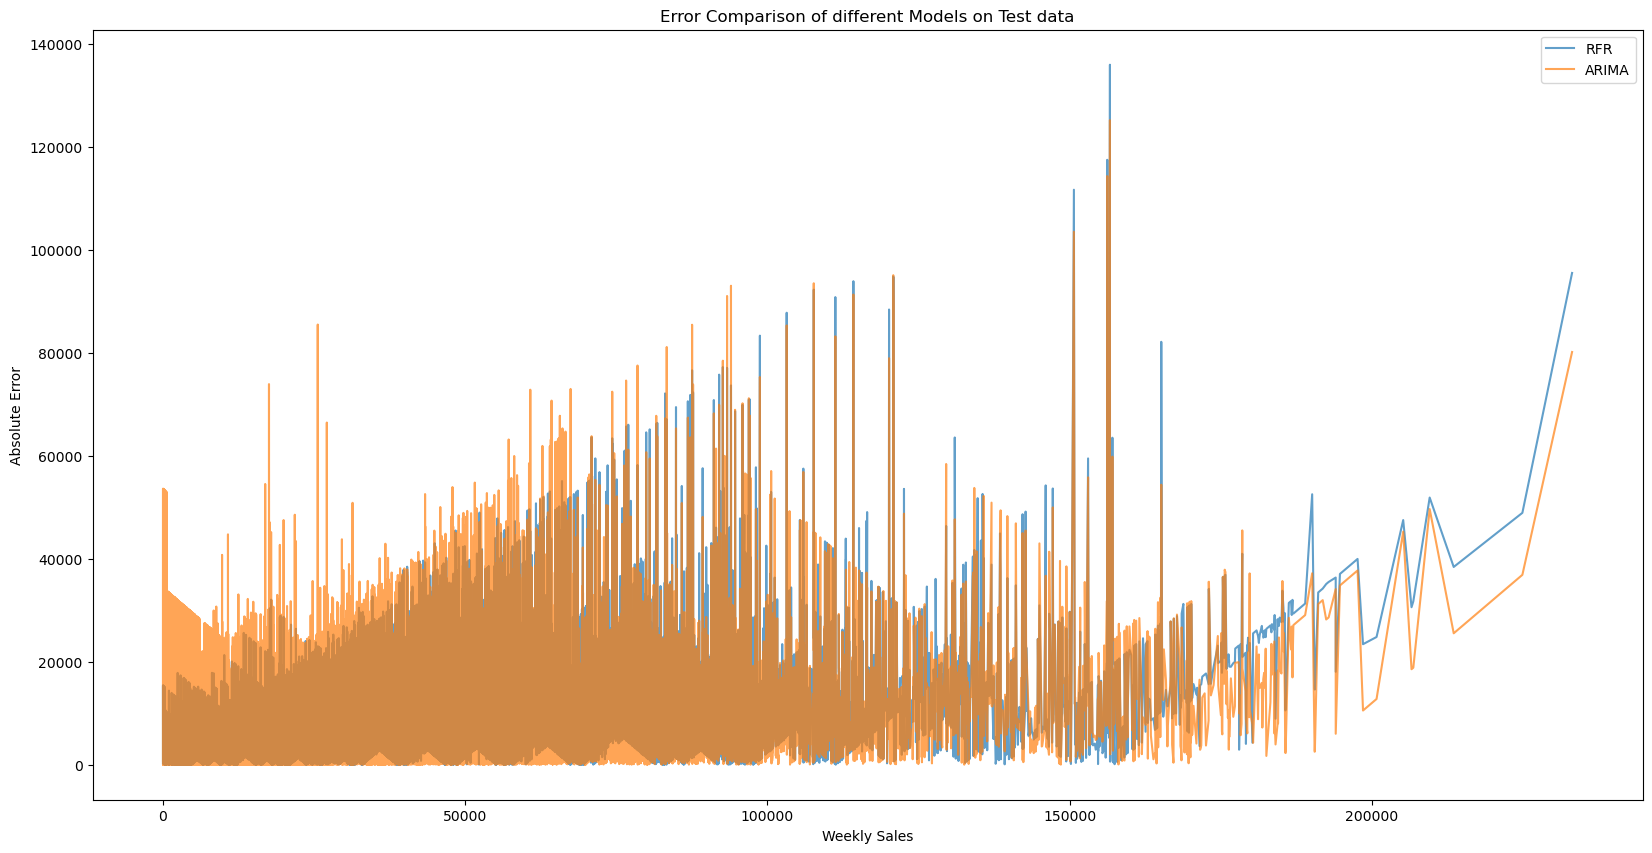

In [267]:
#Plotting the absolute error with the weekly sales for all the 3 predictions
#temper1 = test_scored_stats.sort_values(by=['Weekly_Sales'])
temper2 = test_rf.sort_values(by=['Weekly_Sales'])
temper3 = fullyscored_test_arima.sort_values(by=['Weekly_Sales'])

plt.figure(figsize=(20,10))
plt.title('Error Comparison of different Models on Test data')
plt.xlabel('Weekly Sales')
plt.ylabel('Absolute Error')
#plt.plot(temper1['Weekly_Sales'], temper1['error_abs_st'], label ='Statistical', alpha = 0.7)
plt.plot(temper2['Weekly_Sales'], temper2['error_abs_rf'], label = 'RFR', alpha = 0.7)
plt.plot(temper3['Weekly_Sales'], temper3['error_abs_ar'], label = 'ARIMA', alpha = 0.7)
plt.legend()

# __Fbprophet__

In [ ]:
# Macro Economic Indicators did not help in prediction of weekly sales. The sales data is very similar over different years \
# and this consistency helped to predict the sales. 

In [90]:
sales_data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [91]:
sales_weekly = sales_data.groupby(['Date']).agg({"Weekly_Sales":np.mean}).reset_index()

In [92]:
sales_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [93]:
len(sales_data.Date.unique())/len(sales_data.Date)

0.0003392081979267974

## Convert the data to fbprophet format

In [94]:
df_ts = sales_weekly.loc[:,['Date','Weekly_Sales']]
df_ts.head()

Date  Weekly_Sales
0  2010-02-05  16836.121997
1  2010-02-12  16352.056032
2  2010-02-19  16216.658979
3  2010-02-26  14899.549688
4  2010-03-05  15921.015727

In [95]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [96]:
plt.style.use('fivethirtyeight')

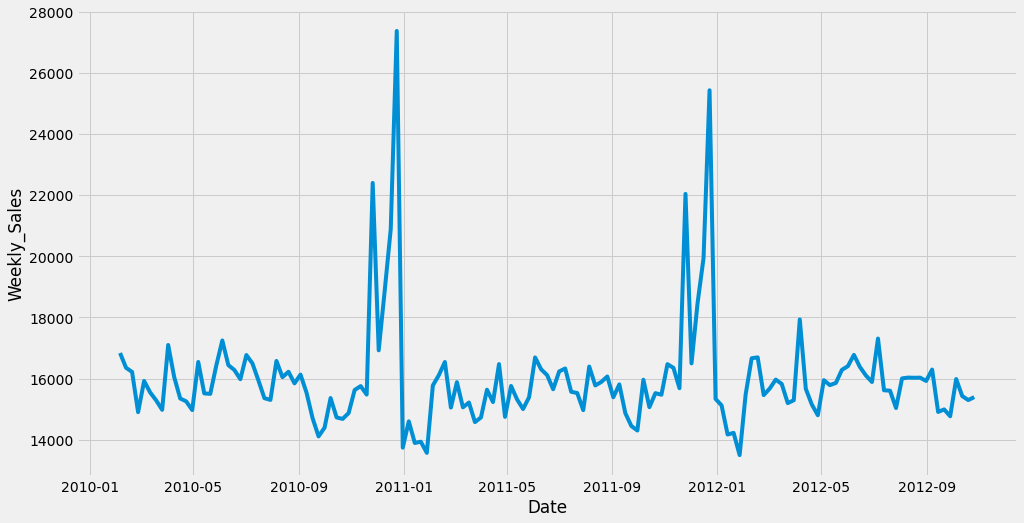

In [97]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Date',y = 'Weekly_Sales',data = df_ts)
plt.show()

In [98]:
# Importing the libraries
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [99]:
# for fbprophet library a certain format is required
df = df_ts.rename(columns={'Date': 'ds',
                        'Weekly_Sales': 'y'})

df.head()

ds             y
0 2010-02-05  16836.121997
1 2010-02-12  16352.056032
2 2010-02-19  16216.658979
3 2010-02-26  14899.549688
4 2010-03-05  15921.015727

In [100]:
df.y.min()

13494.232611788637

## Fit the model

In [101]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.99,weekly_seasonality=True,daily_seasonality=True)

In [102]:
my_model.fit(df)

Initial log joint probability = -2.3267


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       380.012   4.33745e-05       78.2217           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       380.027   6.49412e-05       65.6735   7.532e-07       0.001      195  LS failed, Hessian reset 
     165        380.03   3.44187e-08       78.3482      0.3898           1      253   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [103]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

ds
0 2010-02-05
1 2010-02-12
2 2010-02-19
3 2010-02-26
4 2010-03-05

In [104]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds          yhat    yhat_lower    yhat_upper
0 2010-02-05  16247.818160  13512.489524  19075.967125
1 2010-02-12  16447.192353  13490.997314  19459.334275
2 2010-02-19  15971.599224  13285.505717  19055.466738
3 2010-02-26  15573.647504  12676.639648  18155.265044
4 2010-03-05  15503.841056  12585.620179  18762.421728

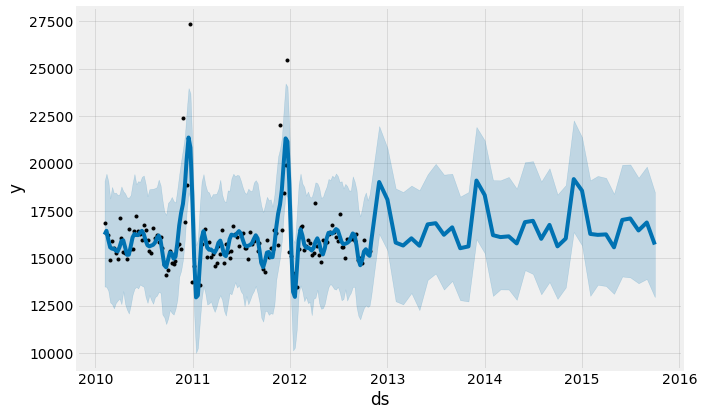

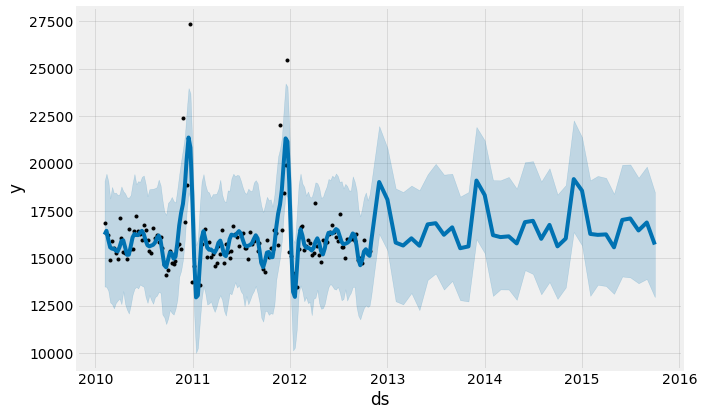

In [105]:
my_model.plot(forecast, uncertainty=True)

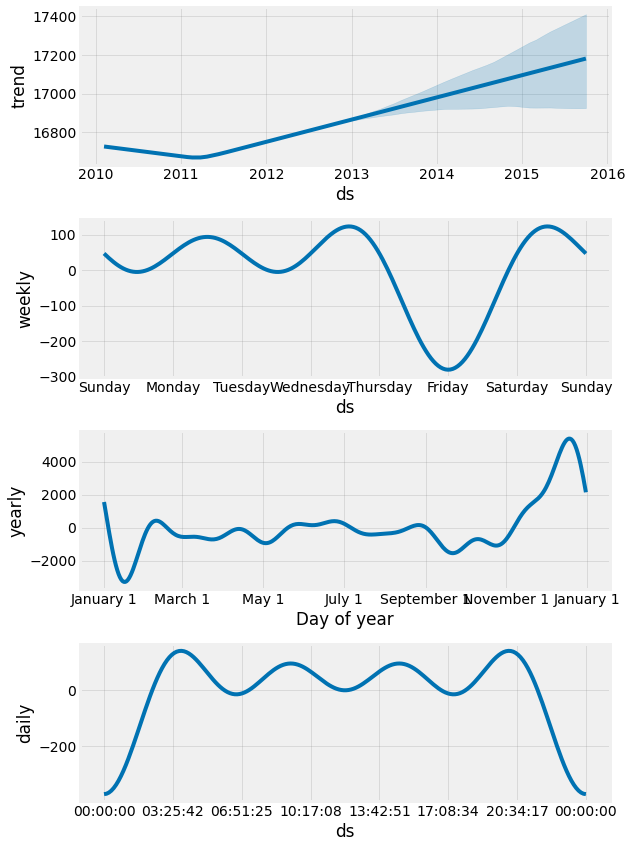

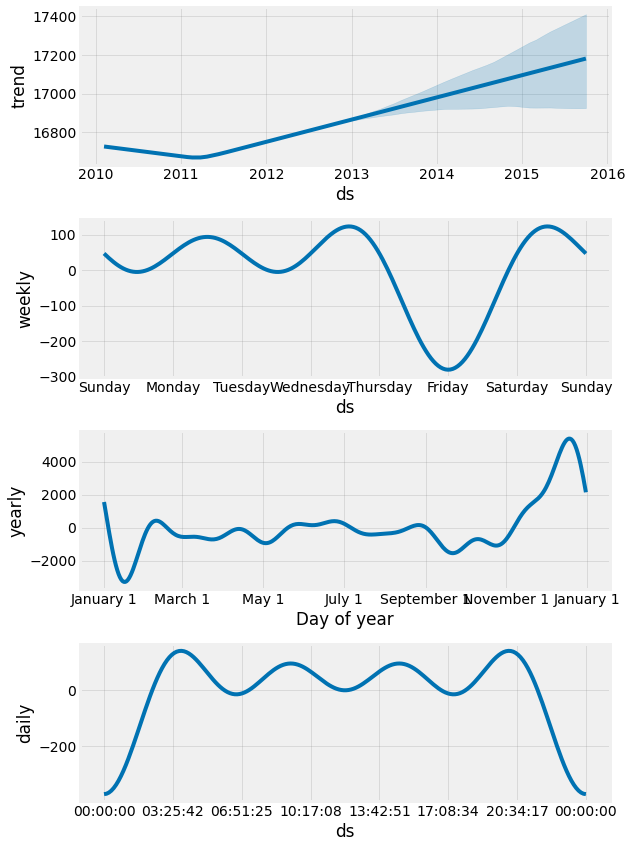

In [106]:
my_model.plot_components(forecast)

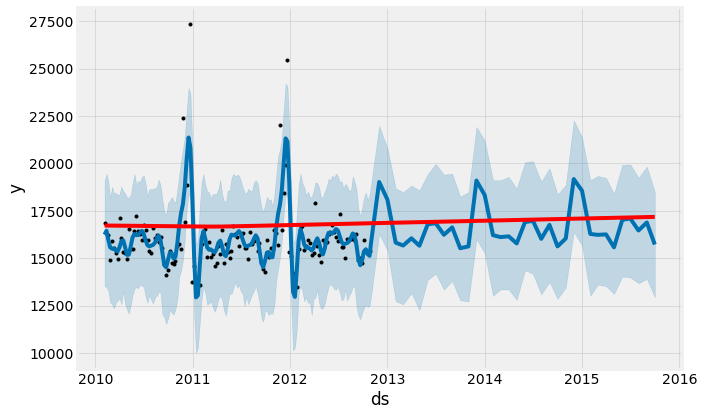

In [107]:
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

Initial log joint probability = -2.3267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       379.633   6.72989e-05         56.79   1.064e-06       0.001       96  LS failed, Hessian reset 
      99       380.041   3.50969e-05       65.7111      0.4197      0.4197      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       380.058   2.73038e-05       76.1836   3.419e-07       0.001      230  LS failed, Hessian reset 
     199        380.06   3.66731e-08       66.8345      0.7931      0.7931      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200        380.06   1.76195e-08       72.2872      0.7773      0.7773      331   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


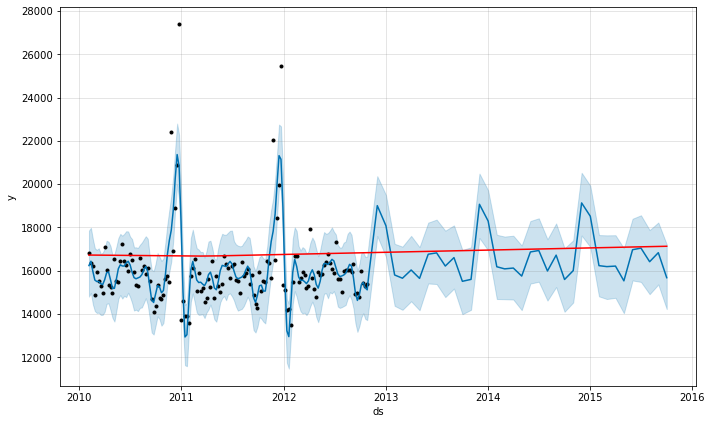

In [244]:
pro_change= Prophet(changepoint_range=0.9,weekly_seasonality=True,daily_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Change Points

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.3267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      14       379.722   0.000529321       26.4826    1.49e-05       0.001       71  LS failed, Hessian reset 
      23       379.931    0.00161989        75.534   2.626e-05       0.001      111  LS failed, Hessian reset 
      32       380.029   7.59687e-05       38.2681   1.825e-06       0.001      160  LS failed, Hessian reset 
      38        380.03    7.7381e-08        28.778    3.35e-09       0.001      224  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


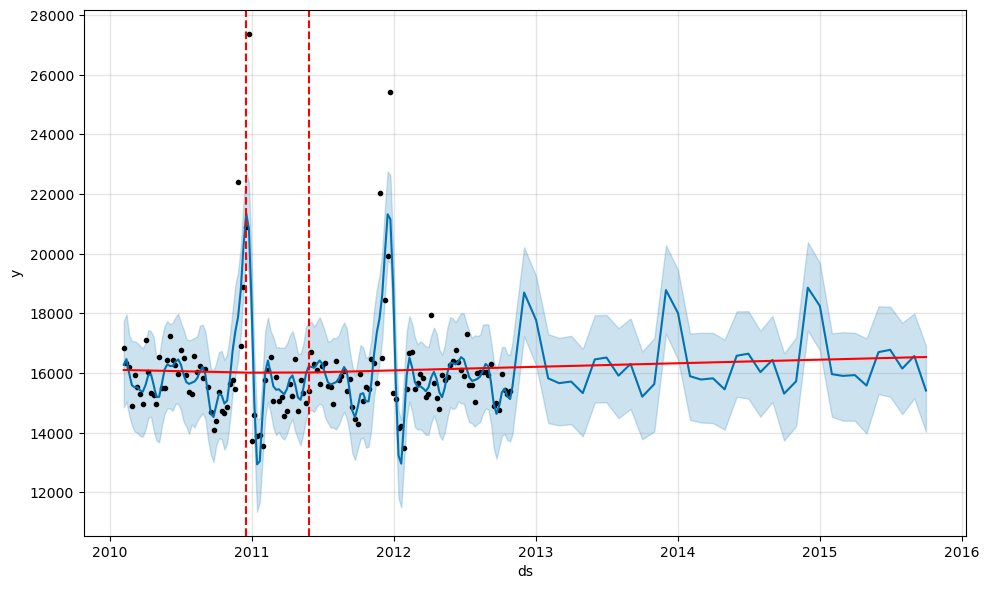

In [246]:
plt.style.use('default')
pro_change= Prophet(n_changepoints=5, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)